In [1]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim
import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.misc
import os
%matplotlib inline
import pdb

import re

import cPickle

import pyemd

%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import cv2

#env_title = 'AssaultNoFrameskip-v4'
env_title = 'BreakoutNoFrameskip-v4'
env = gym.make(env_title);

breakout = (env_title[:8] == 'Breakout')

if breakout:
    frame_h = 210
else:
    frame_h = 250

[2017-09-06 22:43:57,837] Making new env: BreakoutNoFrameskip-v4


In [3]:
def downsample84(s):
    s_gray = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
    return np.array(Image.fromarray(s_gray).resize((84,84)))

In [4]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Prototyper
from piaget import init_env, play

In [5]:
if breakout:
    game_id = 91127#447467
else:
    game_id = 428235
    
pt = Prototyper(game_id)

0
(6, 18, 3)
5331.94817863


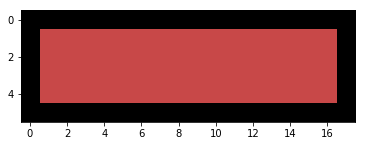

2
(6, 4, 3)
4135.50617284


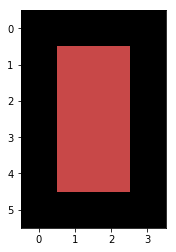

In [6]:
for i in range(len(pt.mover_ids)):
    m_id = pt.mover_ids[i]
    p = pt.mover_prototypes[i]
    plt.imshow(p,interpolation='nearest')
    print m_id
    print p.shape
    print np.var(p)
    plt.show()

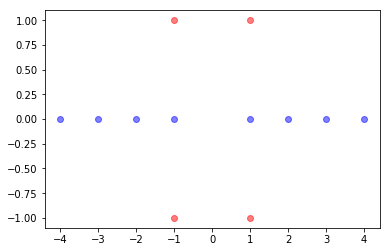

In [7]:
for i, disps in enumerate(pt.mover_disps):
    plt.scatter(*zip(*disps),alpha=0.5, color=('b' if i == 0 else 'r'))

In [8]:
from training import *

Starting episode 0 (total steps: 0)
Starting episode 1 (total steps: 595)
Starting episode 2 (total steps: 1076)
Starting episode 3 (total steps: 1868)
Starting episode 4 (total steps: 2353)
Starting episode 5 (total steps: 2837)
Starting episode 6 (total steps: 3318)
Starting episode 7 (total steps: 4000)
Starting episode 8 (total steps: 4673)
total_steps: 5400
mean log loss (last 100 training frames):  6 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 3, previous action: 1


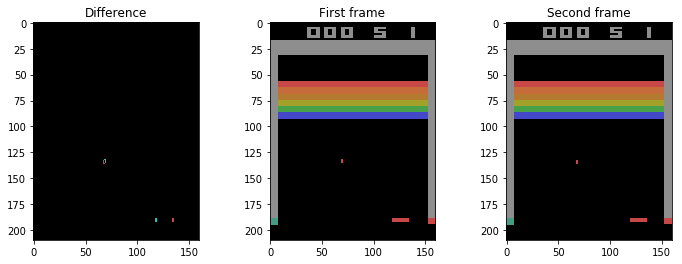


Showing region near mover 0...



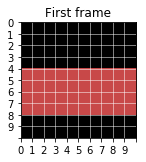

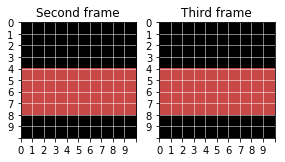

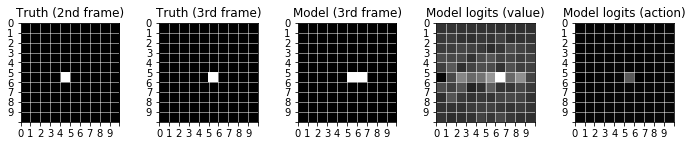

Probability assigned to true location: 0.994351


Showing region near mover 2...



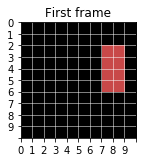

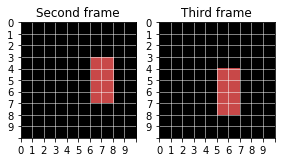

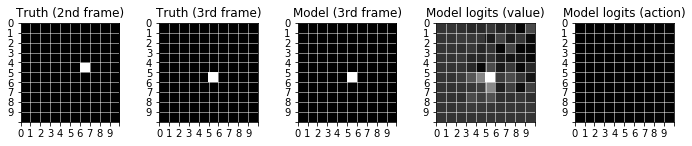

Probability assigned to true location: 0.999467



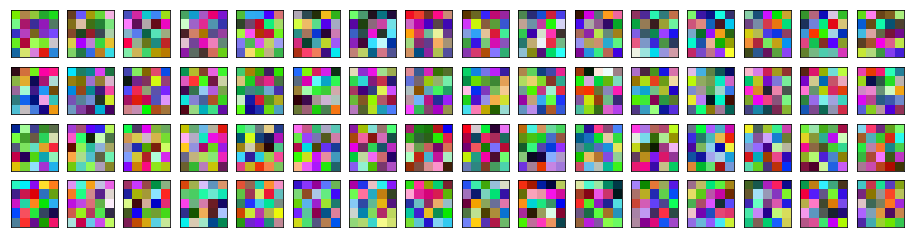

Example frame 1
action: 3, previous action: 1


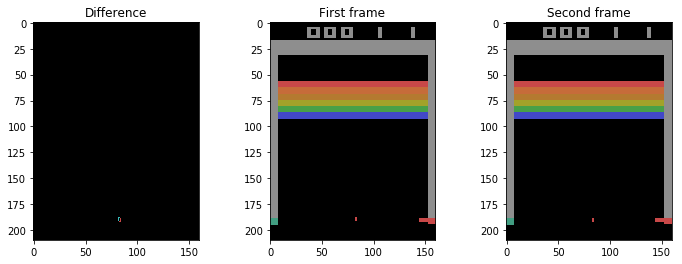


Showing region near mover 0...



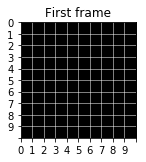

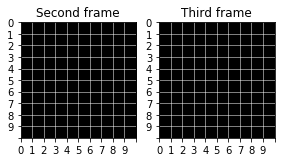

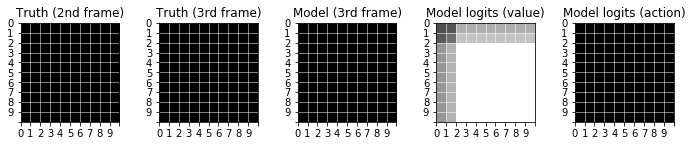

Probability assigned to true location: 0.000000


Showing region near mover 2...



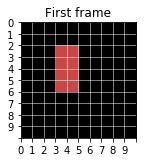

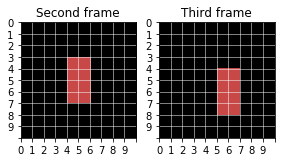

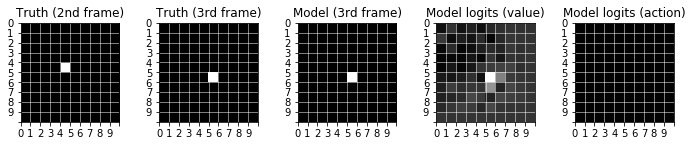

Probability assigned to true location: 0.999748



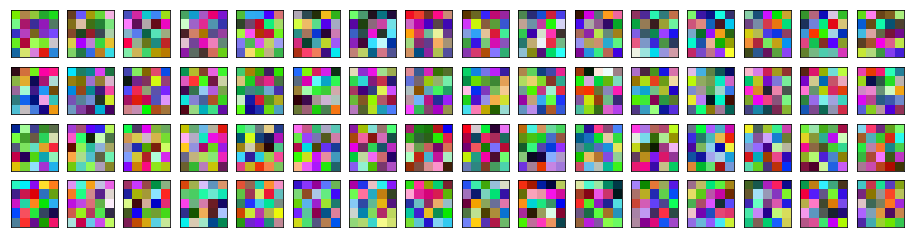

Starting episode 9 (total steps: 5458)
total_steps: 5800
mean log loss (last 100 training frames):  3 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 0, previous action: 2


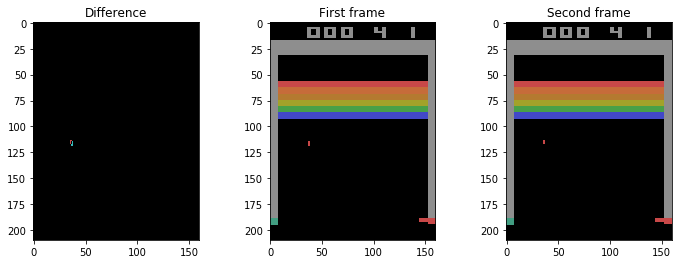


Showing region near mover 0...



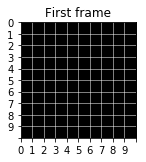

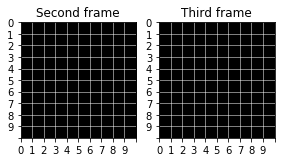

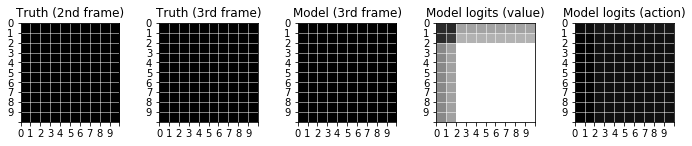

Probability assigned to true location: 0.000000


Showing region near mover 2...



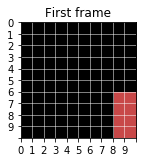

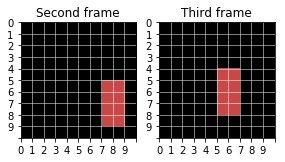

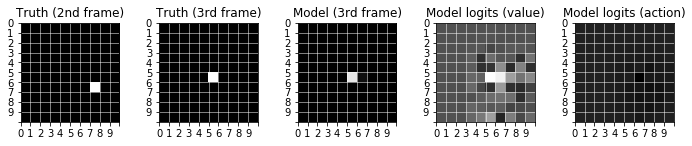

Probability assigned to true location: 0.902603



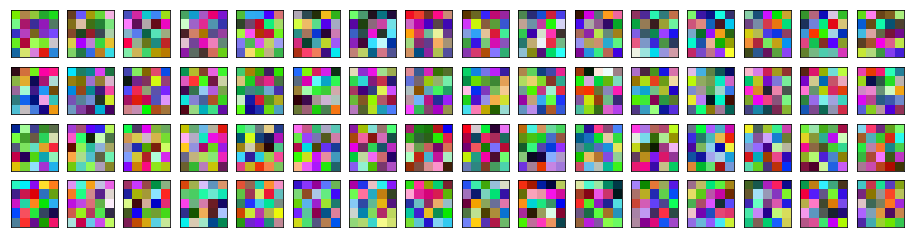

Example frame 1
action: 1, previous action: 2


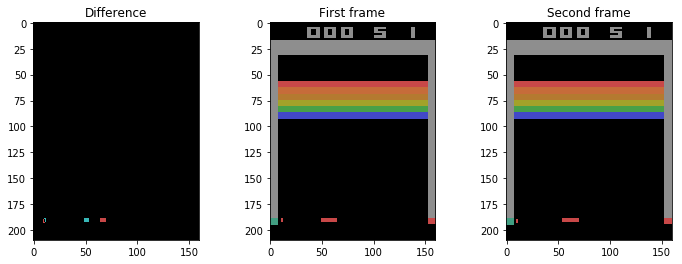


Showing region near mover 0...



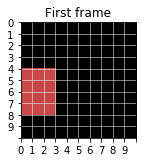

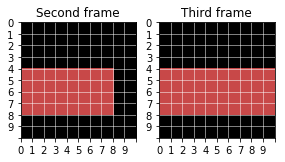

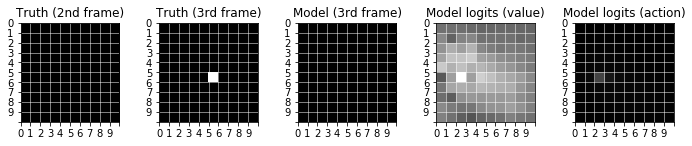

Probability assigned to true location: 0.000006


Showing region near mover 2...



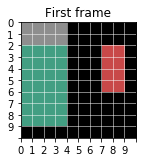

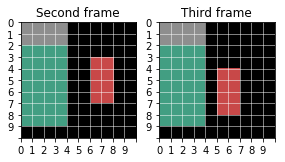

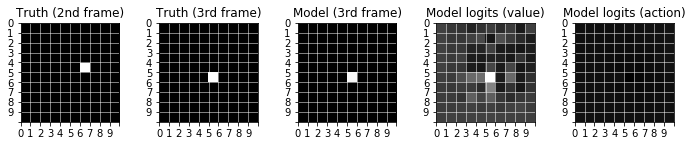

Probability assigned to true location: 0.968443



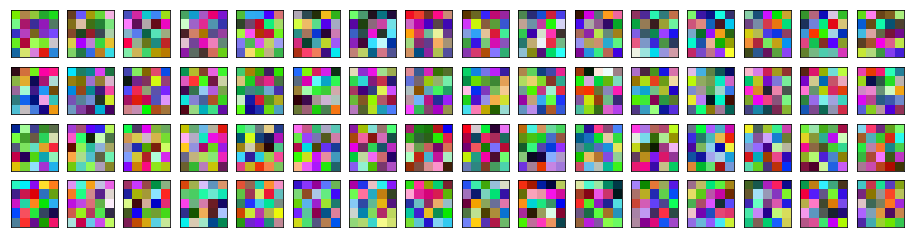

Starting episode 10 (total steps: 6054)
total_steps: 6200
mean log loss (last 100 training frames):  2 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 3, previous action: 1


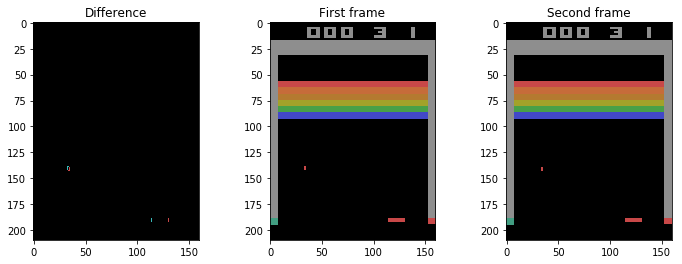


Showing region near mover 0...



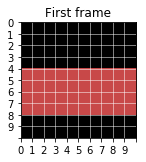

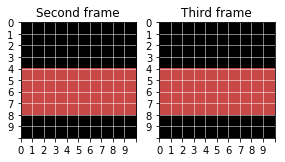

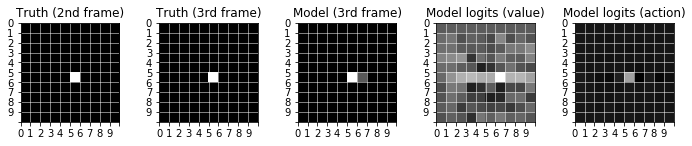

Probability assigned to true location: 0.999331


Showing region near mover 2...



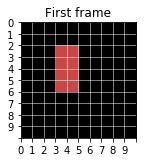

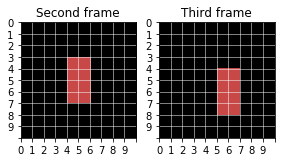

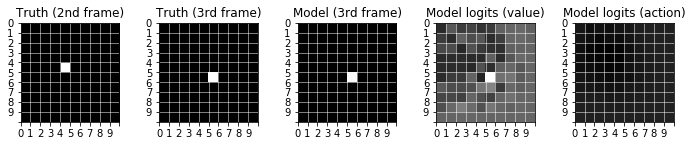

Probability assigned to true location: 0.978247



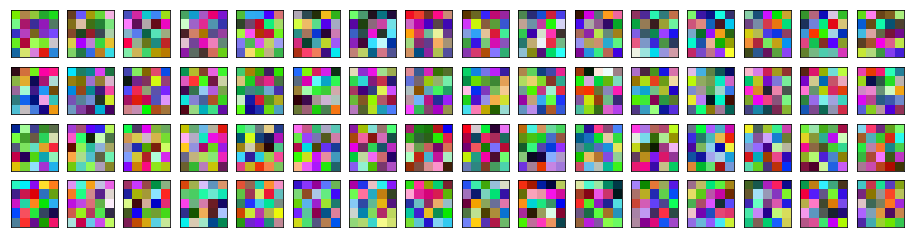

Example frame 1
action: 1, previous action: 1


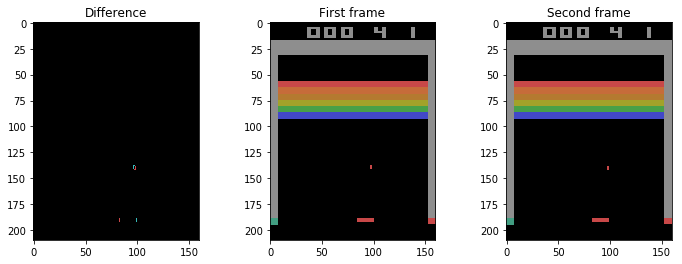


Showing region near mover 0...



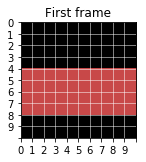

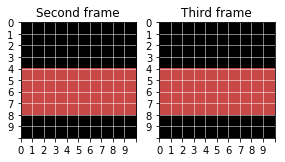

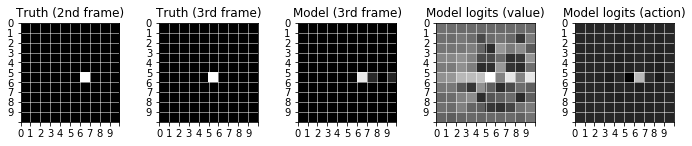

Probability assigned to true location: 0.021749


Showing region near mover 2...



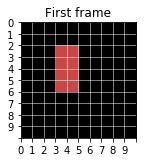

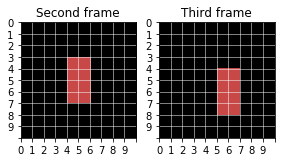

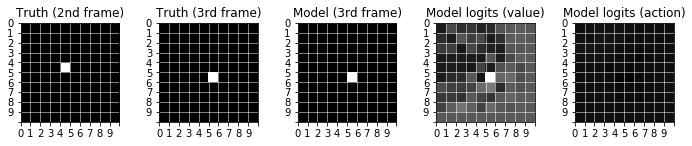

Probability assigned to true location: 0.984278



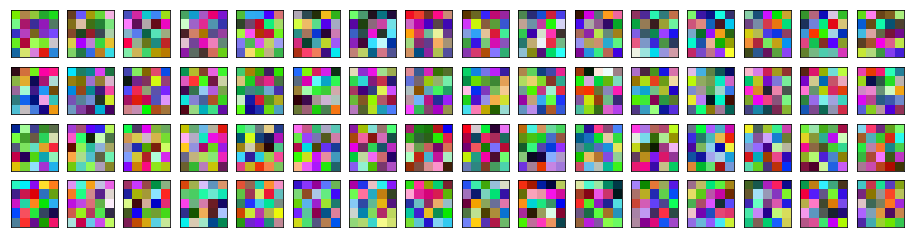

total_steps: 6600
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 3, previous action: 0


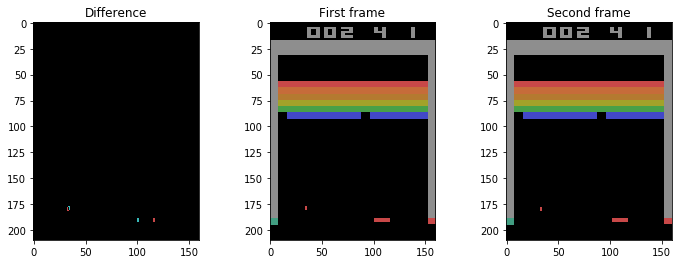


Showing region near mover 0...



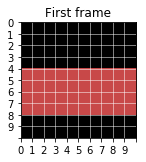

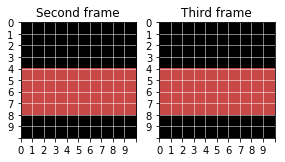

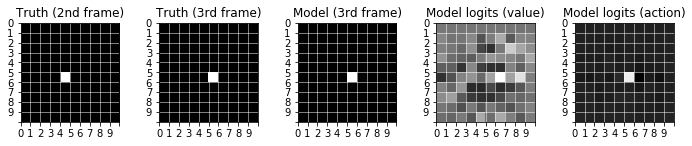

Probability assigned to true location: 0.999965


Showing region near mover 2...



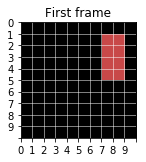

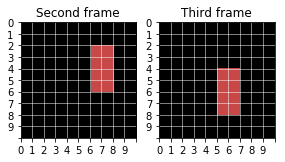

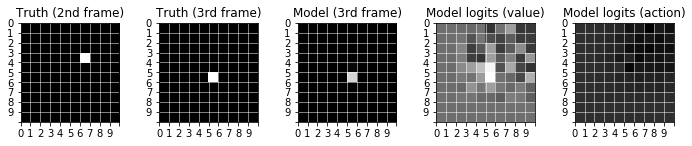

Probability assigned to true location: 0.837250



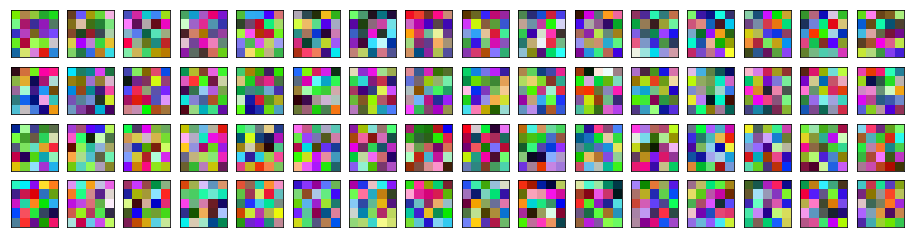

Example frame 1
action: 1, previous action: 0


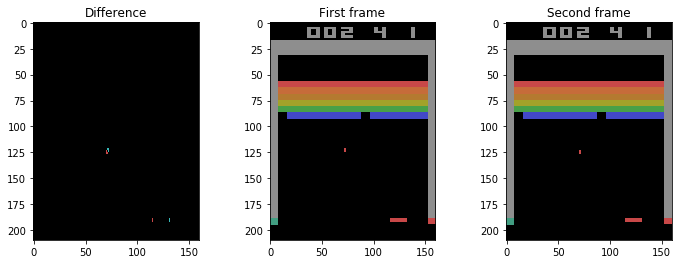


Showing region near mover 0...



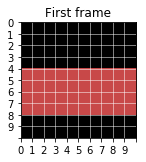

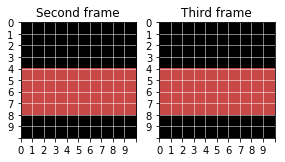

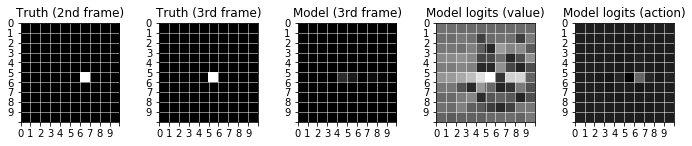

Probability assigned to true location: 0.098258


Showing region near mover 2...



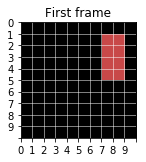

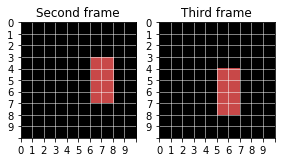

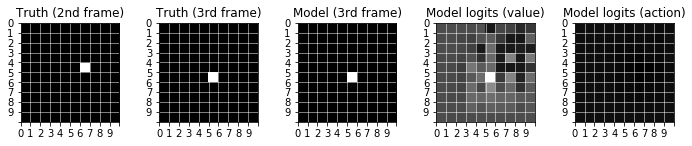

Probability assigned to true location: 0.998368



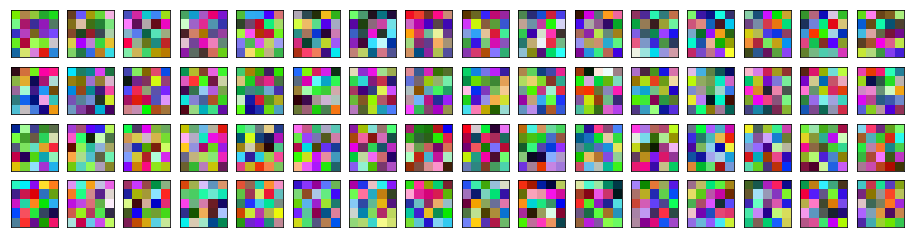

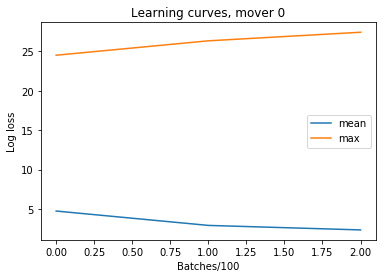

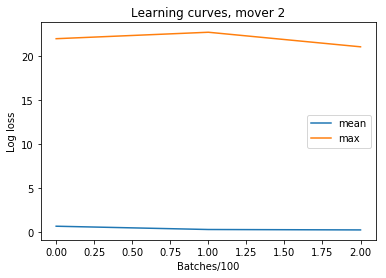

total_steps: 7000
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 0, previous action: 1


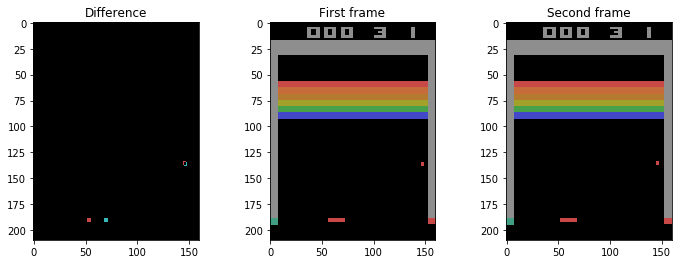


Showing region near mover 0...



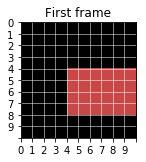

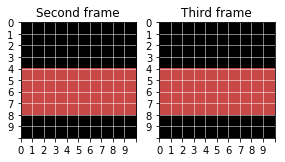

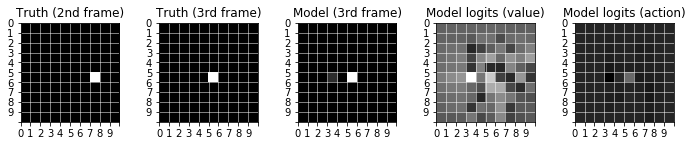

Probability assigned to true location: 0.988466


Showing region near mover 2...



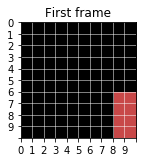

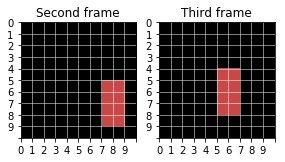

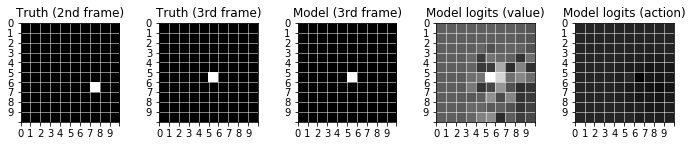

Probability assigned to true location: 0.998644



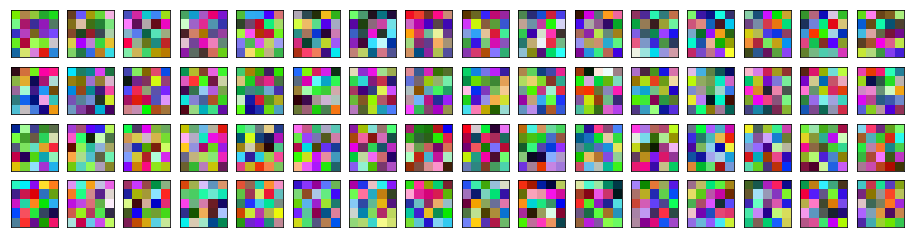

Example frame 1
action: 1, previous action: 3


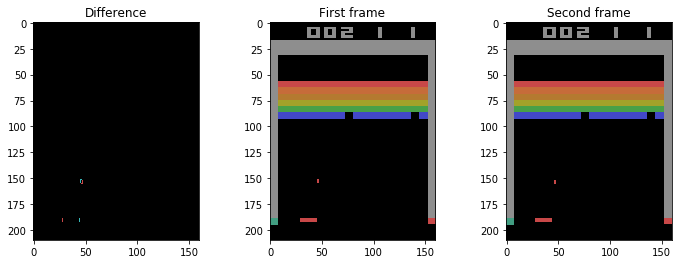


Showing region near mover 0...



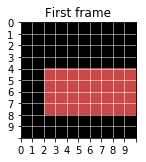

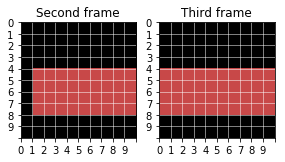

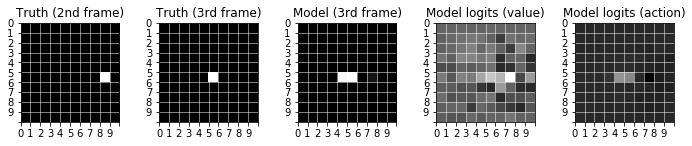

Probability assigned to true location: 0.997256


Showing region near mover 2...



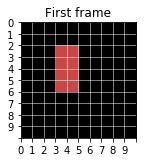

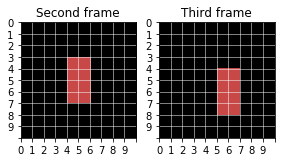

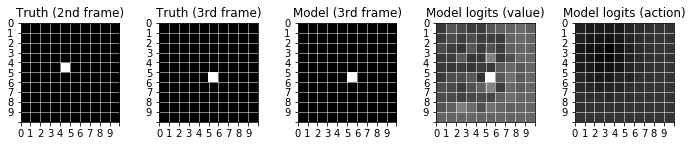

Probability assigned to true location: 0.994731



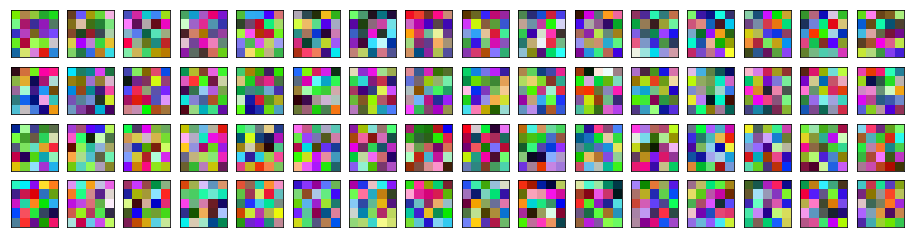

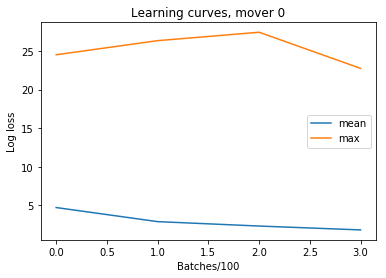

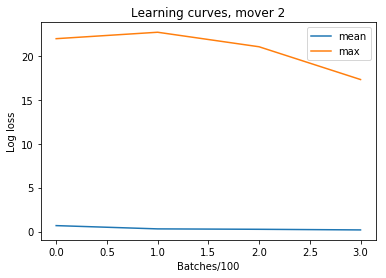

Starting episode 11 (total steps: 7231)
total_steps: 7400
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 3, previous action: 1


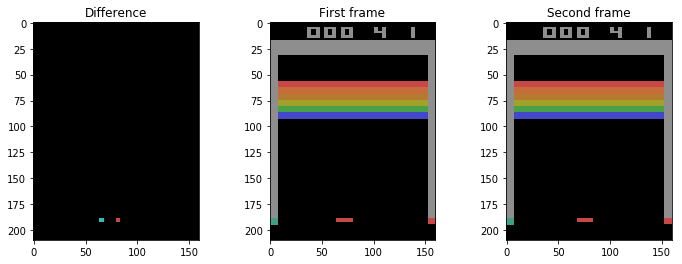


Showing region near mover 0...



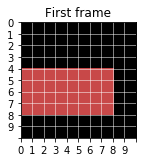

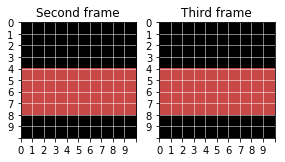

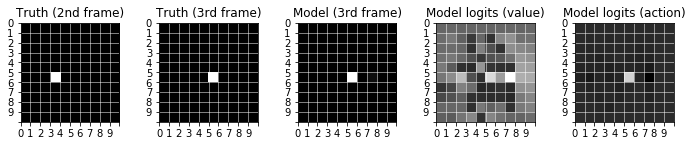

Probability assigned to true location: 1.000000


Showing region near mover 2...



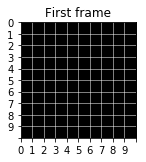

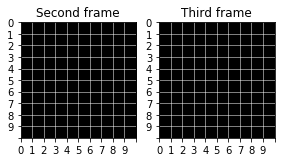

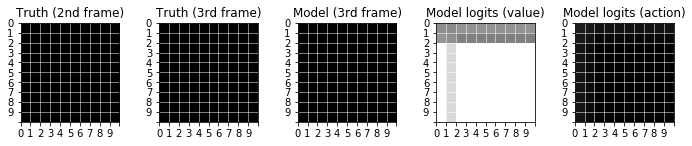

Probability assigned to true location: 0.000000



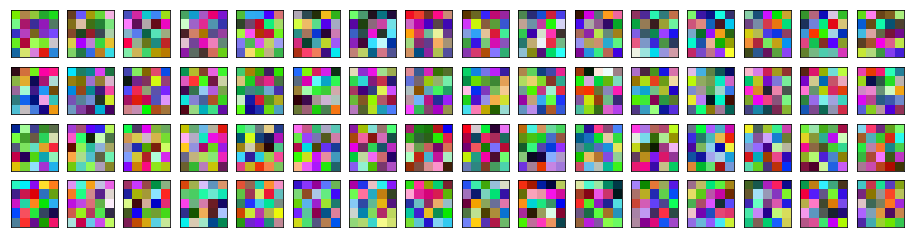

Example frame 1
action: 1, previous action: 2


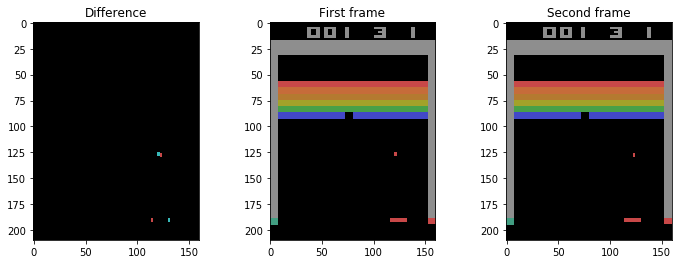


Showing region near mover 0...



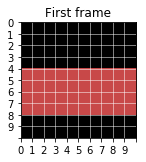

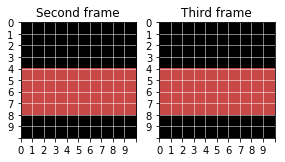

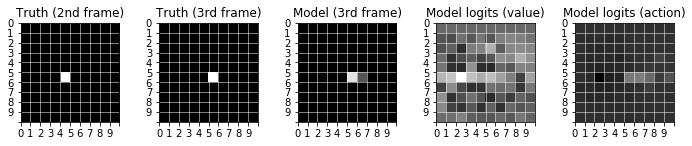

Probability assigned to true location: 0.879305


Showing region near mover 2...



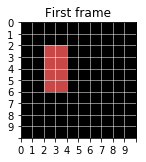

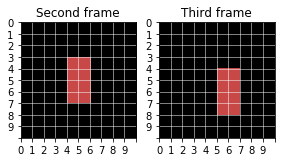

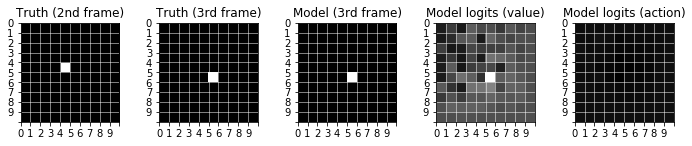

Probability assigned to true location: 0.994165



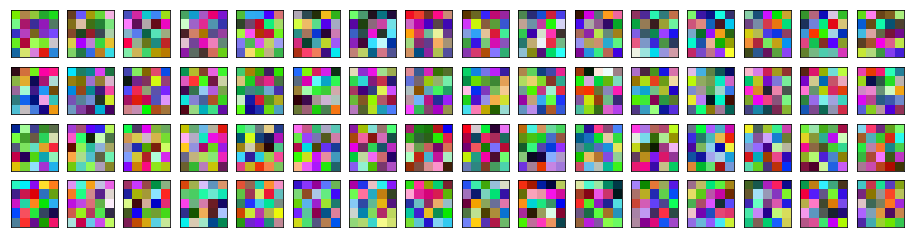

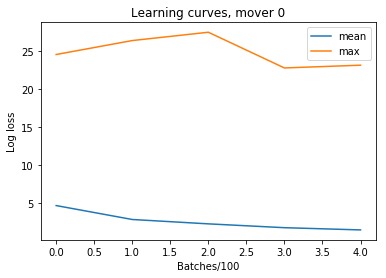

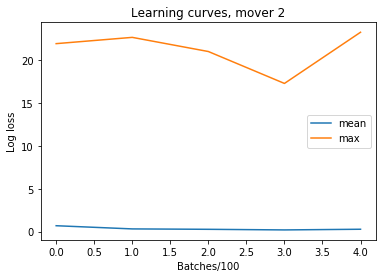

total_steps: 7800
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 1, previous action: 3


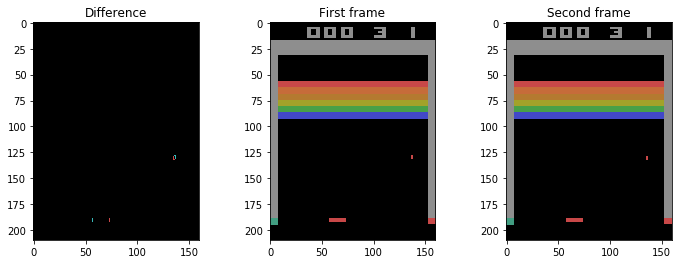


Showing region near mover 0...



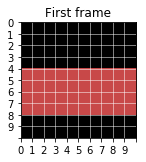

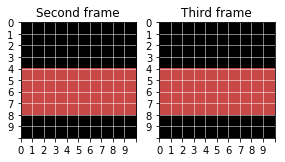

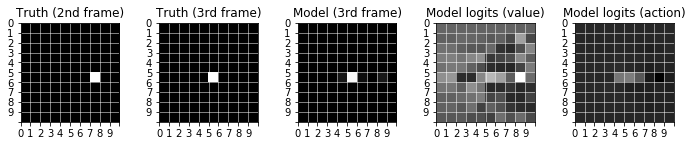

Probability assigned to true location: 0.969960


Showing region near mover 2...



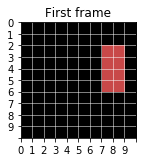

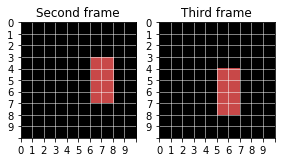

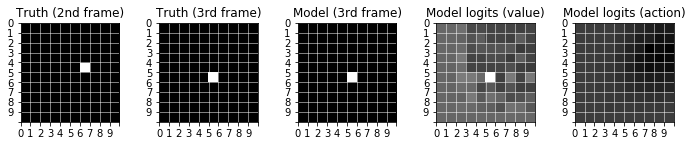

Probability assigned to true location: 0.982644



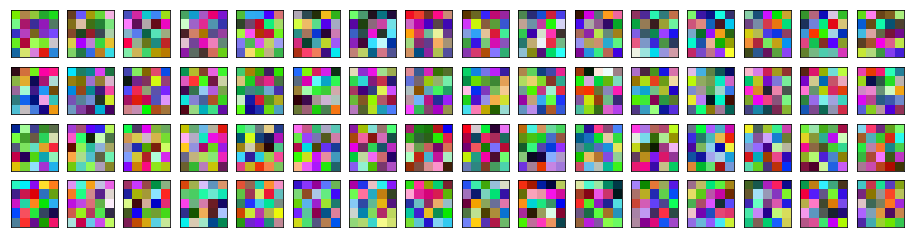

Example frame 1
action: 2, previous action: 2


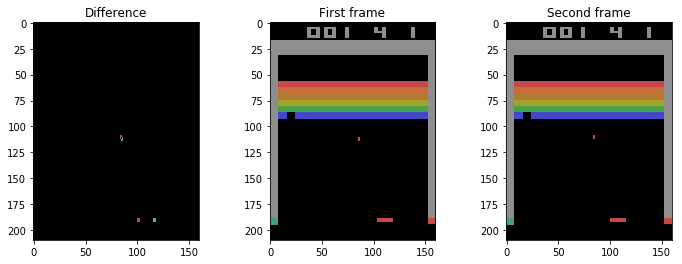


Showing region near mover 0...



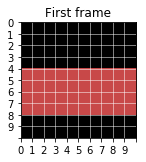

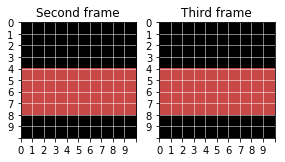

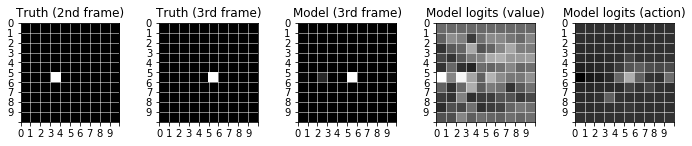

Probability assigned to true location: 0.998775


Showing region near mover 2...



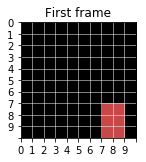

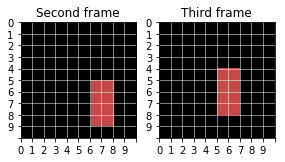

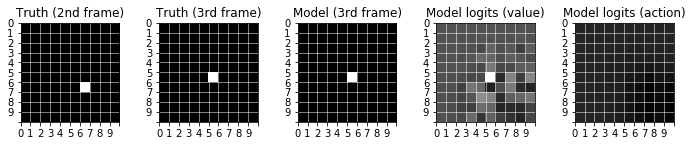

Probability assigned to true location: 0.997600



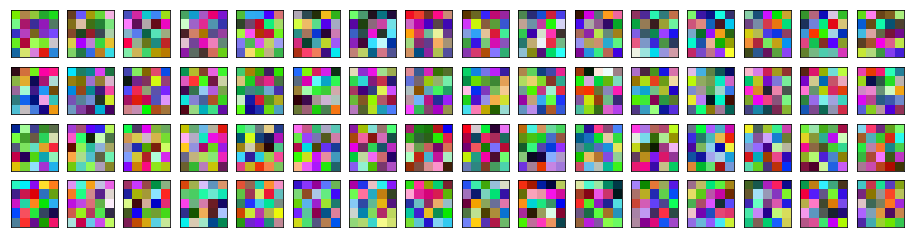

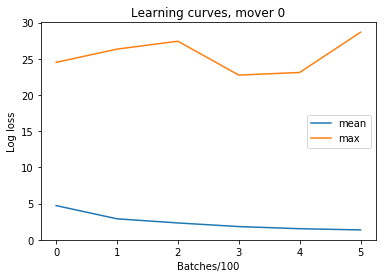

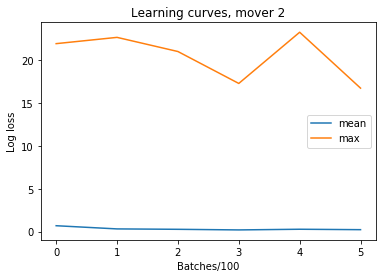

Starting episode 12 (total steps: 8017)
total_steps: 8200
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 1, previous action: 3


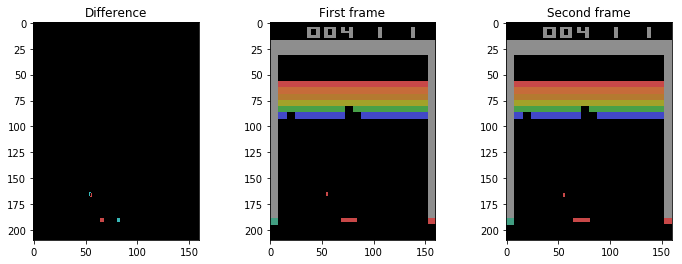


Showing region near mover 0...



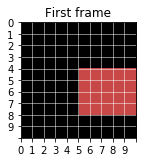

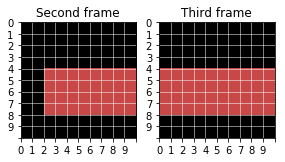

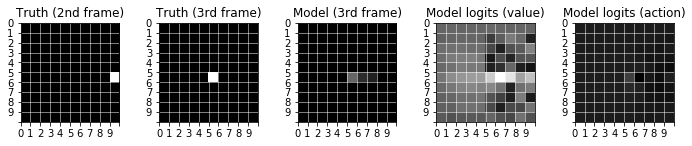

Probability assigned to true location: 0.401847


Showing region near mover 2...



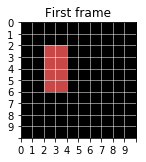

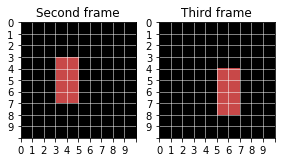

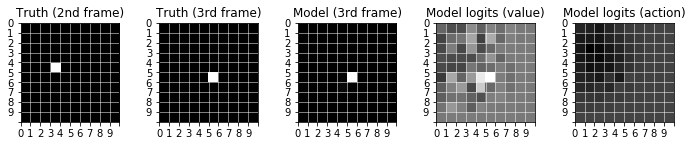

Probability assigned to true location: 0.988483



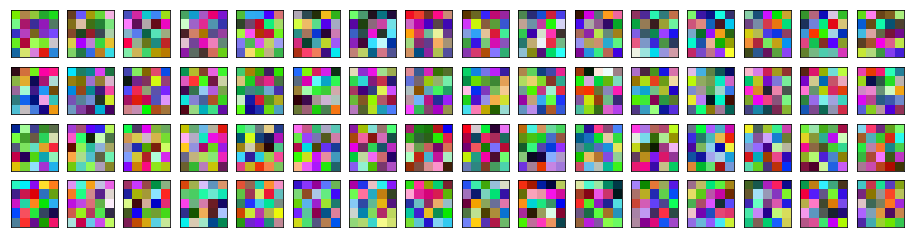

Example frame 1
action: 0, previous action: 3


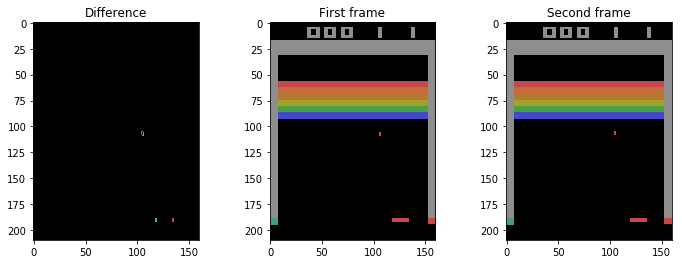


Showing region near mover 0...



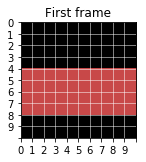

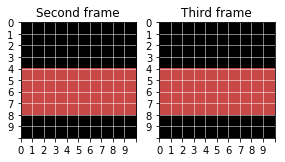

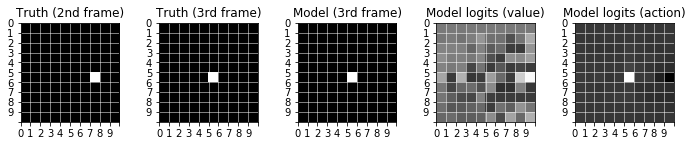

Probability assigned to true location: 0.999991


Showing region near mover 2...



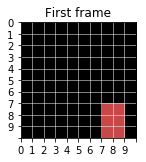

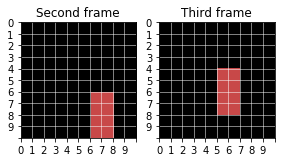

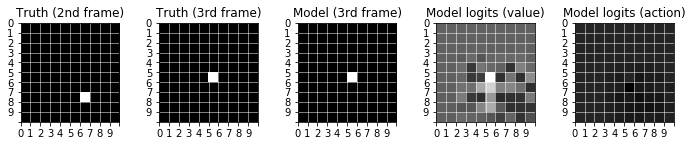

Probability assigned to true location: 0.998706



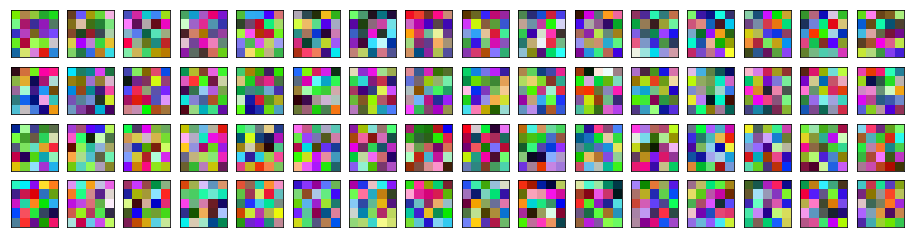

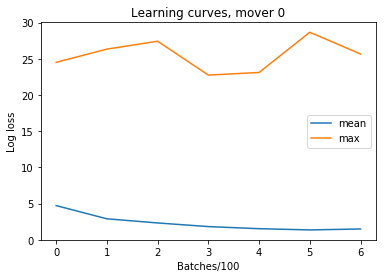

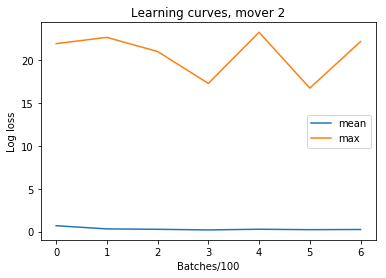

total_steps: 8600
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 1, previous action: 2


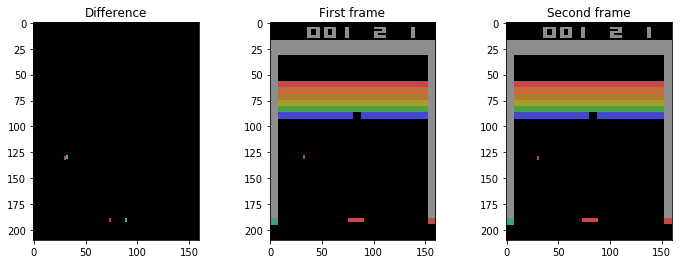


Showing region near mover 0...



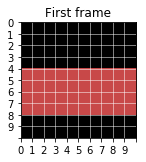

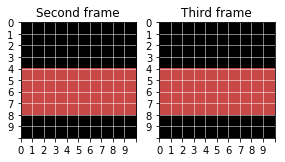

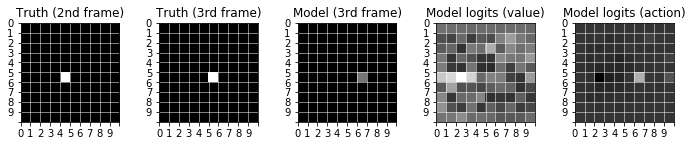

Probability assigned to true location: 0.000003


Showing region near mover 2...



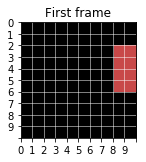

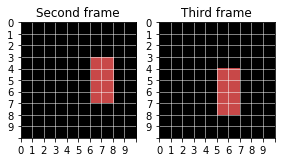

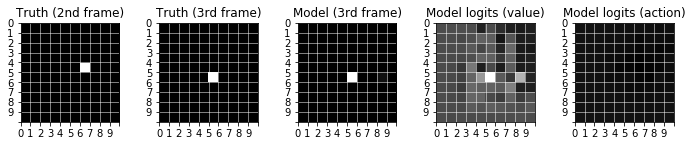

Probability assigned to true location: 0.998642



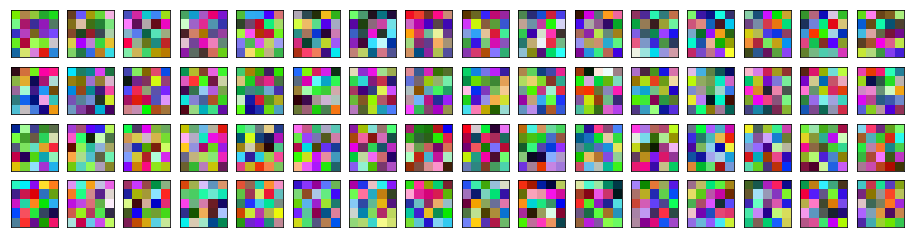

Example frame 1
action: 1, previous action: 1


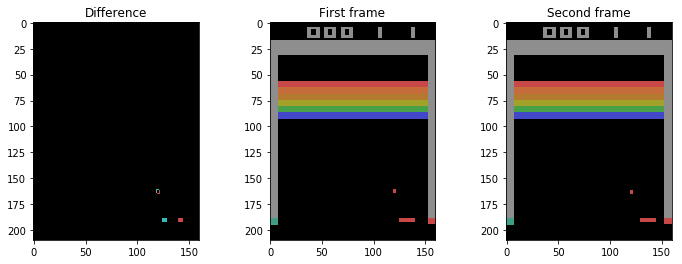


Showing region near mover 0...



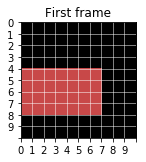

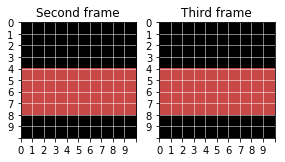

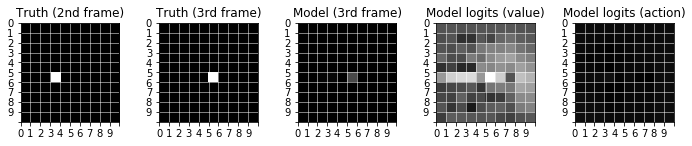

Probability assigned to true location: 0.288771


Showing region near mover 2...



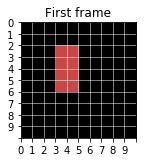

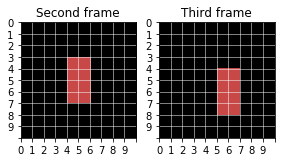

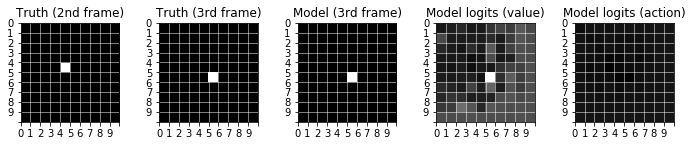

Probability assigned to true location: 0.990139



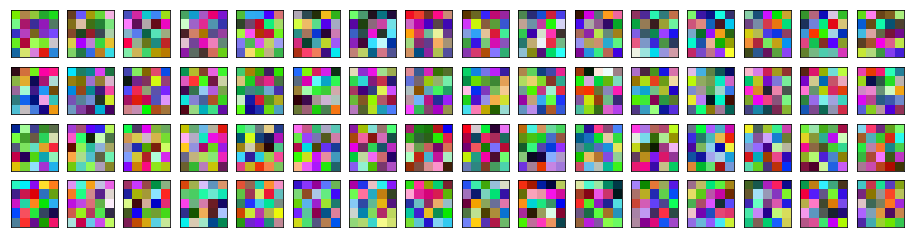

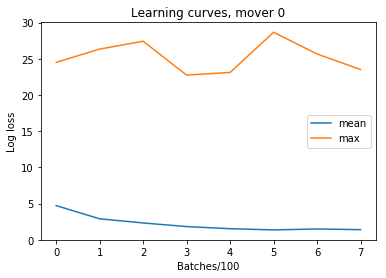

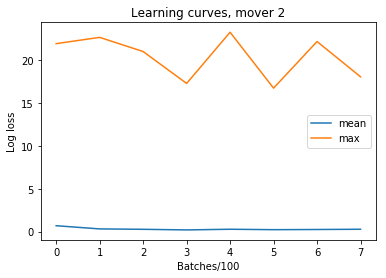

Starting episode 13 (total steps: 8801)
total_steps: 9000
mean log loss (last 100 training frames):  1 

Displaying model performance on 2 random frames from buffer...

Example frame 0
action: 3, previous action: 3


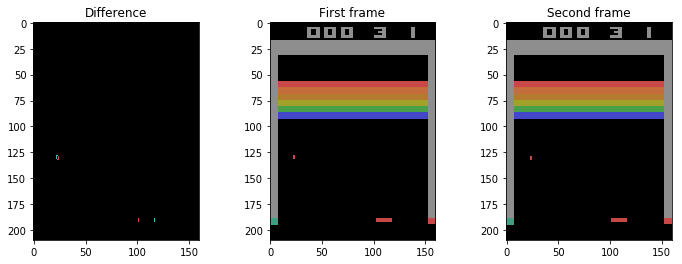


Showing region near mover 0...



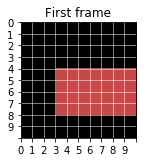

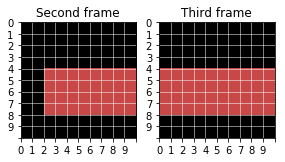

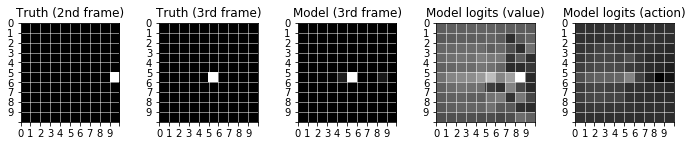

Probability assigned to true location: 0.993039


Showing region near mover 2...



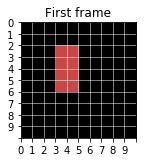

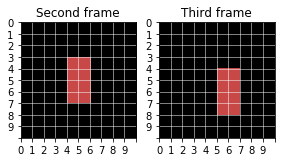

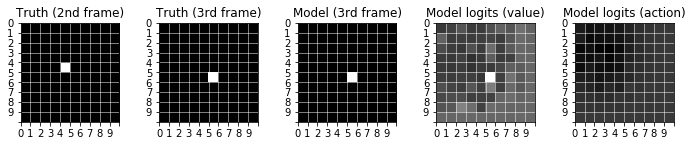

Probability assigned to true location: 0.990991



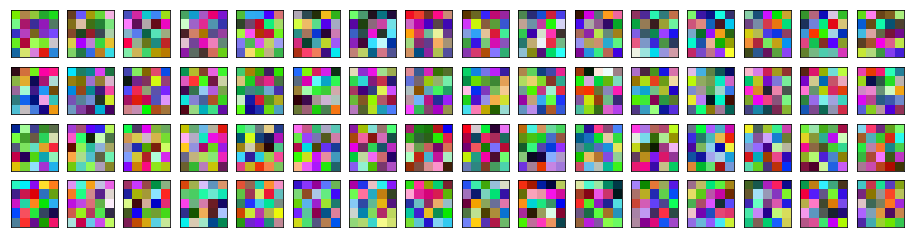

Example frame 1
action: 3, previous action: 2


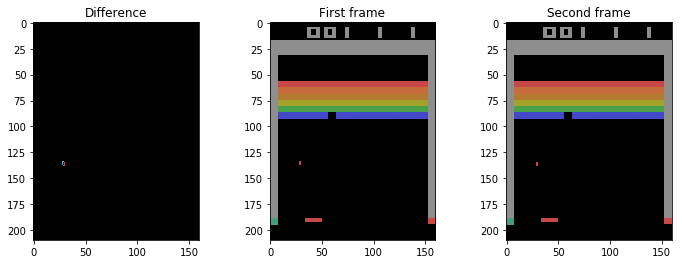


Showing region near mover 0...



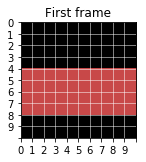

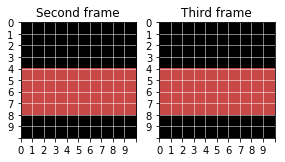

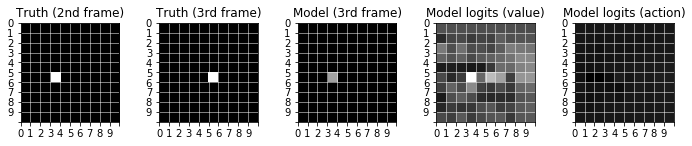

Probability assigned to true location: 0.005498


Showing region near mover 2...



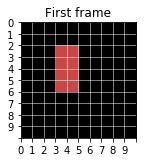

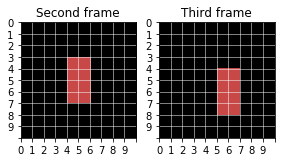

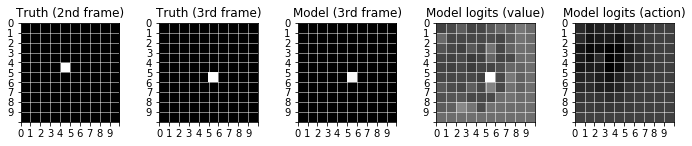

Probability assigned to true location: 0.968511



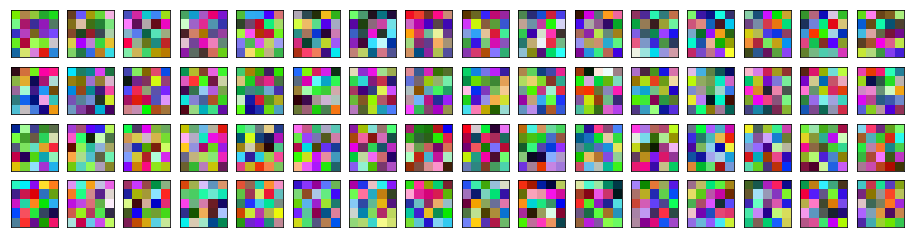

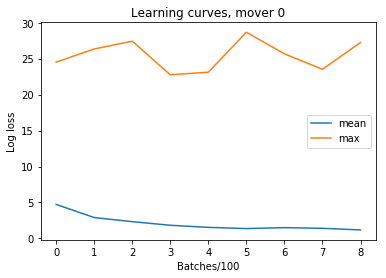

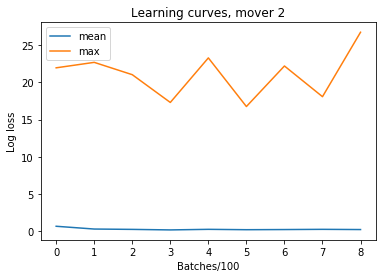

KeyboardInterrupt: 

In [133]:
train_protoModelNetwork(env, pt, breakout=True, pre_train_steps=5000, print_rate=100,
                        learning_rate=0.01, adam_eps=1e-8,
                        n_free=16,
                        n_frames=4)

### class protoQnetwork below is adapted from https://github.com/awjuliani/DeepRL-Agents

Network architecture is similar to that in the 2014 DeepMind paper.  This version uses piaget's mover images to form a first layer of convolutional filters, and their observed displacements to form the second.

### Some tests

In [117]:
s_list, r, d, info = initial_obs(env, n_frames=4, breakout=True)
s_stack = np.dstack(s_list)
s = processState(s_stack)

#s210 = np.vstack([np.reshape(s,[210*160*3*2])]).astype('float32')

In [137]:
from nets import protoQnetwork, protoModelnetwork

In [138]:
tf.reset_default_graph()

h_size = 32

with tf.Session() as sess:
    qn = protoModelnetwork(env, pt, 'qn', n_free_kernels=16, frame_h=frame_h, n_frames=4, bg=bg)
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(tf.shape(qn.conv1_model_kernel),feed_dict={qn.scalarInput:[s]}))
    c1_weights = sess.run(qn.conv1_model_kernel)

[ 5  5 60 60]


In [141]:
print c1_weights.shape

c1_weights_flat = np.reshape(c1_weights, (25,c1_weights.shape[-2],c1_weights.shape[-1]))

(5, 5, 60, 60)


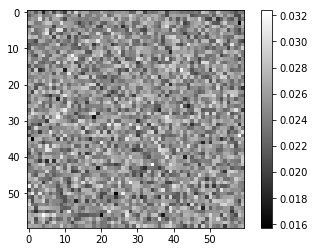

In [142]:
c1_stds = np.std(c1_weights_flat,axis=0)
plt.imshow(c1_stds, cmap='gray',interpolation='nearest')
plt.colorbar();

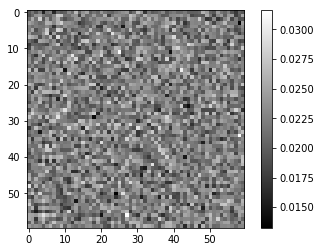

In [143]:
c1_mean_abs = np.mean(np.abs(c1_weights_flat), axis=0)
plt.imshow(c1_mean_abs, cmap='gray',interpolation='nearest')
plt.colorbar();

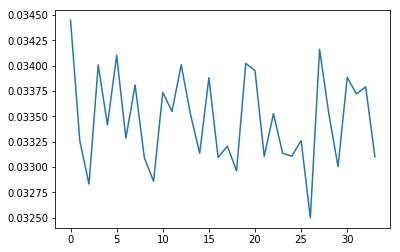

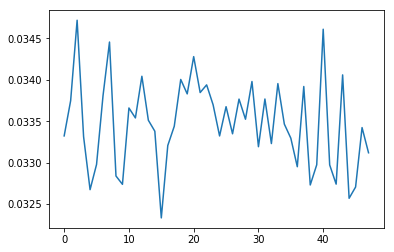

In [283]:
plt.plot(np.mean(stds,axis=0))
plt.show()
plt.plot(np.mean(stds,axis=1))

## Training code below is adapted from https://github.com/awjuliani/DeepRL-Agents

### Experience Replay

In [19]:
if breakout:
    game_id = 91127#510553
else:
    game_id = 508381#64468
    
pt = Prototyper(game_id)

In [90]:
from nets import protoQnetwork, protoModelnetwork

In [21]:
from scipy.stats import mode

In [22]:
frames = [f[3] for f in myBuffer.buffer[:4000]]
frames = np.reshape(frames,(4000,frame_h,160,3*n_frames))[:,...,3*(n_frames-1):]

bg = mode(frames,axis=0).mode[0,:,...,:]

In [24]:
bg.shape

(210, 160, 3)

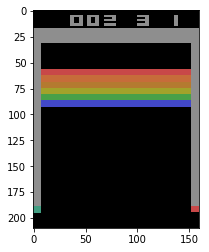

In [25]:
plt.imshow(bg)

In [42]:
bg_colors = np.reshape(bg, (-1, 3))

In [51]:
set([tuple(c) for c in bg_colors])

{(0.0, 0.0, 0.0),
 (66.0, 72.0, 200.0),
 (66.0, 158.0, 130.0),
 (72.0, 160.0, 72.0),
 (142.0, 142.0, 142.0),
 (162.0, 162.0, 42.0),
 (180.0, 122.0, 48.0),
 (198.0, 108.0, 58.0),
 (200.0, 72.0, 72.0)}

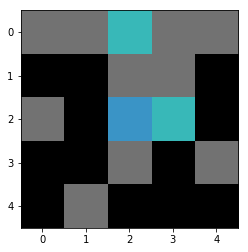

In [63]:
plt.imshow(bg_colors[np.random.choice(bg_colors.shape[0], 25), :].reshape((5,5,3)))

In [144]:
batch_size = 32 #How many experiences to use for each training step.
update_freq = 4 #How often to perform a training step.
y = .75#.99 #Discount factor on the target Q-values
startE = 1 #Starting chance of random action
endE = 0.1 #Final chance of random action
anneling_steps = 1000000. #How many steps of training to reduce startE to endE.
num_episodes = 10000 #How many episodes of game environment to train network with.
max_epLength = 5000 #The max allowed length of our episode.
pre_train_steps = 5000 #How many steps of random actions before training begins.
load_model = False #Whether to load a saved model.
path = "./dqn/piaget" #The path to save our model to.
h_size = 24 #The size of the final convolutional layer before splitting it into Advantage and Value streams.
#tau = 0.001 #Rate to update target network toward primary network
reset_freq = 5000
reward_prop = False

act_repeat_len = 0
act_init_len = 0

learning_rate = 0.025
adam_eps = 1e-5

attn_start = 1e9
attn_rate = 100

burnin_batches_init=250
burnin_batches_new_mover=250
outlier_sample_min_batches=25
new_mover_thresh = 5 # number of std deviations above the median

loss_thresh = 0
n_free = 16

free_kernel_batches=15000000

bg = bg.astype('float32')

n_frames = 4
print_rate = 100

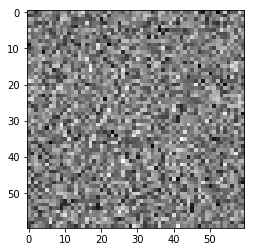

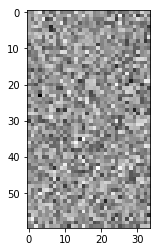

Starting episode 0 (total steps: 0)
Starting episode 1 (total steps: 488)
Starting episode 2 (total steps: 1088)
Starting episode 3 (total steps: 1572)
Starting episode 4 (total steps: 2062)
Starting episode 5 (total steps: 2545)
Starting episode 6 (total steps: 3213)
Starting episode 7 (total steps: 3703)
Starting episode 8 (total steps: 4190)
Starting episode 9 (total steps: 4971)
total_steps: 5400
mean log loss (last 100 training frames): 217299 

Displaying model performance on 2 random frames from buffer...



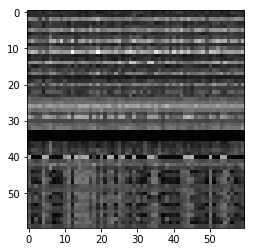

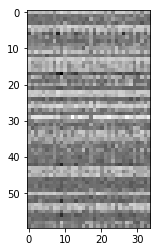

Example frame 0
action: 2, previous action: 2


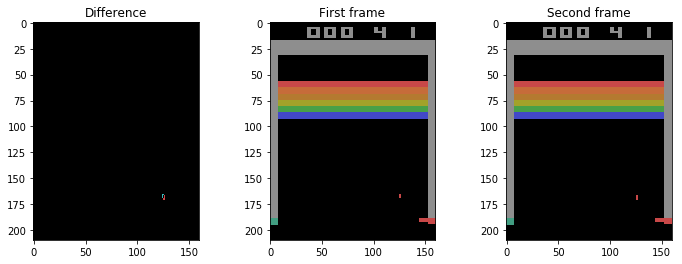


Showing region near mover 0...



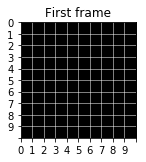

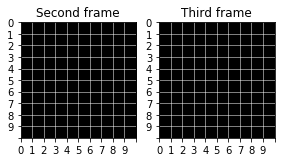

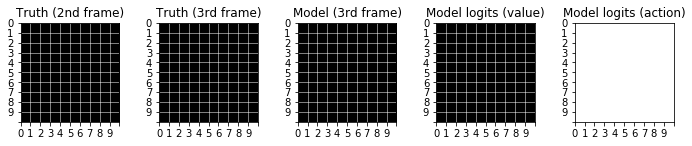

Probability assigned to true location: 0.000000


Showing region near mover 2...



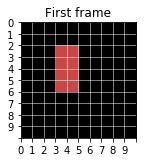

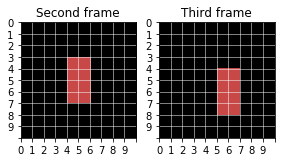

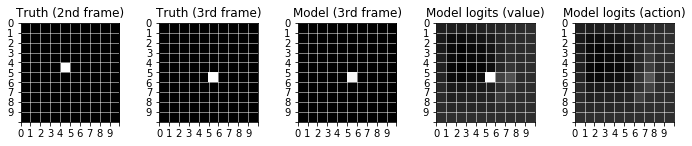

Probability assigned to true location: 0.957755



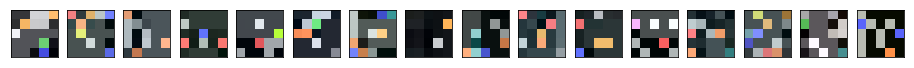

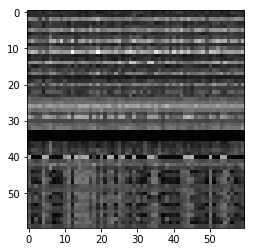

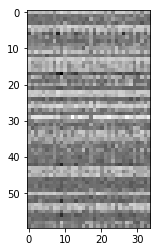

Example frame 1
action: 0, previous action: 0


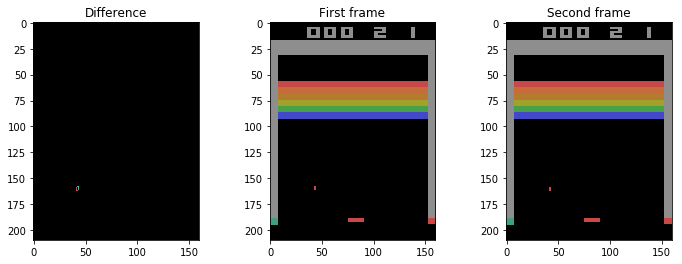


Showing region near mover 0...



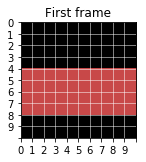

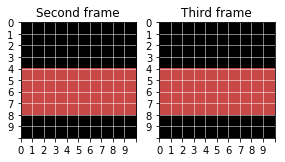

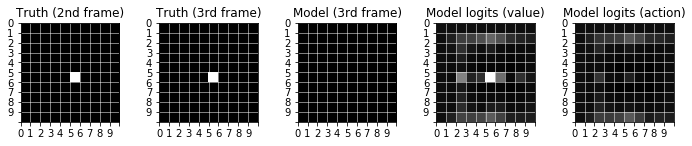

Probability assigned to true location: 0.000892


Showing region near mover 2...



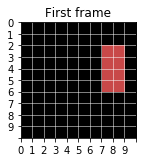

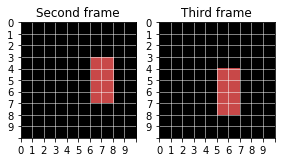

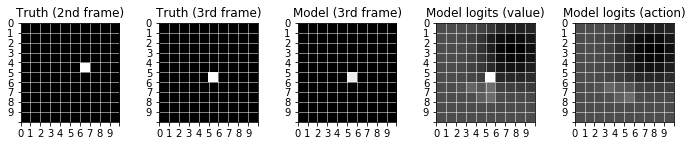

Probability assigned to true location: 0.932048



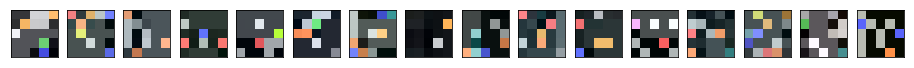

Starting episode 10 (total steps: 5454)
total_steps: 5800
mean log loss (last 100 training frames):  6 

Displaying model performance on 2 random frames from buffer...



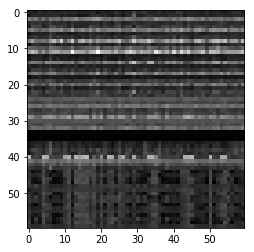

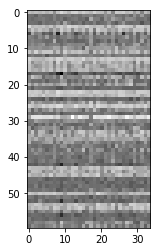

Example frame 0
action: 3, previous action: 2


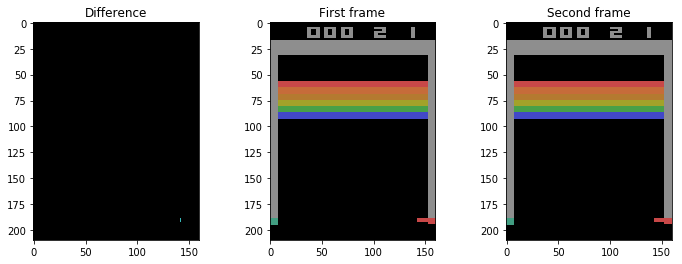


Showing region near mover 0...



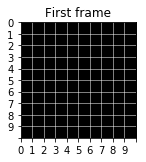

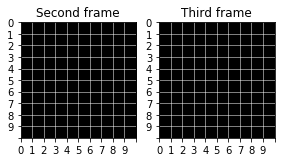

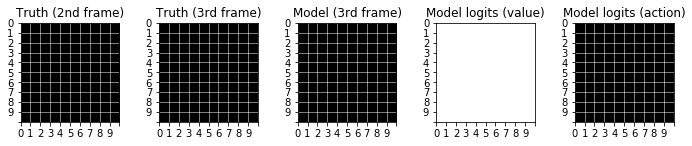

Probability assigned to true location: 0.000000


Showing region near mover 2...



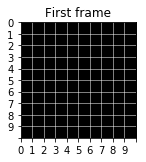

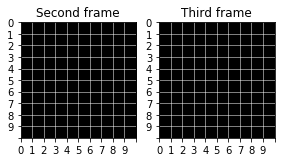

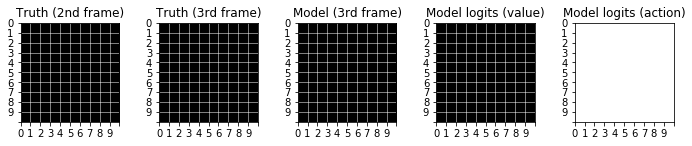

Probability assigned to true location: 0.000000



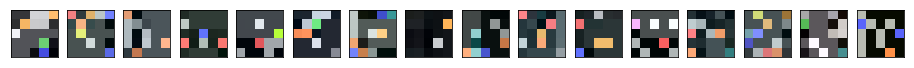

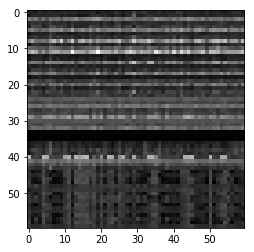

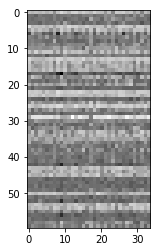

Example frame 1
action: 1, previous action: 3


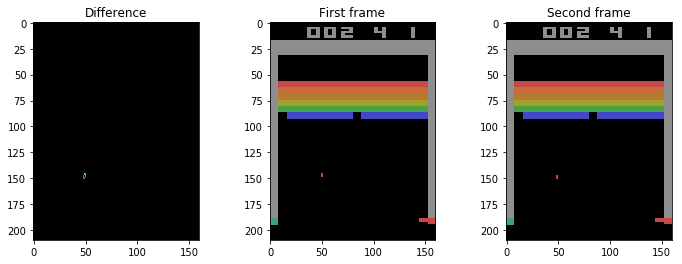


Showing region near mover 0...



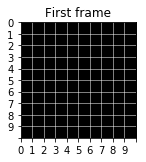

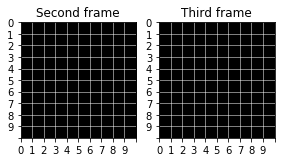

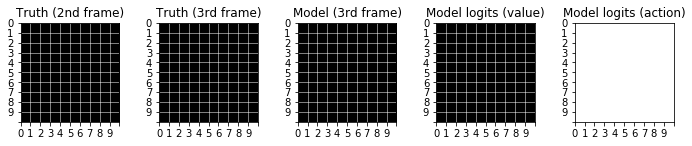

Probability assigned to true location: 0.000000


Showing region near mover 2...



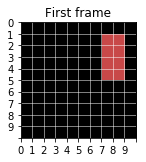

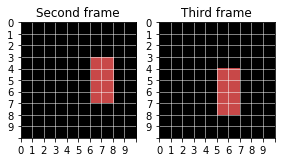

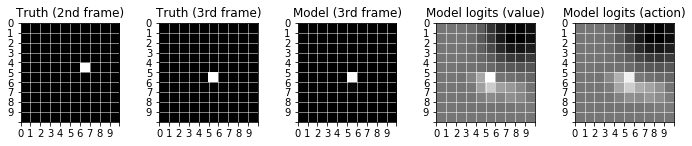

Probability assigned to true location: 0.991582



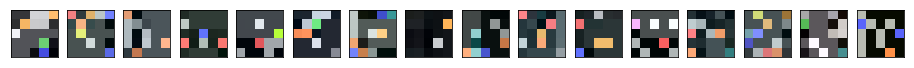

Starting episode 11 (total steps: 5944)
total_steps: 6200
mean log loss (last 100 training frames):  5 

Displaying model performance on 2 random frames from buffer...



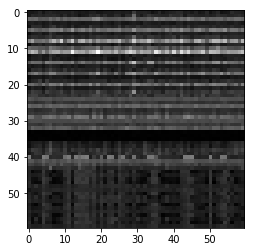

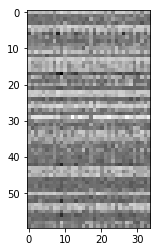

Example frame 0
action: 0, previous action: 3


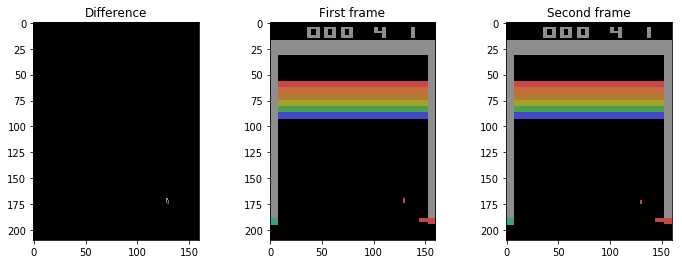


Showing region near mover 0...



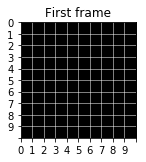

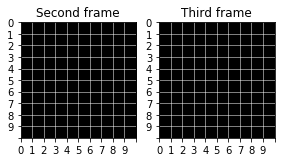

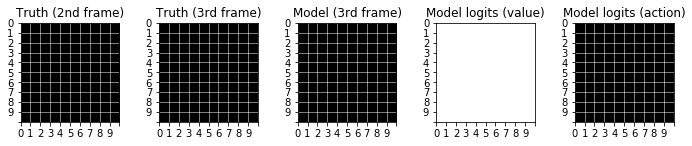

Probability assigned to true location: 0.000000


Showing region near mover 2...



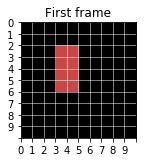

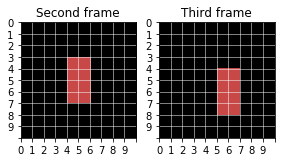

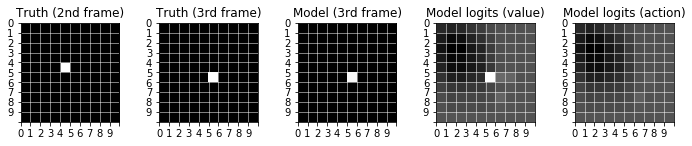

Probability assigned to true location: 0.971531



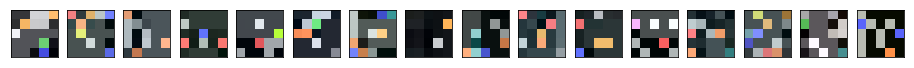

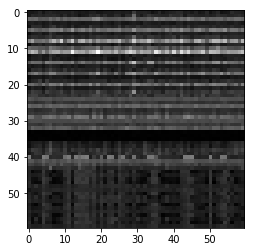

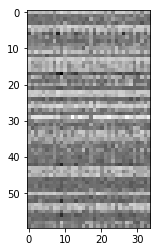

Example frame 1
action: 0, previous action: 0


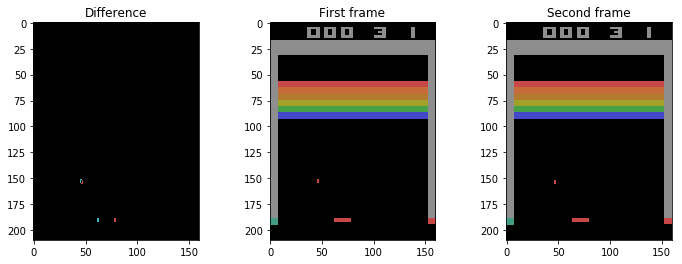


Showing region near mover 0...



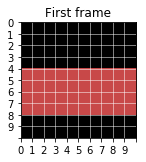

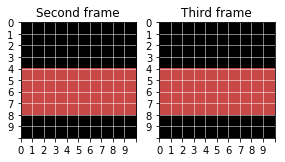

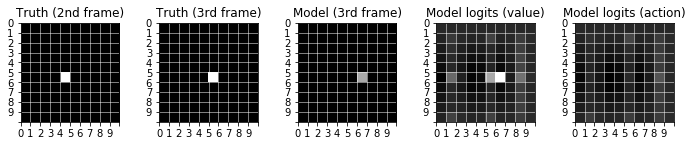

Probability assigned to true location: 0.005316


Showing region near mover 2...



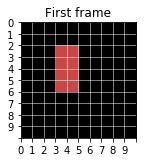

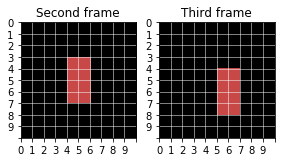

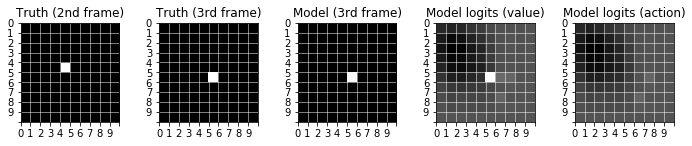

Probability assigned to true location: 0.972133



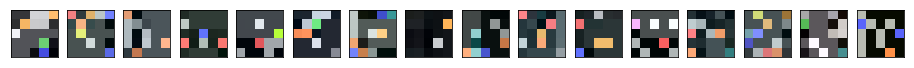

KeyboardInterrupt: 

In [145]:
# making params that depend on batch_size
burnin_frames_init = batch_size * burnin_batches_init
burnin_frames_new_mover = batch_size * burnin_batches_new_mover
outlier_sample_min_size = batch_size * outlier_sample_min_batches
free_kernel_frames = batch_size * free_kernel_batches

tf.reset_default_graph()

myBuffer = experience_buffer(buffer_size=50000)
buffer_pushes = 0

#Set the rate of random action decrease.
e = startE
stepDrop = (startE - endE)/anneling_steps

#create lists to contain total rewards and steps per episode
jList = []
rList = []
total_steps = 0

#statistics on Q
Qpred_list = []
Qtarget_list = []
QrList = []

frame_err_list = np.zeros((0, pt.mt.n_base_movers))
reference_err_list = []
reward_err_list = []

mean_reward_pool = None

#Make a path for our model to be saved in.
if not os.path.exists(path):
    os.makedirs(path)

sess = tf.Session()

QN_index = 0

if breakout:
    frame_h = 210
else:
    frame_h = 250

mainQN = protoModelnetwork(env, pt, 'mainQN',
            dueling=True,
            lr=learning_rate, eps=adam_eps,
                           bg=bg,
                          n_free_kernels=n_free,
                          frame_h=frame_h,
                          n_frames=n_frames)

init = tf.global_variables_initializer()
sess.run(init)

c1_weights = sess.run(mainQN.conv1_model_kernel)
c1_weights_flat = np.reshape(c1_weights,(25,c1_weights.shape[-2],c1_weights.shape[-1]))
c1_mean_abs = np.mean(np.abs(c1_weights_flat), axis=0)
plt.imshow(c1_mean_abs, cmap='gray',interpolation='nearest')
plt.show()

all_vars = tf.trainable_variables()
c2_weights = [v for v in all_vars \
 if v.name == 'Conv/weights:0'][0]\
.eval(session=sess)
c2_weights_flat = np.reshape(c2_weights,(25,c2_weights.shape[-2],c2_weights.shape[-1]))
c2_mean_abs = np.mean(np.abs(c2_weights_flat), axis=0)
plt.imshow(c2_mean_abs, cmap='gray',interpolation='nearest')
plt.show()

saver = tf.train.Saver()

if load_model == True:
    print('Loading Model...')
    ckpt = tf.train.get_checkpoint_state(path)
    saver.restore(sess,ckpt.model_checkpoint_path)

#updateTarget(targetOps,sess) #Set the target network to be equal to the primary network.
for i in range(num_episodes):
    print 'Starting episode %d (total steps: %d)' % (i, total_steps)
    episodeBuffer = experience_buffer()
    #Reset environment and get first new observation(s)
    s_list, r, d, info = initial_obs(env, n_frames, breakout)
    s_stack = np.dstack(s_list)
    s = processState(s_stack)

    if breakout:
        a = 1
    else:
        # fix this
        a = 0

    d = False
    rAll = 0
    j = 0

    # periodically evaluate
    if False:#i % 5 == 0 and total_steps  > pre_train_steps:
        eval_episode = True
        saved_e = e
        e = 0.1
    else:
        eval_episode = False

    act_repeat_countdown = 0
    breakout_requesting = False
    breakout_requesting_countdown = 1
    while j < max_epLength:
        j+=1

        save_to_buffer = True
        old_a = a

        if breakout and breakout_requesting_countdown > 0:
            breakout_requesting_countdown -= 1
            save_to_buffer = False
        if breakout and breakout_requesting:
            # prevent from saving the frame pair where the ball appears
            save_to_buffer = False
            breakout_requesting = False
            breakout_requesting_countdown = n_frames
        if breakout and np.array_equal(s_list[0],s_list[1]):
            # breakout: requesting next ball
            a = 1
            save_to_buffer = False
            breakout_requesting = True
        elif act_repeat_countdown == 0:
            a = np.random.randint(0,env.action_space.n)
            for _ in range(act_init_len):
                s_next,r,d,info = env.step(a)
                s_list.pop(0)
                s_list.append(s_next)
                s_stack = np.dstack(s_list)
                s = processState(s_stack)
                old_a = a
            act_repeat_countdown = act_repeat_len
        else:
            act_repeat_countdown -= 1

        s_next,r,d,info = env.step(a)

        s_list.pop(0)
        s_list.append(s_next)

        s_stack = np.dstack(s_list)
        s1 = processState(s_stack)

        total_steps += 1

#         target_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:[s1]})
#         loss = sess.run(mainQN.loss, \
#             feed_dict={mainQN.scalarInput:[s],
#                        mainQN.target:target_pool,
#                        mainQN.actions:[a],
#                        mainQN.old_actions:[old_a]})

        if (r > 0) or d:
            buffer_repeat = 1
        else:
            buffer_repeat = 1
        if save_to_buffer:
            buffer_pushes += 1
            for dummy in range(buffer_repeat):
                episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d,old_a,0]),
                                             [1,7]),reward_prop) #7th entry is loss if we are tracking it for every frame

        if total_steps > pre_train_steps and not eval_episode:
            if mean_reward_pool is None:

#                 bootstrapQN = protoModelnetwork(env, h_size, mover_prototypes, \
#                        mover_disps, md_equiv_classes, 5, 'bootstrapQN', dueling=True,
#                           lr=0.001, eps=1e-3, mean_reward_pool=None)
#                 init = tf.global_variables_initializer()
#                 sess.run(init)

                #reward_frames = [f[3] for f in myBuffer.buffer if f[2]>0.5]
                #reward_pools = sess.run(bootstrapQN.conv_dm,feed_dict={bootstrapQN.scalarInput:reward_frames})

                #mean_reward_pool = np.mean(reward_pools,axis=0)
                mean_reward_pool = True # hack, get rid of this once we care

            if e > endE:
                e -= stepDrop

            if total_steps % (update_freq) == 0:
                trainBatchFull = np.zeros((0, 7))
                targetPoolFull = np.zeros((0, frame_h, 160, pt.mt.n_base_movers))
                while trainBatchFull.shape[0] < batch_size:
                    if True:#total_steps < attn_start:
                        trainBatch = myBuffer.sample(batch_size, attention=False)
                    else:
                        trainBatch, _ = myBuffer.sample(batch_size, attention=True,
                                                               rate=attn_rate)
                    if QN_index == 0:
                        target_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,3])})
                    else:
                        target_pool = sess.run(mainQN.free_kernels,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,3])})

                    mover_log_losses = sess.run(mainQN.mover_log_losses, \
                            feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]),
                                       mainQN.target:target_pool,
                                       mainQN.actions:trainBatch[:,1],
                                       mainQN.old_actions:trainBatch[:,5]})
                    train_inds = (np.max(mover_log_losses - loss_thresh,1) > 0)
                    trainBatch = trainBatch[train_inds,:]
                    target_pool = target_pool[train_inds,:,...,:]
                    trainBatchFull = np.concatenate([trainBatchFull,
                                                     trainBatch[:(batch_size-trainBatchFull.shape[0]),:]],0)
                    targetPoolFull = np.concatenate([targetPoolFull,
                                     target_pool[:(batch_size-targetPoolFull.shape[0]),:,...,:]],0)

                trainBatch = trainBatchFull
                target_pool = targetPoolFull
                frame_err_list = np.concatenate([frame_err_list, mover_log_losses])

                if False:#len(frame_err_list) > free_kernel_frames and QN_index == 0:
                    QN_index += 1
                    prev_filter_counts = (mainQN.n_movers, [len(d) for d in pt.mover_disps])

                    mainQN = protoModelnetwork(env, pt, 'mainQN',
                    dueling=True,
                    lr=learning_rate, eps=adam_eps,
                       mean_reward_pool=None,
                    n_free_kernels=n_free,
                    existing_filters_counts=prev_filter_counts,
                    net_index=QN_index,
                    train_free_kernels=False)

                    tf_vars = tf.global_variables()
                    tf_initialized = sess.run([tf.is_variable_initialized(v) for v in tf_vars])
                    tf_vars_uninitialized = [v for i, v in enumerate(tf_vars) if not tf_initialized[i]]
                    sess.run(tf.variables_initializer(tf_vars_uninitialized))


                if False:#len(frame_err_list) > (burnin_frames_init + QN_index*burnin_frames_new_mover):
                    worst_mover = np.random.randint(mainQN.n_base_movers)#worst_frame_ind[1]
                    worst_frame_ind = np.argmax(mover_log_losses[:,worst_mover])
#                     worst_frame_ind = np.unravel_index(np.argmax(mover_log_losses),
#                                                        mover_log_losses.shape)
                    worst_frame = trainBatch[worst_frame_ind,:]
                    current_thresh = np.median(frame_err_list[-outlier_sample_min_size:,worst_mover]) +\
                    new_mover_thresh*np.std(frame_err_list[-outlier_sample_min_size:,worst_mover])
                    if mover_log_losses[worst_frame_ind, worst_mover] > current_thresh:
                        print 'threshold exceeded'
                        plt.figure(figsize=(12,4))
                        wf_s0 = np.reshape(worst_frame[0],(frame_h,160,6))
                        wf_s1 = np.reshape(worst_frame[3],(frame_h,160,6))
                        plt.subplot(131)
                        plt.imshow(wf_s0[:,:,3:] - wf_s0[:,:,:3])
                        plt.subplot(132)
                        plt.imshow(wf_s0[:,:,:3])
                        plt.subplot(133)
                        plt.imshow(wf_s0[:,:,3:])
                        plt.show()
                        print ('loss',mover_log_losses[worst_frame_ind, worst_mover],'threshold', current_thresh)
                        # take snapshots of outliers
                        n_movers_before = len(pt.mover_prototypes)
                        prev_filter_counts = (mainQN.n_movers, [len(d) for d in pt.mover_disps])

                        print 'mt has %d movers, QN has %d' % (n_movers_before, mainQN.n_movers)
                        wf_fp0 = FramePair(wf_s0[:,:,:3],wf_s0[:,:,3:],0,0)
                        wf_fp1 = FramePair(wf_s1[:,:,:3],wf_s1[:,:,3:],0,0)
                        pt.mt.process_frame_pair(wf_fp0, base_movers=False)
                        pt.mt.process_frame_pair(wf_fp1, base_movers=False)

                        with open(pt.mt_filename,'w') as mt_file:
                            cPickle.dump(pt.mt, mt_file)

                        pt.prototype_game(game_id)
                        n_movers_after = len(pt.mover_prototypes)
                        if (n_movers_after - n_movers_before) > 0:
                            QN_index += 1

                            print 'found %d new movers' % (n_movers_after - n_movers_before)

                            mainQN = protoModelnetwork(env, pt, 'mainQN',
                            dueling=True,
                            lr=learning_rate, eps=adam_eps,
                               mean_reward_pool=None,
                            n_free_kernels=n_free,
                            existing_filters_counts=prev_filter_counts,
                            net_index=QN_index,
                            n_frames=n_frames)

                            tf_vars = tf.global_variables()
                            tf_initialized = sess.run([tf.is_variable_initialized(v) for v in tf_vars])
                            tf_vars_uninitialized = [v for i, v in enumerate(tf_vars) if not tf_initialized[i]]
                            sess.run(tf.variables_initializer(tf_vars_uninitialized))

                #frame_err_list.append(sum(((target_pool-pred_pool)**2).flatten()))
                #reference_err_list.append(sum(((target_pool-previous_pool)**2).flatten()))
                #update_ops = [mainQN.reward_loss, mainQN.updateModel, mainQN.reward_updateModel]

                if ((len(frame_err_list) // free_kernel_frames) % 2) == 1:
                    update_ops = [mainQN.updateModel_free]
                else:
                    update_ops = [mainQN.updateModel]
                if trainBatch.shape[0] > 0:
                    (_) = \
                    sess.run(update_ops, \
                        feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]),
                                   mainQN.target:target_pool,
                                   mainQN.actions:trainBatch[:,1],
                                   mainQN.old_actions:trainBatch[:,5]})
                #reward_err_list.append(reward_loss)

        rAll += r
        s = s1

        if d == True:
            break

        if total_steps > pre_train_steps and \
        ((total_steps - pre_train_steps) / update_freq) % print_rate == 0:
            print 'total_steps: %d' % total_steps
            print 'mean log loss (last 100 training frames): %2.f ' % \
            np.mean(frame_err_list[-batch_size*100:,:])
            n_example_frames = 2
            print '\nDisplaying model performance on %d random frames from buffer...\n'  % n_example_frames
            for example_frame_ind in range(n_example_frames):
                displayBatch = myBuffer.sample(1, attention=False)
                target_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})
                pred_pool = sess.run(mainQN.pred_pool,\
                                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                                mainQN.actions:displayBatch[:,1],
                                                mainQN.old_actions:displayBatch[:,5]})
                previous_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0])})

                pred_V = sess.run(mainQN.streamV,\
                         feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                    mainQN.actions:displayBatch[:,1],
                                    mainQN.old_actions:displayBatch[:,5]})
                pred_A = sess.run(tf.einsum('abcde,ae->abcd',mainQN.streamA,mainQN.actions_onehot),\
                                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                                mainQN.actions:displayBatch[:,1],
                                                mainQN.old_actions:displayBatch[:,5]})

                c1_weights = sess.run(mainQN.conv1_model_kernel)
                c1_weights_flat = np.reshape(c1_weights,(25,c1_weights.shape[-2],c1_weights.shape[-1]))
                c1_mean_abs = np.mean(np.abs(c1_weights_flat), axis=0)
                plt.imshow(c1_mean_abs, cmap='gray',interpolation='nearest')
                plt.show()
                
                all_vars = tf.trainable_variables()
                c2_weights = [v for v in all_vars \
                 if v.name == 'Conv/weights:0'][0]\
                .eval(session=sess)
                c2_weights_flat = np.reshape(c2_weights,(25,c2_weights.shape[-2],c2_weights.shape[-1]))
                c2_mean_abs = np.mean(np.abs(c2_weights_flat), axis=0)
                plt.imshow(c2_mean_abs, cmap='gray',interpolation='nearest')
                plt.show()
                
                print "Example frame %d" % example_frame_ind
                print 'action: %d, previous action: %d' % (displayBatch[0][1],
                                                           displayBatch[0][5])

                plt.figure(figsize=(12,4))
                s0 = np.reshape(displayBatch[0,0],(frame_h,160,3*n_frames))
                s1 = np.reshape(displayBatch[0,3],(frame_h,160,3*n_frames))

                s0 = s0[:,:,-6:]
                s1 = s1[:,:,-6:]

                plt.subplot(131)
                plt.imshow(s0[:,:,3:] - s0[:,:,:3])
                plt.title('Difference');
                plt.subplot(132)
                plt.imshow(s0[:,:,:3])
                plt.title('First frame');
                plt.subplot(133)
                plt.imshow(s0[:,:,3:])
                plt.title('Second frame');
                plt.show()

                i_max = target_pool.shape[3]
                j_max = 5
                for ii in range(i_max):
                    print '\nShowing region near mover %d...\n' % pt.mover_ids[ii]
                    target_img = (target_pool[0,:,:,ii]>0.)
                    pred_img = pred_pool[0,:,:,ii]
                    previous_img = (previous_pool[0,:,:,ii]>0.)

                    predV_img = pred_V[0,:,:,ii]
                    predA_img = pred_A[0,:,:,ii]

                    vis_center = np.unravel_index(np.argmax(target_img), target_img.shape)
                    vis_center = (max(vis_center[0],5), max(vis_center[1],5))
                    target_img = target_img[vis_center[0]-5:vis_center[0]+5,
                                           vis_center[1]-5:vis_center[1]+5]
                    pred_img = pred_img[vis_center[0]-5:vis_center[0]+5,
                                           vis_center[1]-5:vis_center[1]+5]
                    previous_img = previous_img[vis_center[0]-5:vis_center[0]+5,
                                           vis_center[1]-5:vis_center[1]+5]
                    predV_img = predV_img[vis_center[0]-5:vis_center[0]+5,
                       vis_center[1]-5:vis_center[1]+5]
                    predA_img = predA_img[vis_center[0]-5:vis_center[0]+5,
                                           vis_center[1]-5:vis_center[1]+5]

                    #cmap_max = max(np.max(previous_img), np.max(target_img))
                    #cmap_min = min(np.min(previous_img), np.min(target_img))
                    cmap_max = 1; cmap_min = 0
                    cmap_max_VA = max(np.max(predV_img), np.max(predA_img))
                    cmap_min_VA = min(np.min(predV_img), np.min(predA_img))

                    plt.figure(figsize=(12,2*2))
                    plt.subplot(151)
                    plt.imshow(s0[vis_center[0]-5:vis_center[0]+5,
                                  vis_center[1]-5:vis_center[1]+5,:3],
                              interpolation='nearest')
                    plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                    plt.title('First frame')

                    plt.figure(figsize=(12,2*2))
                    plt.subplot(151)
                    plt.imshow(s0[vis_center[0]-5:vis_center[0]+5,
                                  vis_center[1]-5:vis_center[1]+5,3:],
                              interpolation='nearest')
                    plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                    plt.title('Second frame')

                    plt.subplot(152)
                    plt.imshow(s1[vis_center[0]-5:vis_center[0]+5,
                                  vis_center[1]-5:vis_center[1]+5,3:],
                              interpolation='nearest')
                    plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                    plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                    plt.title('Third frame')
                    plt.show()

                    plt.figure(figsize=(12,2*i_max))
                    for jj in range(j_max//5):


                        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+1)
                        plt.imshow(previous_img,cmap='gray',interpolation='nearest',
                                  vmin=cmap_min, vmax=cmap_max)
                        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                        plt.title('Truth (2nd frame)')

                        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+2)
                        plt.imshow(target_img,cmap='gray',interpolation='nearest',
                                  vmin=cmap_min, vmax=cmap_max)
                        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                        plt.title('Truth (3rd frame)')

                        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+3)
                        plt.imshow(softmax20(pred_img),cmap='gray',interpolation='nearest',
                                  vmin=0, vmax=1)
                        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                        plt.title('Model (3rd frame)')

                        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+4)
                        plt.imshow(predV_img,cmap='gray',interpolation='nearest',
                                  vmin=cmap_min_VA, vmax=cmap_max_VA)
                        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                        plt.title('Model logits (value)')

                        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+5)
                        plt.imshow(predA_img,cmap='gray',interpolation='nearest',
                                  vmin=cmap_min_VA, vmax=cmap_max_VA)
                        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
                        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
                        plt.title('Model logits (action)')
                        plt.show()

                        print 'Probability assigned to true location: %f\n' \
                        % softmax20(pred_img[5,5])

                        dcl = sess.run(mainQN.disp_conv_list,\
                         feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                    mainQN.actions:displayBatch[:,1],
                                    mainQN.old_actions:displayBatch[:,5]})
                #plt.show()

                if n_free > 0:
                    fk = sess.run(mainQN.free_kernels,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})

                    all_vars = tf.trainable_variables()
                    free_weights=[v for v in all_vars \
                     if v.name == 'mainQN/pg_free/weights:0'][0]\
                    .eval(session=sess)

                    i_max=1#n_frames
                    j_max=mainQN.n_free_kernels
                    plt.figure(figsize=(j_max, i_max))
                    for ii in range(i_max):
                        # target_img = (target_pool[0,:,:,ii])
                        # vis_center = np.unravel_index(np.argmax(target_img), target_img.shape)
                        # vis_center = (max(vis_center[0],5), max(vis_center[1],5))
                        for jj in range(j_max):
                            plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
                            plt.xticks([])
                            plt.yticks([])
                            fw = free_weights[:,:,(ii*3):((ii+1)*3),jj]
                            fw = fw - np.min(fw)
                            fw = fw / np.max(fw)
                            plt.imshow(fw, interpolation='nearest')
    #                         fk_img = fk[0,:,:,jj]

    #                         fk_img = fk_img[vis_center[0]-5:vis_center[0]+5,
    #                                            vis_center[1]-5:vis_center[1]+5]
    #                         plt.imshow(fk_img,cmap='gray',interpolation='nearest')
                    plt.show()

            avg_window = batch_size*print_rate
            if frame_err_list.shape[0] > 3*avg_window:
                plt.figure()

                for m_id in range(frame_err_list.shape[1]):
                    sqMat = np.resize(frame_err_list[:,m_id],
                                      [frame_err_list.shape[0]//avg_window,
                                                       avg_window])
                    QsqAvgs = np.average(sqMat,1)
                    q95 = np.percentile(sqMat,95,1)
                    qmax = np.percentile(sqMat,100,1)
                    plt.plot(q95[1:],label='95%')
                    plt.plot(QsqAvgs[1:],label='mean')
#                     plt.plot(qmax[1:],label='max')
                    plt.xlabel('Batches/{0}'.format(avg_window // batch_size))
                    plt.ylabel('Log loss')
                    plt.title('Learning curves, mover {0}'
                              .format(pt.mover_ids[m_id]))
                    plt.legend()
                    plt.show()
    if not eval_episode:
        myBuffer.add(episodeBuffer.buffer,False)
        jList.append(j)
        rList.append(rAll)
    else:
        print("Evaluated model")
        print(j, rAll)
        e = saved_e
    #Periodically save the model.
    if i % 100 == 0 and i > 0:
        saver.save(sess,path+'/model-'+str(i)+'.cptk')
        print("Saved Model")


saver.save(sess,path+'/model-'+str(i)+'.cptk')

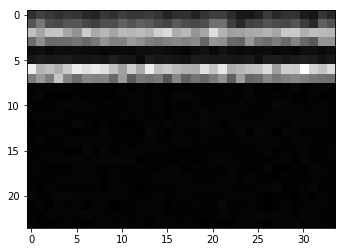

<function matplotlib.pyplot.show>

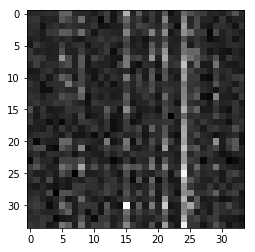

In [39]:
c1_weights = sess.run(mainQN.conv1_model_kernel)
c1_weights_flat = np.reshape(c1_weights,(25,c1_weights.shape[-2],c1_weights.shape[-1]))
c1_mean_abs = np.mean(np.abs(c1_weights_flat), axis=0)
plt.imshow(c1_mean_abs, cmap='gray',interpolation='nearest')
plt.show()

all_vars = tf.trainable_variables()
c2_weights = [v for v in all_vars \
 if v.name == 'Conv/weights:0'][0]\
.eval(session=sess)
c2_weights_flat = np.reshape(c2_weights,(25,c2_weights.shape[-2],c2_weights.shape[-1]))
c2_mean_abs = np.mean(np.abs(c2_weights_flat), axis=0)
plt.imshow(c2_mean_abs, cmap='gray',interpolation='nearest')
plt.show

In [194]:
)avg_window = batch_size*100
if frame_err_list.shape[0] > 3*avg_window:
    plt.figure()

    for m_id in range(frame_err_list.shape[1]):
        sqMat = np.resize(frame_err_list[:,m_id],
                          [frame_err_list.shape[0]//avg_window,
                                           avg_window])
        QsqAvgs = np.average(sqMat,1)
        q95 = np.percentile(sqMat,95,1)
        plt.plot(QsqAvgs[0:],label=('mean ' + str(m_id)))
        #plt.plot(q95[1:],label=('95% ' + str(m_id)))
    plt.show()


SyntaxError: invalid syntax (<ipython-input-194-dd79d2e4dd33>, line 1)

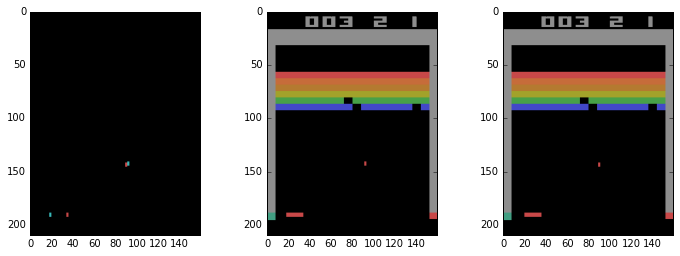

In [1340]:
displayBatch = myBuffer.sample(1, attention=False)

plt.figure(figsize=(12,4))
s0 = np.reshape(displayBatch[0,0],(frame_h,160,6))
plt.subplot(131)
plt.imshow(s0[:,:,3:] - s0[:,:,:3])
plt.subplot(132)
plt.imshow(s0[:,:,:3])
plt.subplot(133)
plt.imshow(s0[:,:,3:])


In [1341]:
target_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})

logits, labels = sess.run([mainQN.logits, mainQN.labels], feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                               mainQN.target:target_pool, 
                               mainQN.actions:displayBatch[:,1],
                               mainQN.old_actions:displayBatch[:,5]})
losses = sess.run(mainQN.mover_log_losses, feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                               mainQN.target:target_pool, 
                               mainQN.actions:displayBatch[:,1],
                               mainQN.old_actions:displayBatch[:,5]})

mom = sess.run(mainQN.conv_moms,\
                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                mainQN.actions:displayBatch[:,1],
                                mainQN.old_actions:displayBatch[:,5]})
cm_f1 = sess.run(mainQN.conv_movers_frame1,\
                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                mainQN.actions:displayBatch[:,1],
                                mainQN.old_actions:displayBatch[:,5]})

In [1451]:
fk = sess.run(mainQN.free_kernels,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})


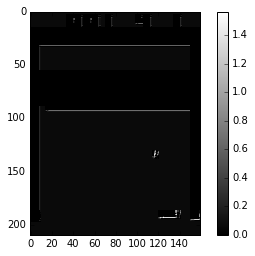

In [1456]:
plt.imshow(fk[0,:,:,3],cmap='gray',interpolation='nearest');
plt.colorbar();

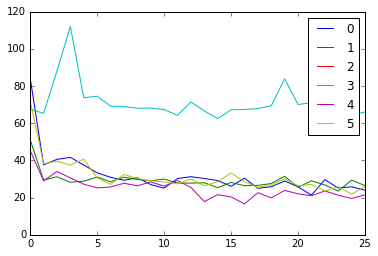

In [1664]:
avg_window = batch_size*200
if frame_err_list.shape[0] > 3*avg_window:
    plt.figure()

    for m_id in range(frame_err_list.shape[1]):
        sqMat = np.resize((32)*frame_err_list[:,m_id],
                          [frame_err_list.shape[0]//avg_window,
                                           avg_window])
        QsqAvgs = np.average(sqMat,1)
        plt.plot(QsqAvgs[0:],label=str(m_id))
    plt.legend()
    plt.show()

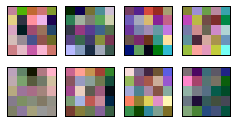

In [1540]:
all_vars = tf.trainable_variables()
free_weights=[v for v in all_vars \
 if v.name == 'mainQN/pg_free/weights:0'][0]\
.eval(session=sess)

i_max=2
j_max=mainQN.n_free_kernels
plt.figure(figsize=(j_max, i_max))
for ii in range(i_max):
    for jj in range(j_max):
        plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
        plt.xticks([])
        plt.yticks([])
        fw = free_weights[:,:,(ii*3):((ii+1)*3),jj]
        fw = fw - np.min(fw)
        fw = fw / np.max(fw)
        plt.imshow(fw, interpolation='nearest')
plt.show()

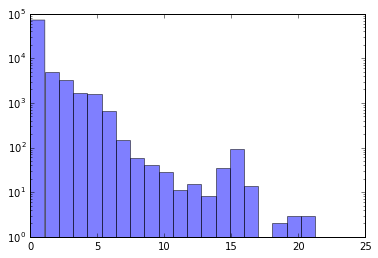

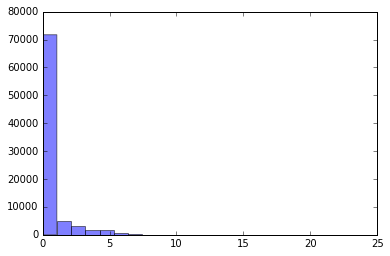

In [1541]:
plt.hist(frame_err_list[2500*batch_size:,1],log=True,bins=20,alpha=0.5);
plt.show()
plt.hist(frame_err_list[2500*batch_size:,1],log=False,bins=20,alpha=0.5);

In [1550]:
avg_window = batch_size*200
sqMat = np.resize((32//batch_size)*np.array(frame_err_list[:,1]),[len(frame_err_list[:,1])//avg_window,avg_window])
QsqAvgs = np.mean(sqMat,1)
q25 = np.percentile(sqMat,25,1)
q50 = np.percentile(sqMat,50,1)
q75 = np.percentile(sqMat,75,1)
q95 = np.percentile(sqMat,95,1)

qmax = np.max(sqMat,1)
qstd = np.std(sqMat,1)

In [6]:
plot_start = 10

plt.plot(q25[plot_start:],label='25%')
plt.plot(q50[plot_start:],label='50%')
plt.plot(QsqAvgs[plot_start:],label='mean')
plt.plot(q75[plot_start:],label='75%')
plt.plot(q95[plot_start:],label='95%')
plt.axis([0,q95[plot_start:].shape[0],-1,max(q95[plot_start:])])
plt.legend(loc=3);

NameError: name 'plt' is not defined

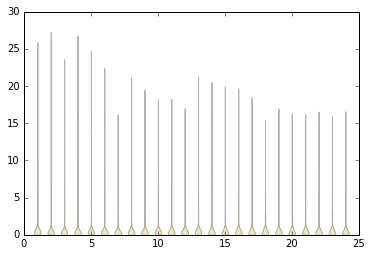

In [1553]:
plt.violinplot(sqMat[1:,:].T, showextrema=False);

In [352]:
def chained_pred(QN, action_gen, length, init_scalarInput, init_act, max_convs,
                 prob_roll=False, prob_cut_auto=True, prob_cutoff=0.9,
                return_prob=False, return_cm=True):
    f0_list = []
    pp_list = []
    cm_list = []
    
    cm = sess.run(QN.conv_movers,\
                 feed_dict={mainQN.scalarInput:np.vstack([init_scalarInput])})
    cm_f1 = sess.run(QN.conv_movers_frame1,\
                     feed_dict={mainQN.scalarInput:np.vstack([init_scalarInput])})
    cm_f0 = np.zeros_like(cm_f1)
    old_a = init_act
    
    for step, a in enumerate(action_gen):
        cm_list.append(cm.copy())
        pred_logit = sess.run(mainQN.pred,\
                     feed_dict={mainQN.actions:[a],
                               mainQN.old_actions:[old_a],
                               mainQN.conv_movers:cm})
        pred_prob = softmax20(pred_logit)
        pp_list.append(pred_prob)
        rand_rolls = np.random.random_sample(pred_prob.shape)
        
        cm_f0[:,:,:,:] = cm_f1[:,:,:,:]
        for m_id in range(QN.n_base_movers):
            max_conv = max_convs[m_id]
            if prob_roll:
                cm_f1[:,...,m_id] = max_conv*(
                (pred_prob[:,...,m_id]>rand_rolls[:,...,m_id]).astype('float32'))
            elif prob_cut_auto:
                cm_f1[:,...,m_id] = max_conv*(
                    (pred_prob[:,...,m_id]>=np.max(pred_prob[:,...,m_id])).astype('float32'))
            else:
                cm_f1[:,...,m_id] = max_conv*(
                    (pred_prob[:,...,m_id]>prob_cutoff).astype('float32'))
        f0_list.append(cm_f0.copy())
        
        cm_f0_list = np.split(cm_f0,QN.n_movers,3)
        cm_f1_list = np.split(cm_f1,QN.n_movers,3)
        cm = np.concatenate([np.concatenate(tup,3) for tup in zip(cm_f0_list,
                                       cm_f1_list)], 3)
        
        old_a = a
        if step >= length:
            break
    ret_val = [f0_list]
    if return_prob:
        ret_val.append(pp_list)
    if return_cm:
        ret_val.append(cm_list)
    return ret_val

In [607]:
testBatch = myBuffer.sample(1)

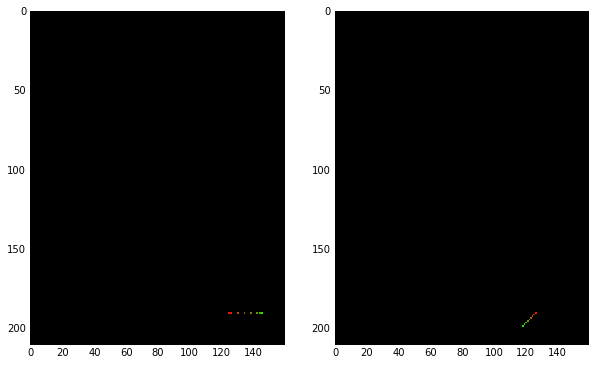

In [608]:
prob_cut = 0.9

length = 10
f0_l, pp_l, cm_l = chained_pred(mainQN, [2 if i < 5 else 0 for i in range(length) ], length,
                       testBatch[0,3], testBatch[0,1], [1 for i in range(mainQN.n_movers)],
                       prob_roll=False,
                       prob_cut_auto=True,
                       prob_cutoff=prob_cut,
                   return_prob=True, return_cm=True)

thresh = 0.1

channel = np.zeros_like(f0_l[0][0,:,:,:])
cm_color = np.stack([channel,channel,channel],2)
for i, cm in enumerate(f0_l):
    t = float(i)/len(f0_l)
    for m_id in range(cm.shape[3]):
        cm_mask = (cm[0,:,:,m_id]>thresh)
        cm_color[:,:,0,m_id][cm_mask] = (1-t)*(cm[0,:,:,m_id][cm_mask]>thresh)
        cm_color[:,:,1,m_id][cm_mask] =  t*(cm[0,:,:,m_id][cm_mask]>thresh)

plt.figure(figsize=(10,10))
for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(cm_color[:,:,:,i],interpolation='nearest')
plt.show()

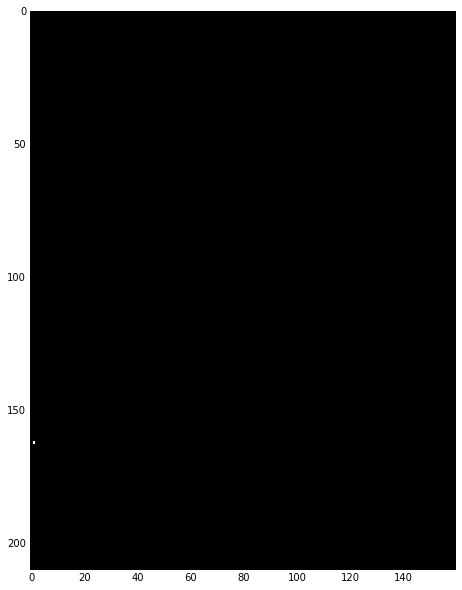

In [408]:
plt.figure(figsize=(10,10))
plt.imshow(pp_l[42][0,:,:,1],cmap='gray',interpolation='nearest')

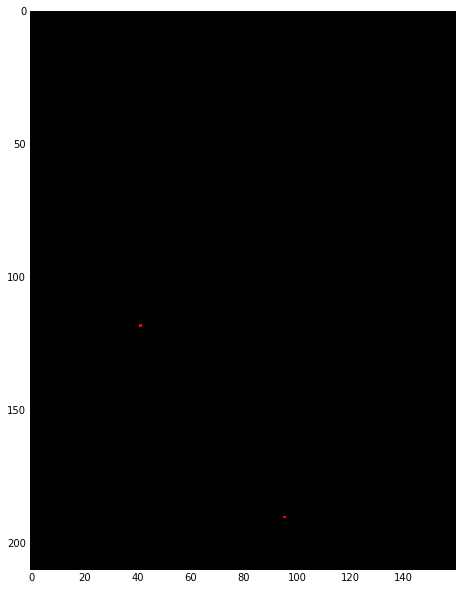

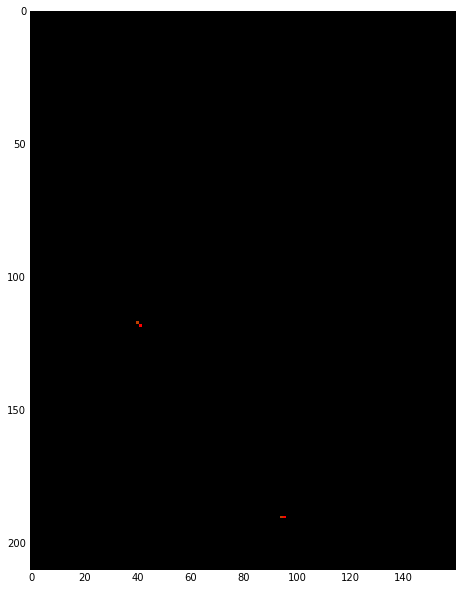

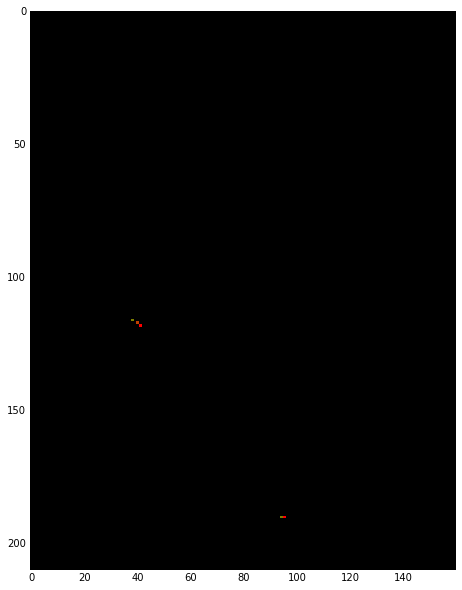

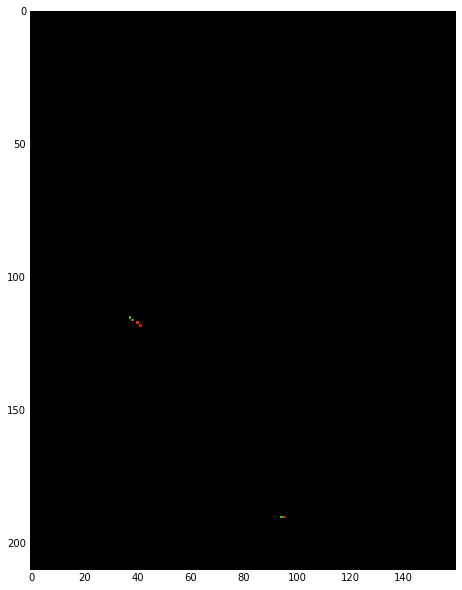

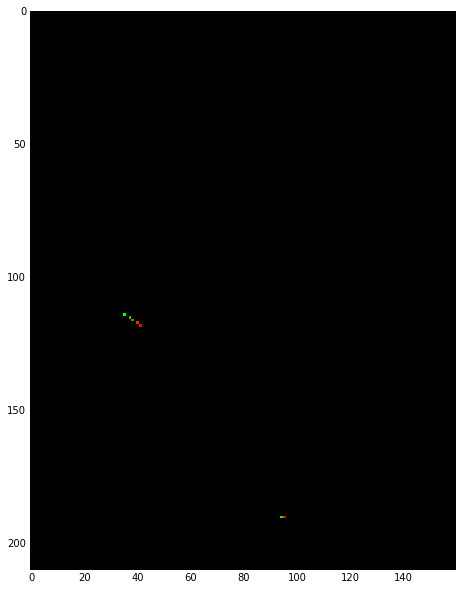

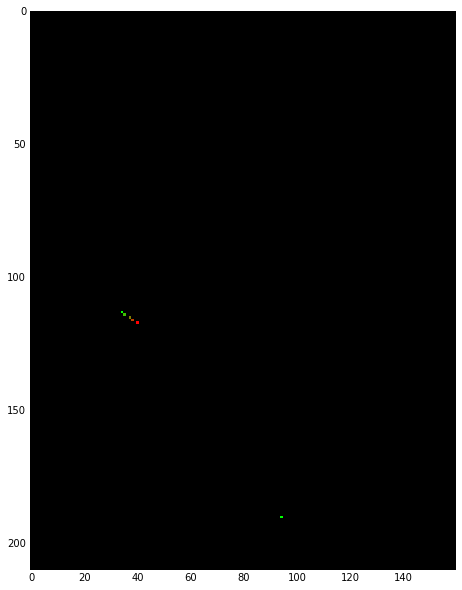

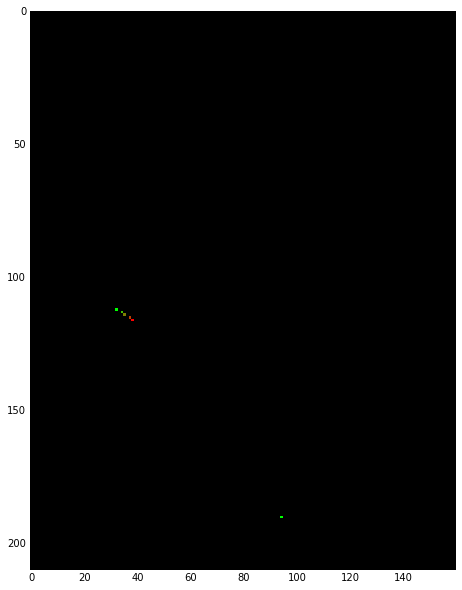

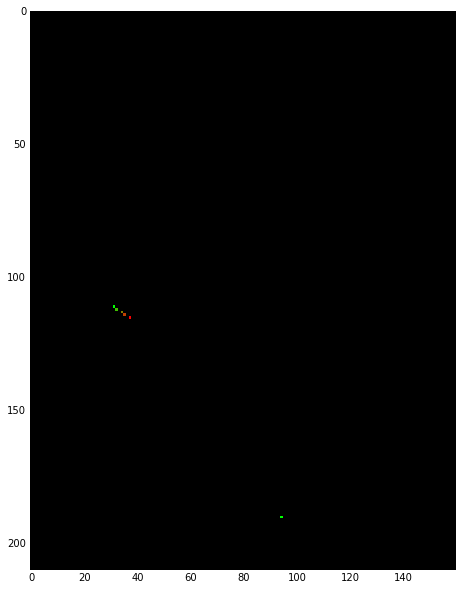

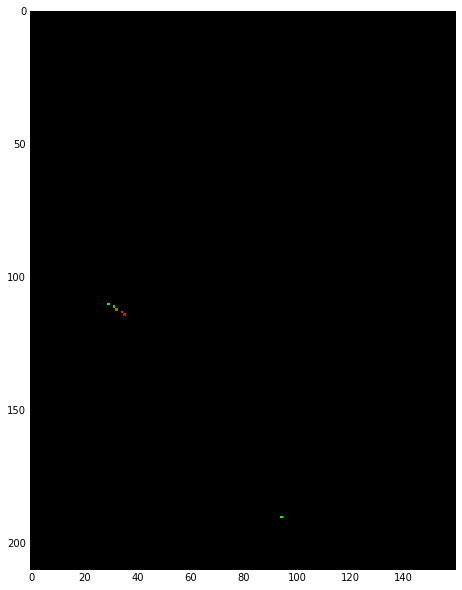

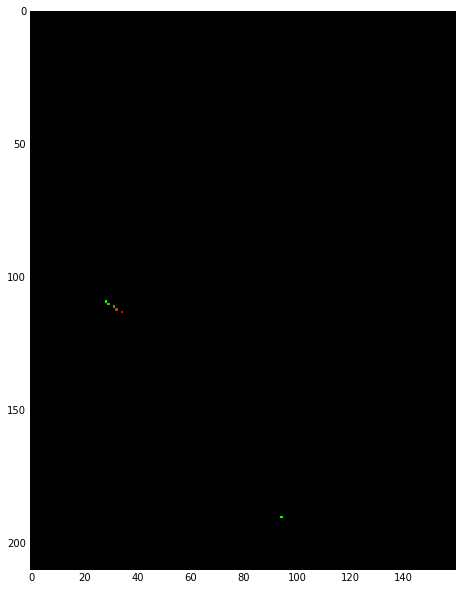

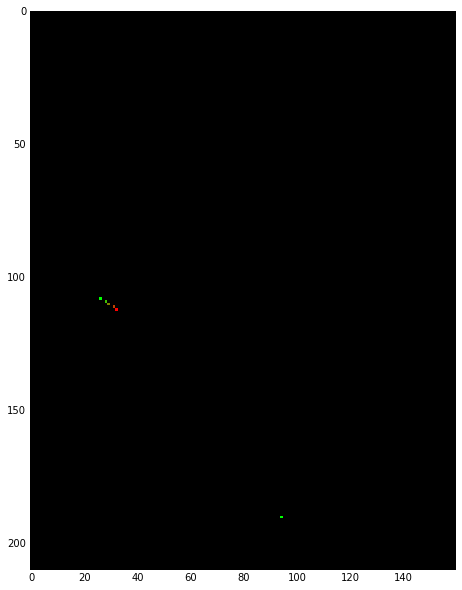

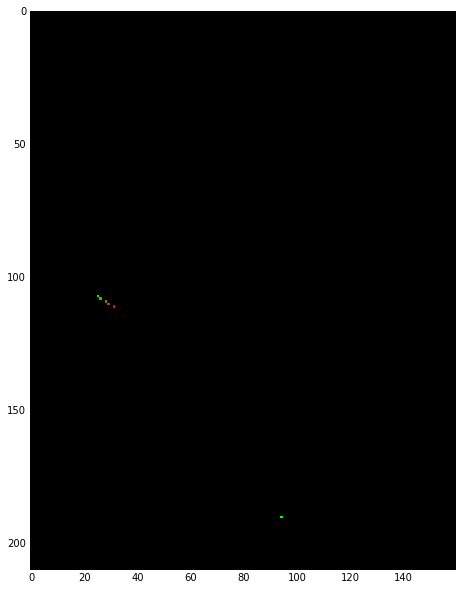

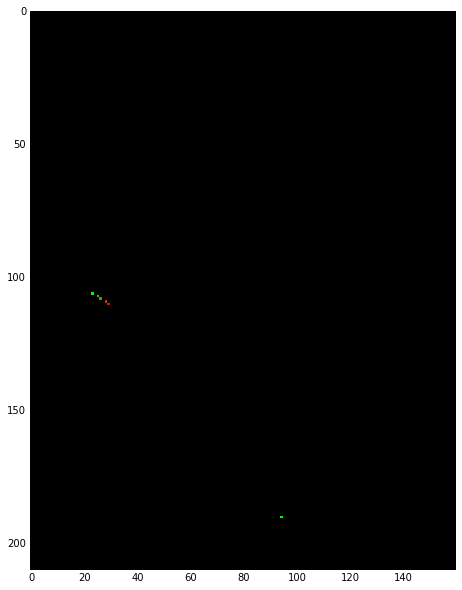

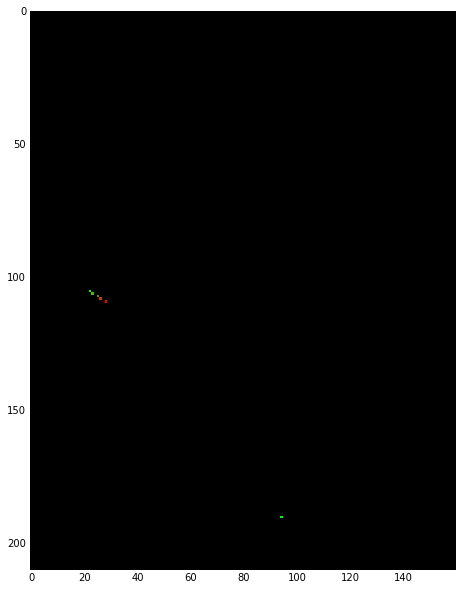

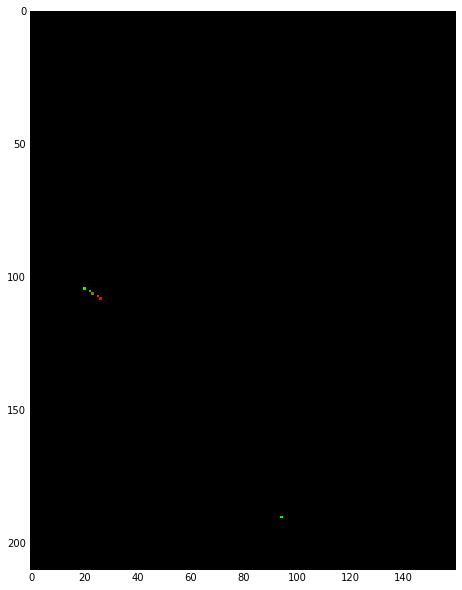

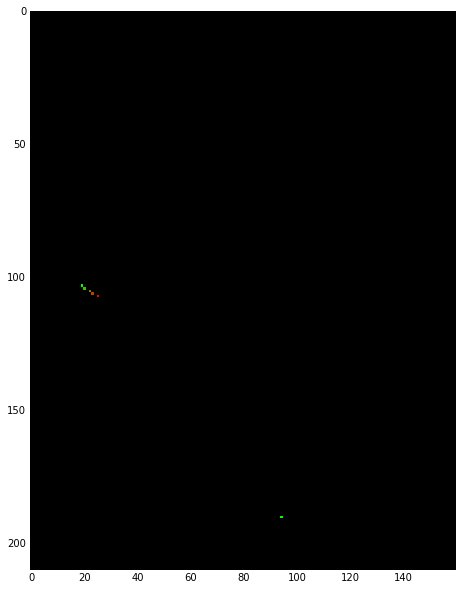

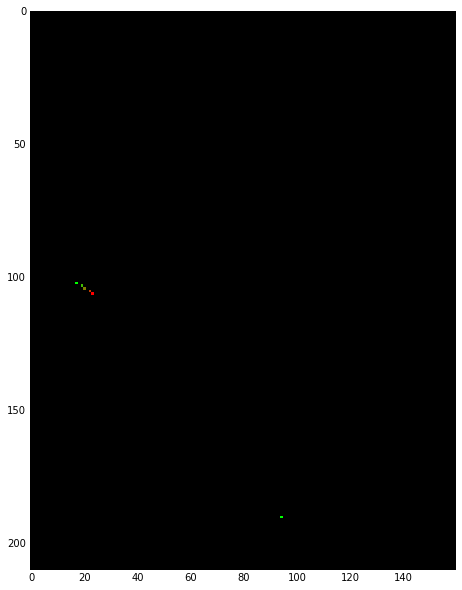

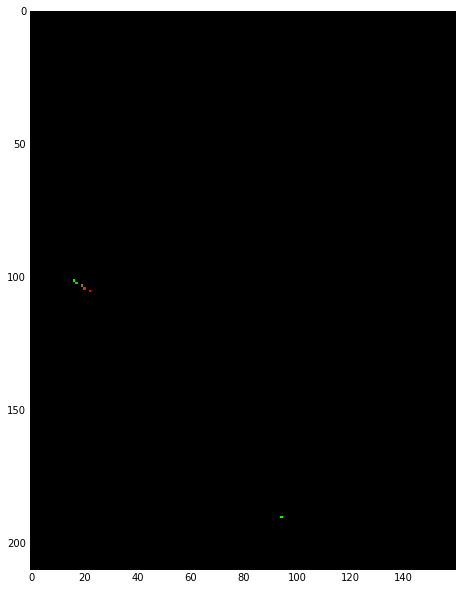

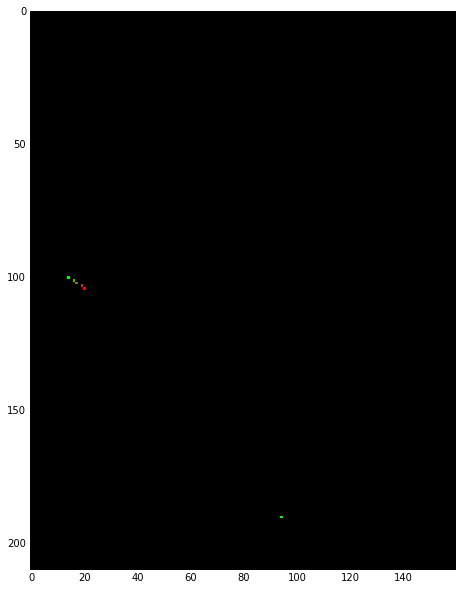

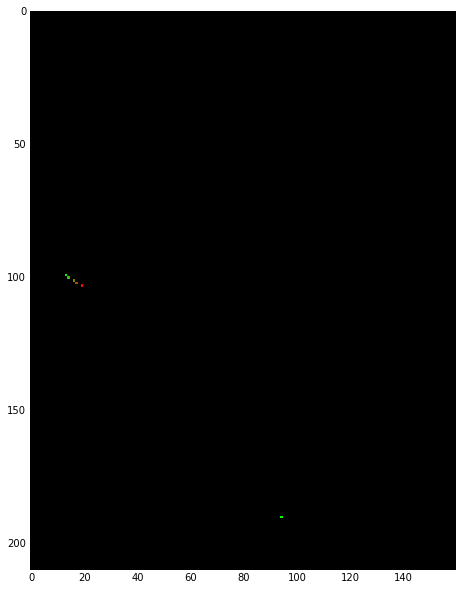

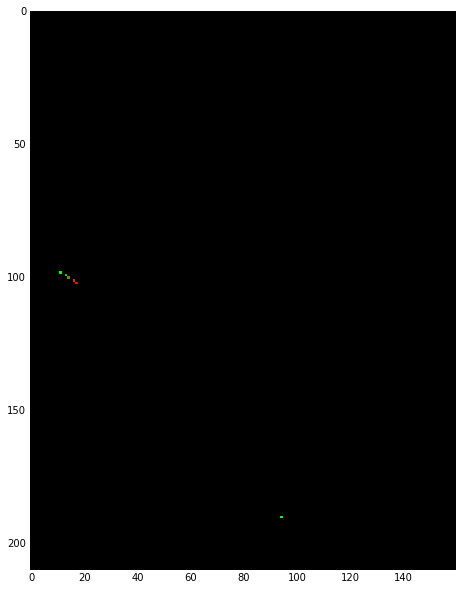

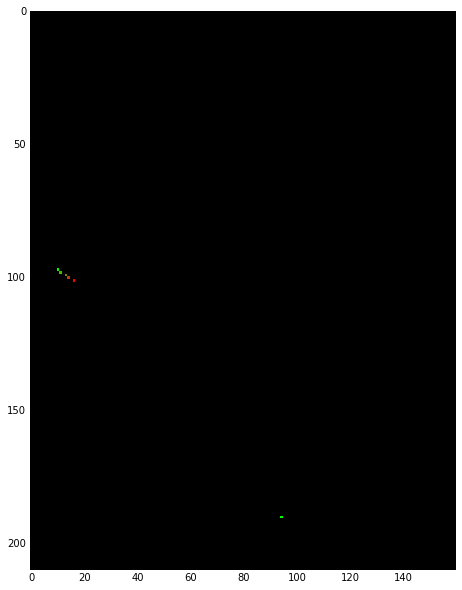

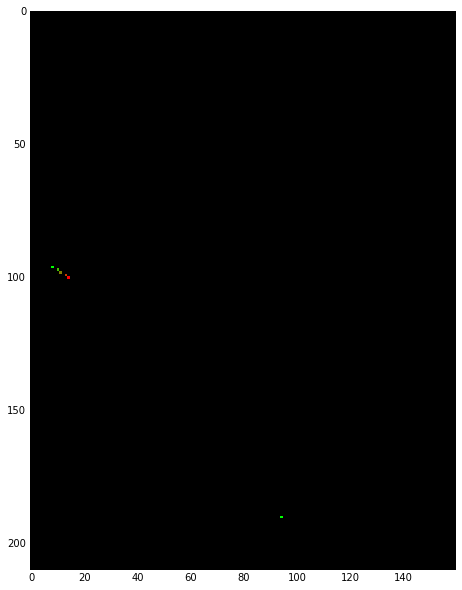

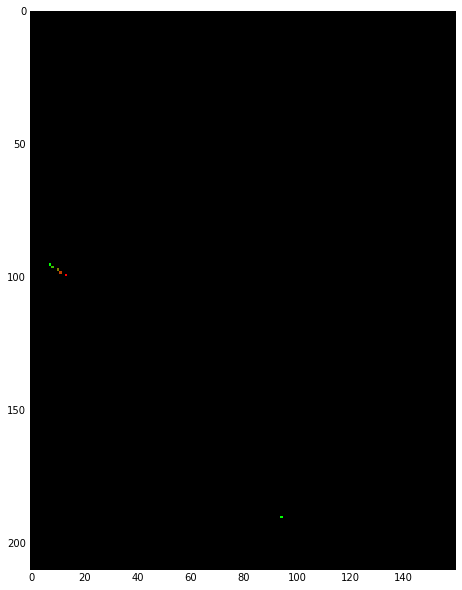

In [374]:
trace_dur = 5

channel = np.zeros_like(f0_l[0][0,:,:,:])
for step in range(1,len(f0_l)):
    cm_color = np.stack([channel,channel,channel],2)
    for i, cm in enumerate(f0_l[max(0,step-trace_dur):step]):
        #t = float(i+max(0,step-trace_dur))/len(f0_l)
        t = float(i)/(trace_dur-1)
        for m_id in range(cm.shape[3]):
            cm_mask = (cm[0,:,:,m_id]>thresh)
            cm_color[:,:,0,m_id][cm_mask] = (1-t)*(cm[0,:,:,m_id][cm_mask]>thresh)
            cm_color[:,:,1,m_id][cm_mask] =  t*(cm[0,:,:,m_id][cm_mask]>thresh)

    plt.figure(figsize=(10,10))
    plt.imshow(np.sum(cm_color,3),interpolation='nearest')
#     for i in range(2):
#             plt.subplot(1,2,i+1)
#             plt.imshow(cm_color[:,:,:,i],interpolation='nearest')
    plt.show()

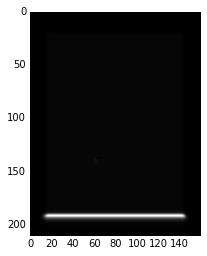

In [2918]:
plt.figure(figsize=(4,4))
pp_frame = pp_l[0][0,:,:,1]

vis_rad = 5
vis_center = np.unravel_index(np.argmax(pp_frame), pp_frame.shape)
pp_img = pp_frame#pp_frame[vis_center[0]-vis_rad:vis_center[0]+vis_rad,
                 #vis_center[1]-vis_rad:vis_center[1]+vis_rad]
plt.imshow(pp_img,interpolation='nearest',cmap='gray')
#np.unique(pp_img)

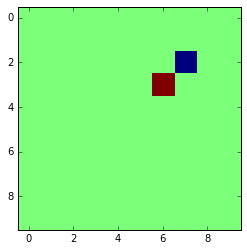

In [2710]:
plt.figure(figsize=(4,4))
cm_frame0 = cm_l[0][0,:,:,0]
cm_frame1 = cm_l[0][0,:,:,1]
f0_img = cm_frame0[vis_center[0]-vis_rad:vis_center[0]+vis_rad,
                 vis_center[1]-vis_rad:vis_center[1]+vis_rad]
f1_img = cm_frame1[vis_center[0]-vis_rad:vis_center[0]+vis_rad,
                 vis_center[1]-vis_rad:vis_center[1]+vis_rad]
plt.imshow(f1_img-f0_img,interpolation='nearest')
#plt.colorbar();

In [2474]:
np.unravel_index(np.argmax(f0_l[10][0,:,:,1]),f0_l[0][0,:,:,1].shape)

(190, 71)

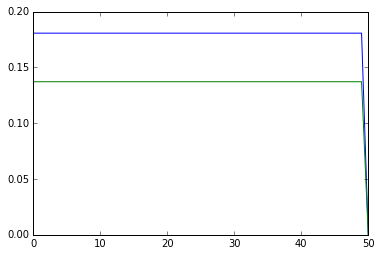

In [2379]:
mover_maxes = np.zeros((length+1,mainQN.n_movers))
for step, cm in enumerate(f0_l):
    for m_id in range(mainQN.n_movers):
        mover_maxes[step,m_id] = np.max(cm[0,:,:,m_id])
        
plt.plot(mover_maxes)

In [49]:
displayBatch = myBuffer.sample(300)
target_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})
pred_pool = sess.run(mainQN.pred_pool,\
                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]), 
                                mainQN.actions:displayBatch[:,1],
                                mainQN.old_actions:displayBatch[:,5]})
previous_pool = sess.run(mainQN.cm_pool,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0])})

pred_V = sess.run(mainQN.streamV,\
         feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                    mainQN.actions:displayBatch[:,1],
                    mainQN.old_actions:displayBatch[:,5]})
pred_A = sess.run(tf.einsum('abcde,ae->abcd',mainQN.streamA,mainQN.actions_onehot),\
                     feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                                mainQN.actions:displayBatch[:,1],
                                mainQN.old_actions:displayBatch[:,5]})

dcl = sess.run(mainQN.disp_conv_list,\
 feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
            mainQN.actions:displayBatch[:,1],
            mainQN.old_actions:displayBatch[:,5]})


# collisions = sess.run(mainQN.conv_collisions,
#                          feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0])})


actions = displayBatch[:,1]
old_actions = displayBatch[:,5]

In [50]:
target = sess.run(mainQN.conv_movers_frame1,feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,3])})

loss = sess.run(mainQN.mover_log_losses, \
                    feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]),
                               mainQN.target:target_pool, 
                               mainQN.actions:displayBatch[:,1],
                               mainQN.old_actions:displayBatch[:,5]})

In [51]:
loss_batch_mean = loss[:,1]#np.sum(np.reshape(loss,(300,len(loss)//300)),1)

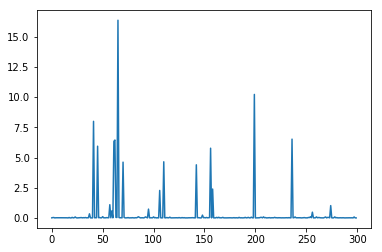

In [52]:
plt.plot(loss_batch_mean)

In [53]:
import pandas as pd
df = pd.DataFrame(loss_batch_mean)
df['actions'] = actions
df['old_actions'] = old_actions

#df.groupby(['actions']).mean()
df.groupby(['actions','old_actions']).mean()

0
actions old_actions          
0       0            0.012161
        1            0.012019
        2            0.068252
        3            0.013256
1       0            0.355080
        1            0.022273
        2            1.061132
        3            0.358002
2       0            0.360136
        1            0.378729
        2            0.485068
        3            0.447692
3       0            0.443559
        1            0.006964
        2            0.699359
        3            0.030358

In [54]:
pd.Series(loss_batch_mean).describe()

count    300.000000
mean       0.310018
std        1.505080
min        0.000000
25%        0.004948
50%        0.010043
75%        0.025407
max       16.367365
dtype: float64

In [55]:
sort_inds = np.argsort(loss_batch_mean)[::-1]

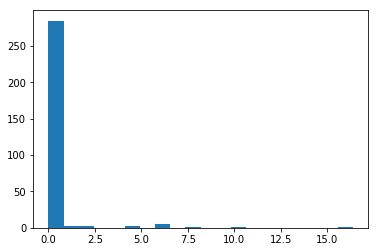

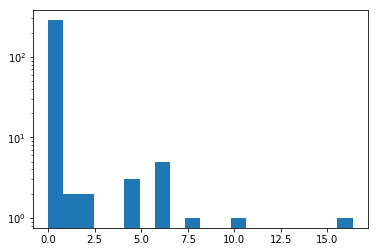

In [56]:
plt.hist(loss_batch_mean,bins=20,log=False); plt.show()
plt.hist(loss_batch_mean,bins=20,log=True);

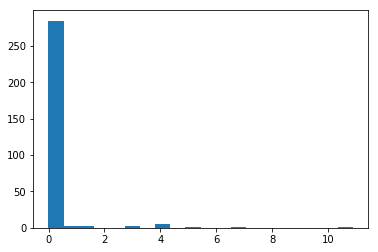

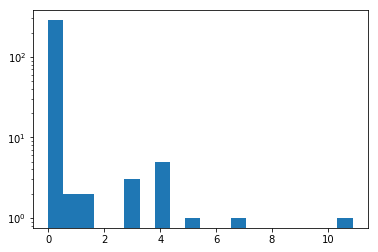

In [57]:
plt.hist((loss_batch_mean-np.median(loss_batch_mean))/np.std(loss_batch_mean),bins=20,log=False); plt.show()
plt.hist((loss_batch_mean-np.median(loss_batch_mean))/np.std(loss_batch_mean),bins=20,log=True);

In [58]:
disps_full = []
for disps in mainQN.pt.mover_disps:
    md_full = []
    for disp in disps:
        md_full.append(disp)
        if disp[0] == 0 and disp[1] == 0:
            md_full.append(disp)
    disps_full.append(md_full)

In [59]:
dcl[0].shape

(300, 210, 160, 24)

1
2
('loss', 16.367365)


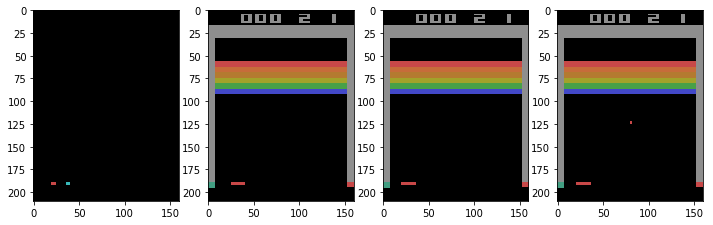

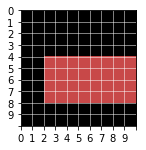

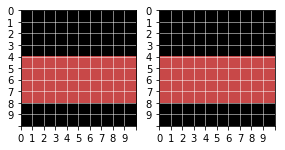

([0.0, 1.0], [0.0, 1.0], 0.71572638)


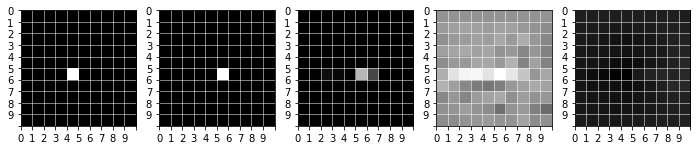

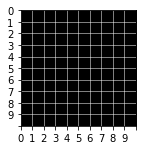

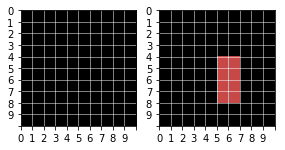

([0.0], [0.0, 1.0], 7.823725e-08)


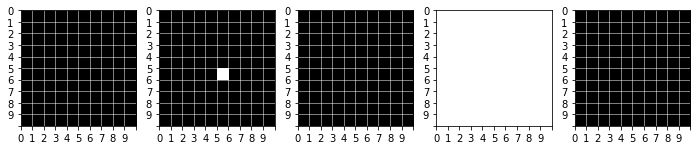

2
3
('loss', 10.225069)


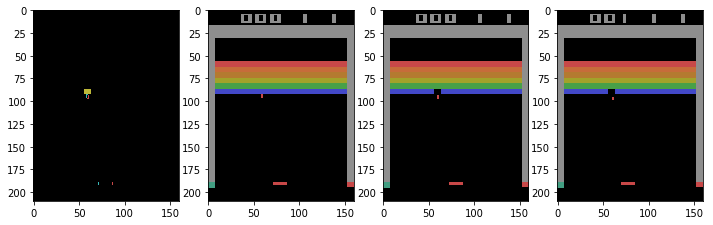

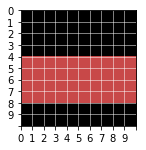

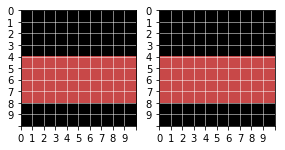

([0.0, 1.0], [0.0, 1.0], 0.68147385)


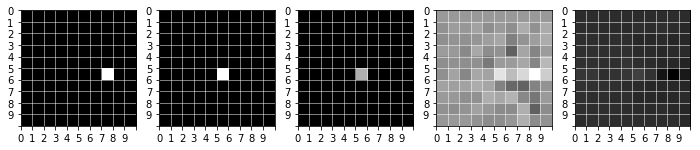

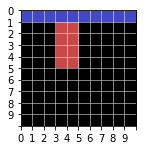

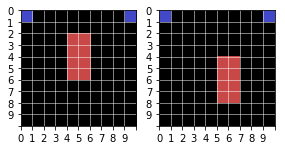

([0.0, 1.0], [0.0, 1.0], 0.27183461)


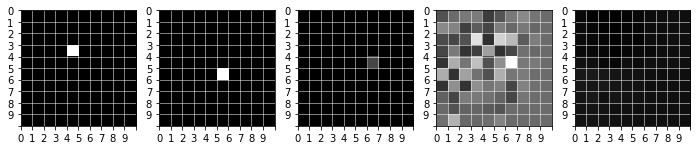

3
2
('loss', 7.9974027)


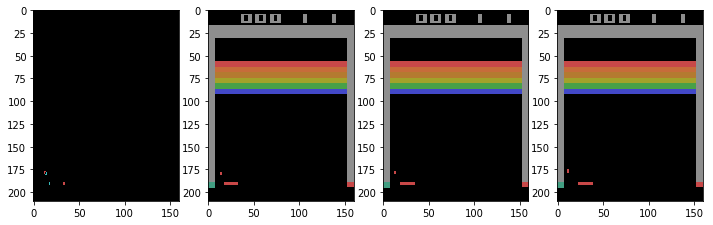

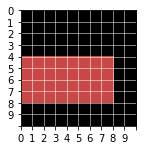

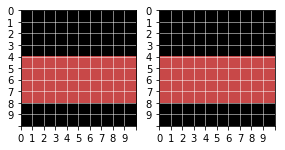

([0.0, 1.0], [0.0, 1.0], 0.72845376)


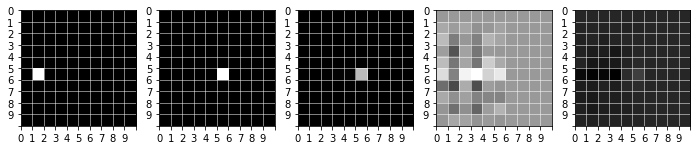

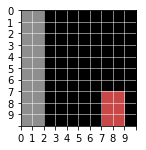

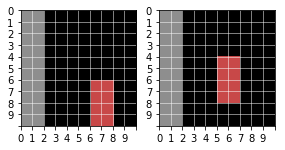

([0.0, 1.0], [0.0, 1.0], 0.0027100993)


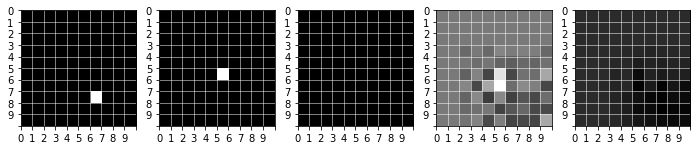

2
2
('loss', 6.5233774)


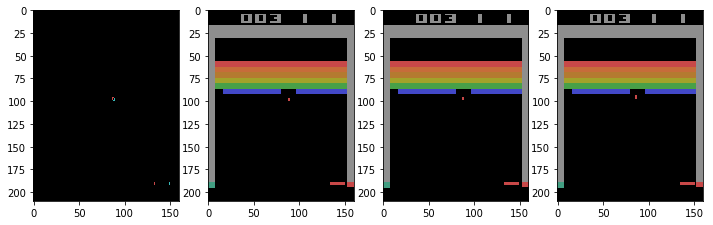

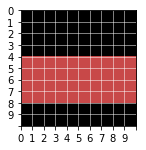

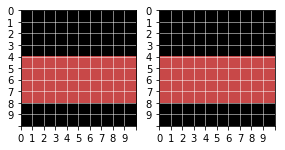

([0.0, 1.0], [0.0, 1.0], 0.45654795)


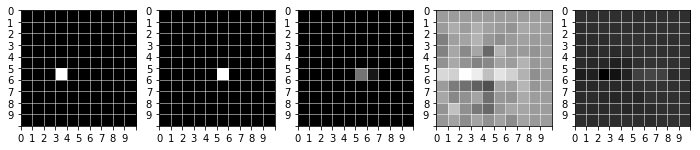

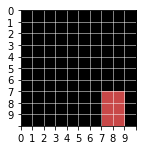

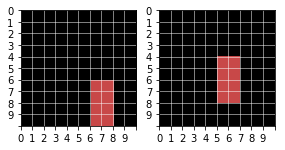

([0.0, 1.0], [0.0, 1.0], 0.003283632)


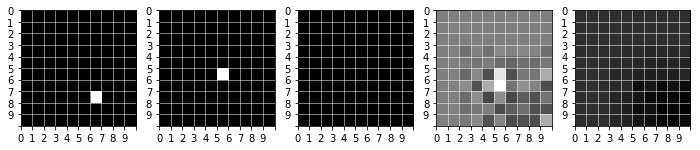

3
0
('loss', 6.4483366)


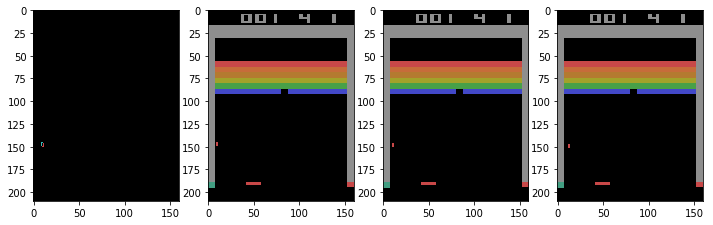

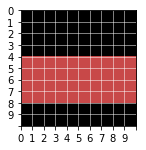

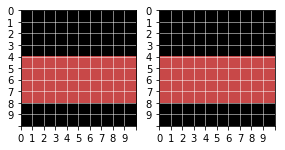

([0.0, 1.0], [0.0, 1.0], 0.84288055)


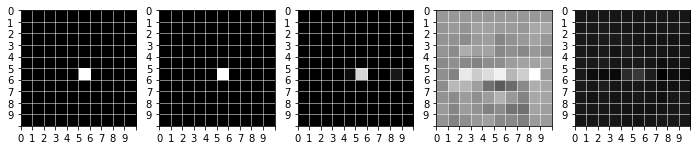

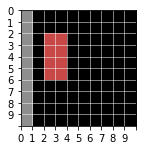

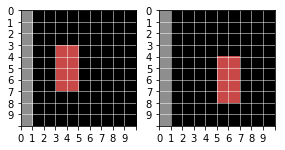

([0.0, 1.0], [0.0, 1.0], 0.99972355)


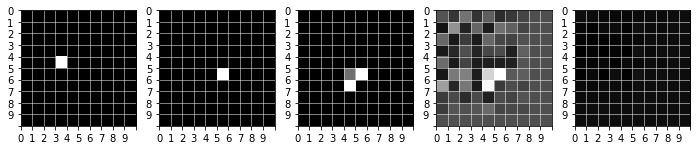

3
2
('loss', 6.3396649)


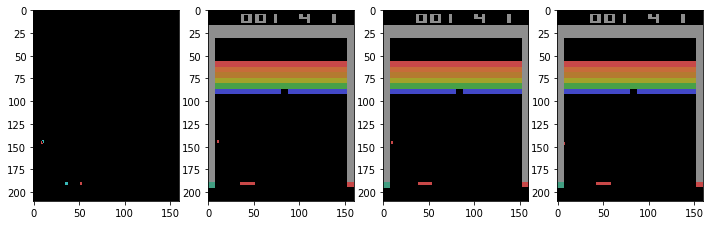

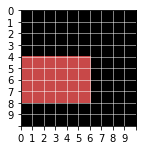

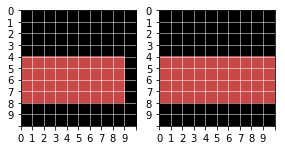

([0.0, 1.0], [0.0, 1.0], 0.76356673)


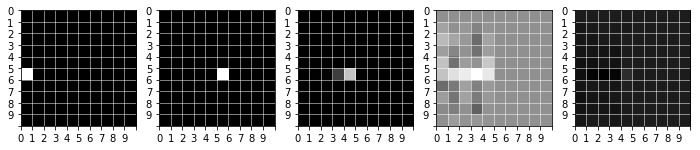

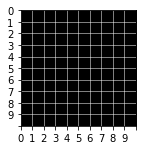

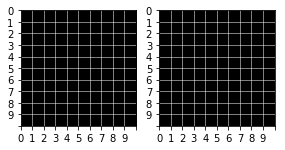

([0.0], [0.0], 1.7025712e-08)


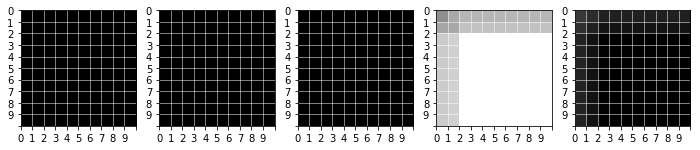

2
1
('loss', 5.9378967)


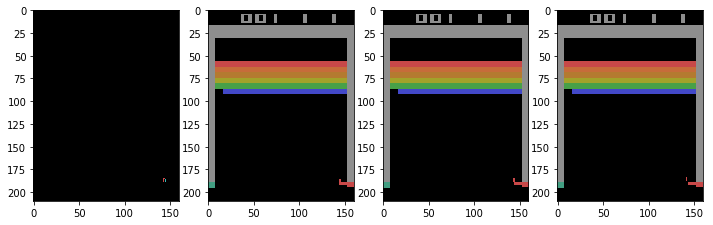

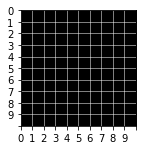

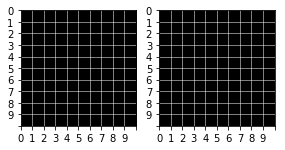

([0.0], [0.0], 7.8553688e-07)


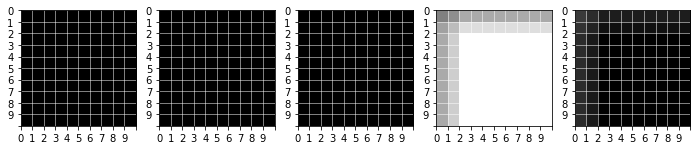

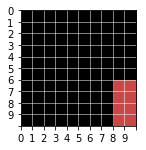

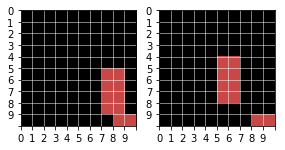

([0.0], [0.0, 1.0], 0.0026401784)


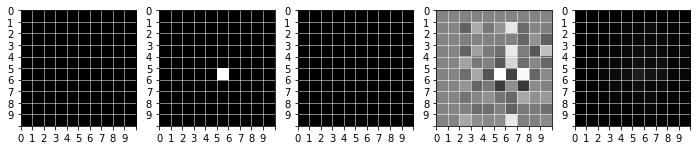

1
0
('loss', 5.7721825)


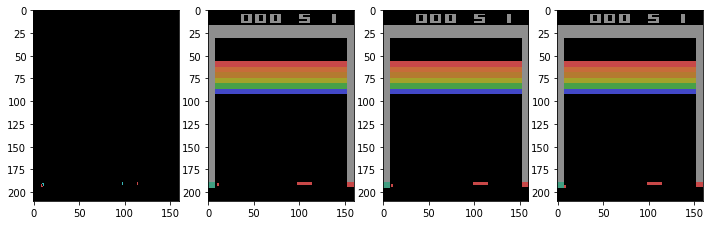

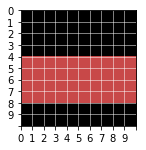

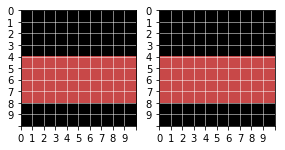

([0.0, 1.0], [0.0, 1.0], 0.92192638)


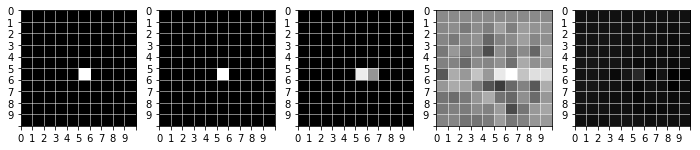

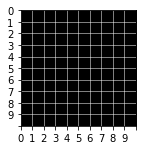

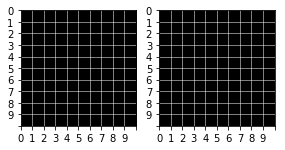

([0.0], [0.0], 2.3988466e-07)


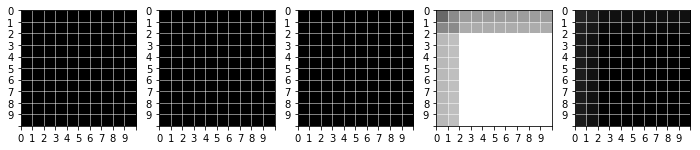

3
2
('loss', 4.6482162)


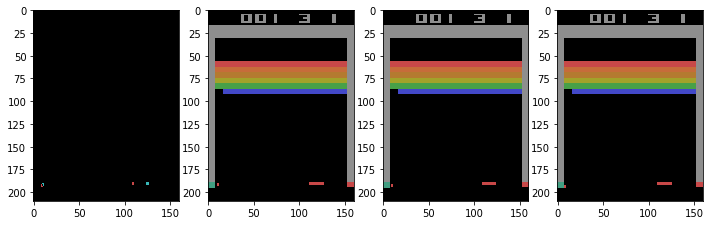

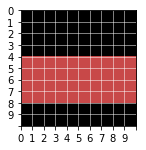

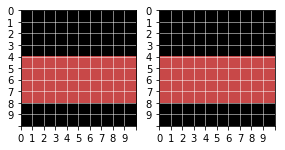

([0.0, 1.0], [0.0, 1.0], 0.99857545)


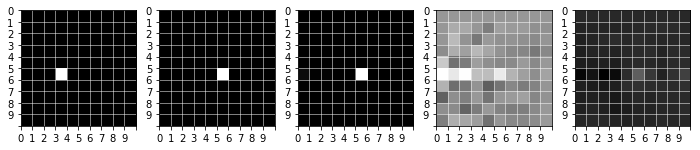

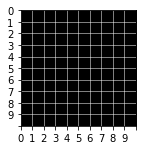

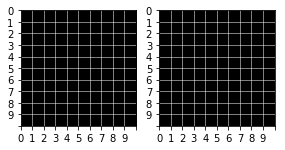

([0.0], [0.0], 1.7025712e-08)


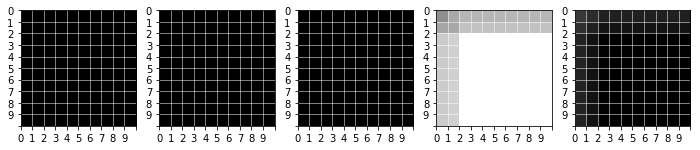

2
0
('loss', 4.6180754)


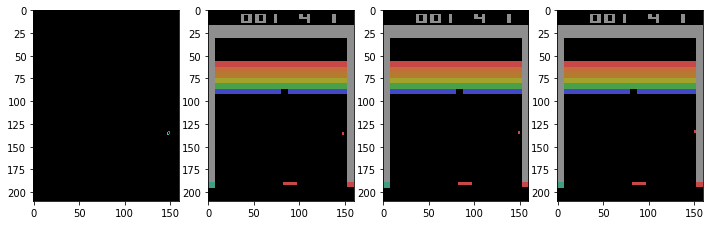

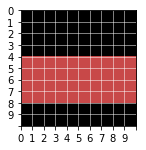

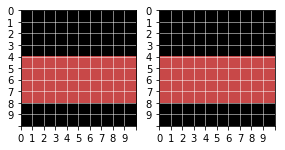

([0.0, 1.0], [0.0, 1.0], 0.99999946)


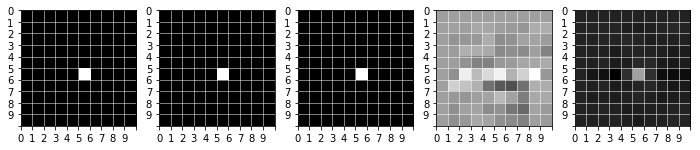

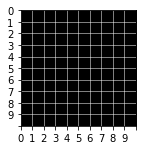

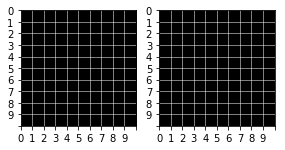

([0.0], [0.0], 1.4531336e-08)


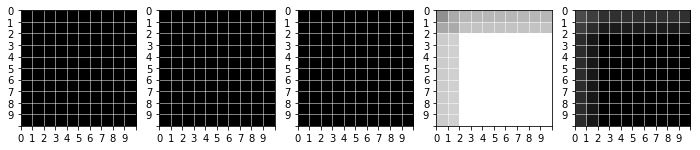

In [60]:
for ind in range(10):
    print(actions[sort_inds[ind]])
    print(old_actions[sort_inds[ind]])
    print('loss', loss_batch_mean[sort_inds[ind]])
#     print(sort_inds1[ind])
#     if sort_inds1[ind] < len(equiv_ch):
#         print equiv_ch[sort_inds1[ind]]

    plt.figure(figsize=(12,4))
    s0 = np.reshape(displayBatch[sort_inds[ind],0],(frame_h,160,3*n_frames))
    s0 = s0[:,:,-6:]
    plt.subplot(141)
    plt.imshow(s0[:,:,3:] - s0[:,:,:3])
    plt.subplot(142)
    plt.imshow(s0[:,:,:3])
    plt.subplot(143)
    plt.imshow(s0[:,:,3:])
    s1 = np.reshape(displayBatch[sort_inds[ind],3],(frame_h,160,3*n_frames))
    s1 = s1[:,:,-6:]
    plt.subplot(144)
    plt.imshow(s1[:,:,3:])
    
    for ii in range(2):
        
#         dcl_ii = dcl[ii][sort_inds[ind],:,:,:]
#         for dcl_ind in range(dcl_ii.shape[-1]):
#             print (disps_full[ii][dcl_ind], np.max(dcl_ii[:,:,dcl_ind]))
        
        target_img = (target_pool[sort_inds[ind],:,:,ii])
        pred_img = pred_pool[sort_inds[ind],:,:,ii]
        previous_img = (previous_pool[sort_inds[ind],:,:,ii])

        predV_img = pred_V[sort_inds[ind],:,:,ii]
        predA_img = pred_A[sort_inds[ind],:,:,ii]

        vis_center = np.unravel_index(np.argmax(target_img), target_img.shape)
        vis_center = (max(vis_center[0],5), max(vis_center[1],5))
        target_img = target_img[vis_center[0]-5:vis_center[0]+5,
                               vis_center[1]-5:vis_center[1]+5]
        pred_img = pred_img[vis_center[0]-5:vis_center[0]+5,
                               vis_center[1]-5:vis_center[1]+5]
        previous_img = previous_img[vis_center[0]-5:vis_center[0]+5,
                               vis_center[1]-5:vis_center[1]+5]
        predV_img = predV_img[vis_center[0]-5:vis_center[0]+5,
           vis_center[1]-5:vis_center[1]+5]
        predA_img = predA_img[vis_center[0]-5:vis_center[0]+5,
                               vis_center[1]-5:vis_center[1]+5]

        #cmap_max = max(np.max(previous_img), np.max(target_img))
        #cmap_min = min(np.min(previous_img), np.min(target_img))
        cmap_max = 1; cmap_min = 0
        cmap_max_VA = max(np.max(predV_img), np.max(predA_img)) 
        cmap_min_VA = min(np.min(predV_img), np.min(predA_img))
        
        
        plt.figure(figsize=(12,2*2))
        plt.subplot(151)
        plt.imshow(s0[vis_center[0]-5:vis_center[0]+5, 
                      vis_center[1]-5:vis_center[1]+5,:3],
                  interpolation='nearest')
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)

        plt.figure(figsize=(12,2*2))
        plt.subplot(151)
        plt.imshow(s0[vis_center[0]-5:vis_center[0]+5, 
                      vis_center[1]-5:vis_center[1]+5,3:],
                  interpolation='nearest')
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
        plt.subplot(152)
        plt.imshow(s1[vis_center[0]-5:vis_center[0]+5, 
                      vis_center[1]-5:vis_center[1]+5,3:],
                  interpolation='nearest') 
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
        plt.show()
        
        plt.figure(figsize=(12,2*2))
        plt.subplot(151)
        plt.imshow(previous_img,cmap='gray',interpolation='nearest',vmin=cmap_min,
                  vmax=cmap_max)
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)
        plt.subplot(152)
        plt.imshow(target_img,cmap='gray',interpolation='nearest',vmin=cmap_min,
                  vmax=cmap_max)
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)

        plt.subplot(153)
        plt.imshow(softmax20(pred_img),cmap='gray',interpolation='nearest',vmin=0,
                  vmax=1)
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)

        print(list(np.unique(previous_img)), list(np.unique(target_img)), 
              np.max(softmax20(pred_img)))

        plt.subplot(154)
        plt.imshow(predV_img,cmap='gray',interpolation='nearest',vmin=cmap_min_VA,
                  vmax=cmap_max_VA)
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)

        plt.subplot(155)
        plt.imshow(predA_img,cmap='gray',interpolation='nearest',vmin=cmap_min_VA,
                  vmax=cmap_max_VA)
        plt.xticks(np.linspace(-0.5,9.5,11),range(10))
        plt.yticks(np.linspace(-0.5,9.5,11),range(10))
        plt.grid(color='w',lw=1,ls='-',alpha=0.5)

        plt.show()
        
        
        
#     collision_img = collisions[sort_inds[ind],:,:,0]

#     collision_img = collision_img[vis_center[0]-5:vis_center[0]+5,
#        vis_center[1]-5:vis_center[1]+5]
#     plt.figure(figsize=(12,2*2))
#     plt.subplot(151)
#     plt.imshow(collision_img,cmap='gray',interpolation='nearest')
#     plt.show()
#     print(np.min(collision_img),np.max(collision_img))

In [1234]:
fp = FramePair(s0[:,:,:3],s0[:,:,3:],actions[sort_inds[ind]],displayBatch[sort_inds[1],1])
pt.mt.process_frame_pair(fp)

piaget.py:505: RuntimeWarning: Degrees of freedom <= 0 for slice
  var_crop = ((f1_crop + gt_crop).flatten()**2).var()


In [1235]:
fp1 = FramePair(s1[:,:,:3],s1[:,:,3:],0,0)
pt.mt.process_frame_pair(fp1)

In [1244]:
traj = pt.mt.movers[3].trajectory
disp_boxes = [(t1[1]-t0[1])/(t1[0]-t0[0])
                          for t1, t0 in zip(traj[1:],traj[:-1])]
disp_pts = [(b.ll + b.ur)/2 for b in disp_boxes]

In [1245]:
disp_pts

[(-2.0, 1.0)]

In [2733]:
meansT = []
meansF = []
for _ in range(1000):
    batch = myBuffer.sample(1,attention=False)
    meansF.append(np.mean(batch[:,6]))

    batch2, _ = myBuffer.sample(1, attention=True,rate=100)
    meansT.append(np.mean(batch2[:,6]))
print np.mean(meansF)
print np.mean(meansT)

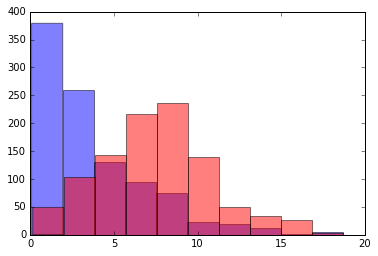

In [2617]:
plt.hist(meansF,alpha=0.5);
plt.hist(meansT,alpha=0.5,color='r');

In [2618]:
meansFp = pd.Series(meansF)
meansTp = pd.Series(meansT)

print meansFp.describe()
print meansTp.describe()

print len(np.unique(meansF))
print len(np.unique(meansT))

count    1000.000000
mean        3.649242
std         3.334161
min         0.080408
25%         0.973740
50%         2.772045
75%         5.474707
max        18.694601
dtype: float64
count    1000.000000
mean        7.488884
std         3.392913
min         0.151871
25%         5.227248
50%         7.547748
75%         9.634660
max        18.694601
dtype: float64
639
440


In [2835]:
testBatch = myBuffer.sample(1000)
frames = testBatch[:,0]
cm = sess.run(mainQN.conv_movers_frame1,\
                 feed_dict={mainQN.scalarInput:np.vstack(frames)})
max_convs = [np.max(cm[:,...,m_id]) for m_id in range(mainQN.n_movers)]
unique_convs = [np.unique(cm[:,...,m_id]) for m_id in range(mainQN.n_movers)]

In [2838]:
unique_convs_tol = []
for m_uc in unique_convs:
    tol_uc = [m_uc[0]]
    for uc in m_uc[1:]:
        if min([abs(t-uc) for t in tol_uc]) > 1e-3:
            tol_uc.append(uc)
    unique_convs_tol.append(tol_uc)

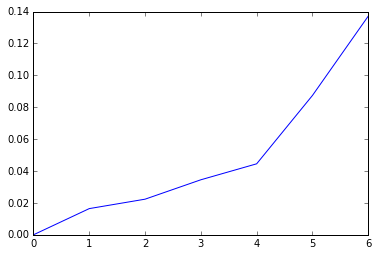

In [2840]:
plt.plot(unique_convs_tol[1])

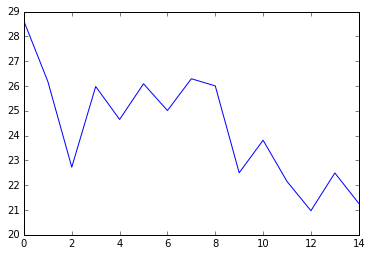

In [635]:
plt.plot(QsqAvgs[1:])

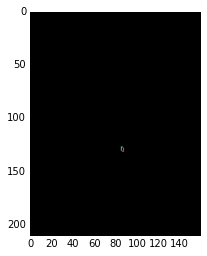

In [636]:
trainBatch = myBuffer.sample(1)

plt.imshow(np.reshape(trainBatch[0][0],(210,160,6))[:,:,3:] -
           np.reshape(trainBatch[0][0],(210,160,6))[:,:,:3])

In [637]:
l1 = sess.run(mainQN.conv_movers,feed_dict={mainQN.scalarInput: [trainBatch[0][0]]})[0]
l2 = sess.run(mainQN.conv_disps,feed_dict={mainQN.scalarInput: [trainBatch[0][0]]})[0]
l_equiv = sess.run(mainQN.cdp_equiv,feed_dict={mainQN.scalarInput: [trainBatch[0][0]]})[0]

AttributeError: protoModelnetwork instance has no attribute 'cdp_equiv'

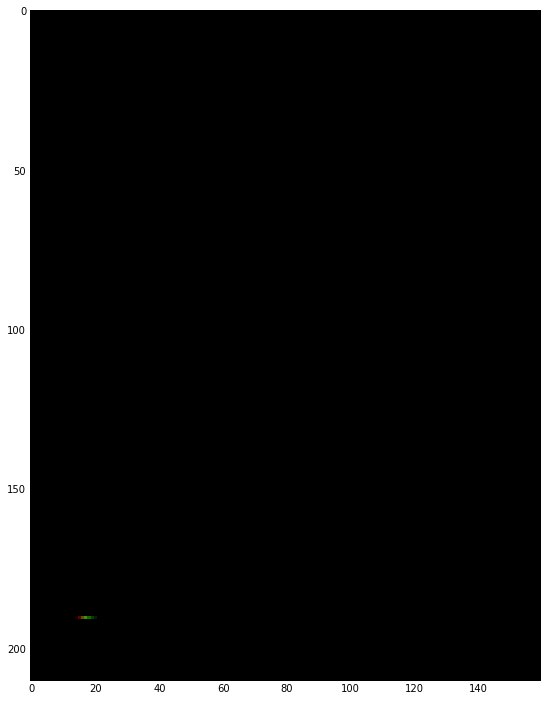

In [958]:
plt.figure(figsize=(12,12))
l1_img = 2*np.stack([l1[:,:,1],l1[:,:,0],np.zeros_like(l1[:,:,0])],2)
plt.imshow(l1_img,interpolation='nearest')

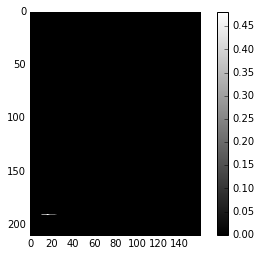

In [960]:
plt.imshow(l_equiv[:,:,0],cmap='gray',interpolation='nearest')
plt.colorbar()

In [955]:
mover_disps[0]

[(-5, 0),
 (9, 0),
 (7, 0),
 (-2, 0),
 (-11, 0),
 (12, 0),
 (-6, 0),
 (6, 0),
 (-12, 0),
 (11, 0),
 (2, 0),
 (-7, 0),
 (-9, 0),
 (5, 0),
 (1, 0),
 (-1, 0)]

In [880]:
#init = tf.global_variables_initializer()
#sess.run(init)
act_frames = sess.run(mainQN.act_frames,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]), mainQN.actions:trainBatch[:,1]})
mainQN.get_Q(act_frames)

AttributeError: protoModelnetwork instance has no attribute 'act_frames'

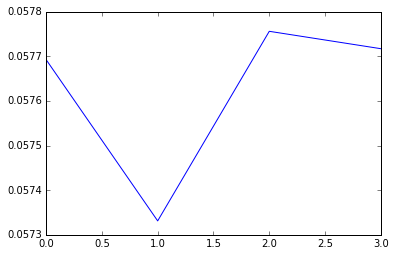

In [158]:
plt.plot(mainQN.Qout[0]);

[2017-06-08 21:30:31,131] Making new env: BreakoutNoFrameskip-v4


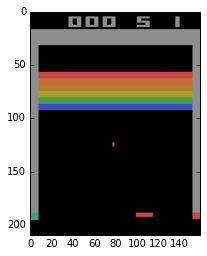

action: 0
0
0


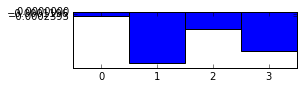

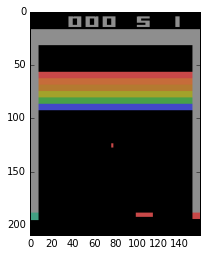

action: 0
0
0


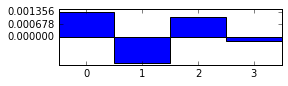

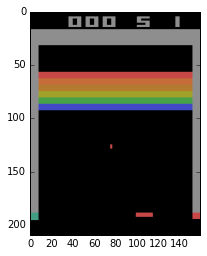

action: 0
0
0


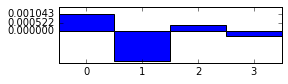

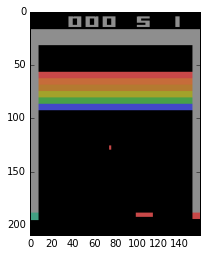

action: 0
0
0


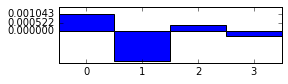

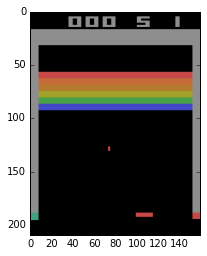

action: 0
0
0


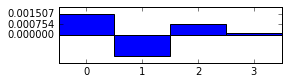

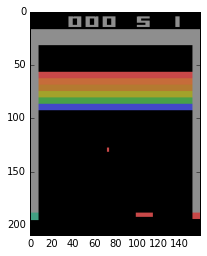

action: 0
0
0


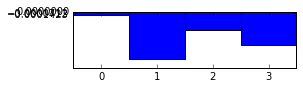

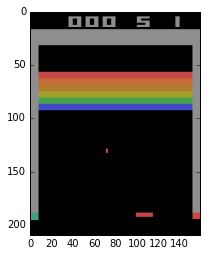

action: 0
0
0


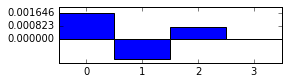

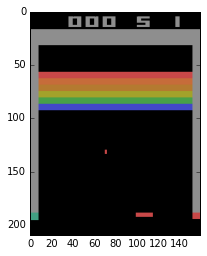

action: 0
0
0


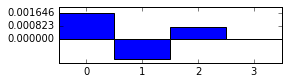

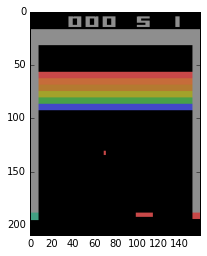

action: 0
0
0


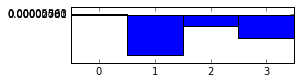

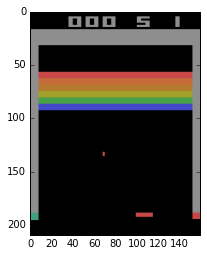

action: 0
0
0


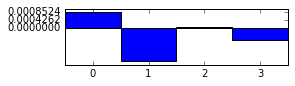

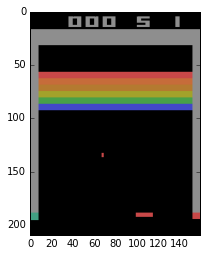

action: 0
0
0


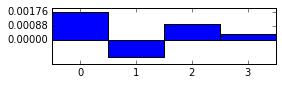

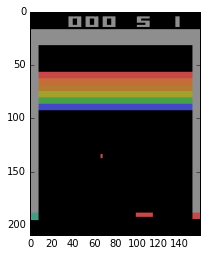

action: 0
0
0


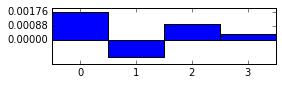

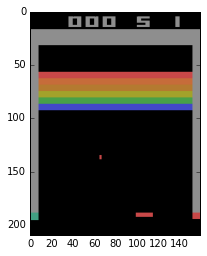

action: 0
0
0


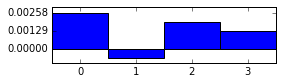

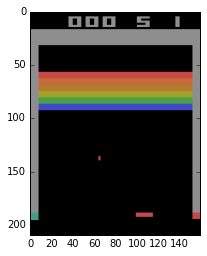

action: 0
0
0


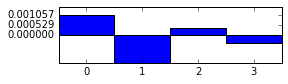

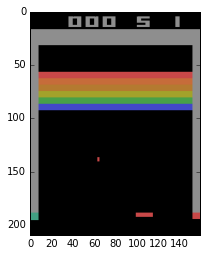

action: 0
0
0


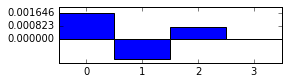

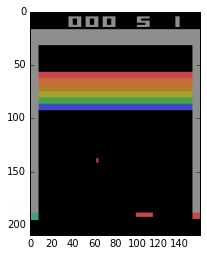

action: 0
0
0


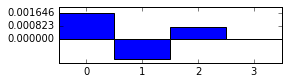

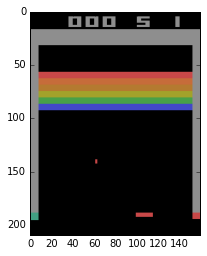

action: 0
0
0


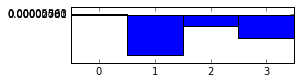

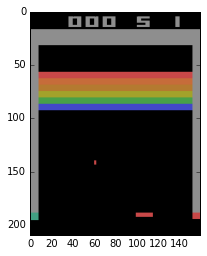

action: 0
0
0


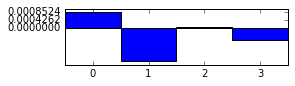

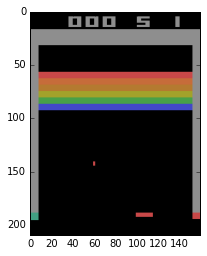

action: 0
0
0


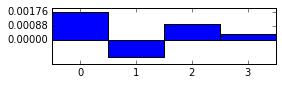

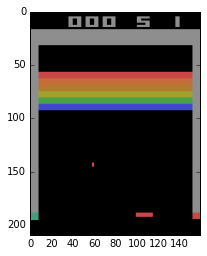

action: 0
0
0


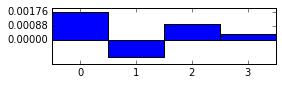

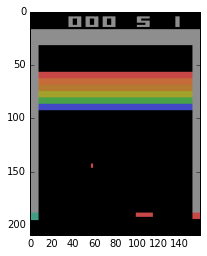

action: 0
0
0


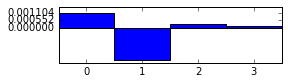

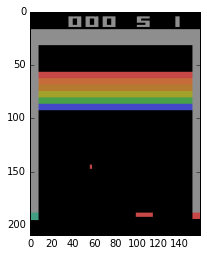

action: 0
0
0


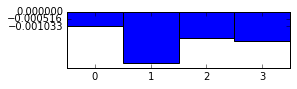

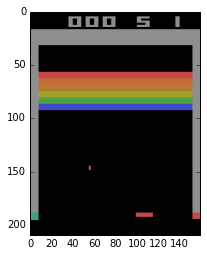

action: 0
0
0


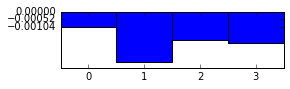

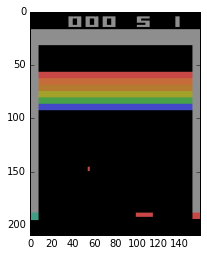

action: 0
0
0


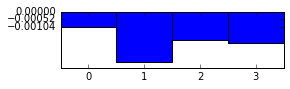

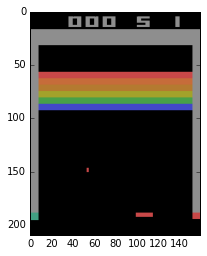

action: 0
0
0


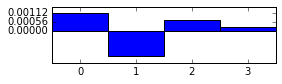

q


In [1546]:
env = gym.make(env_title)
s_list, r, d, info = initial_obs(env, breakout)
s_stack = np.dstack(s_list)
s = processState(s_stack)


d = False
rAll = 0
j = 0

e = 0

while j < max_epLength:
    j+=1

    plt.figure()
    plt.imshow(s_stack[:,:,3:])
    plt.show()

    #Choose an action by greedily (with e chance of random action) from the Q-network
    if np.random.rand(1) < e or total_steps < pre_train_steps:
        a = np.random.randint(0,env.action_space.n)
        print 'random action: ' + str(a)
    else:
#         act_frames = sess.run(mainQN.act_frames,feed_dict={mainQN.scalarInput:[s]})
#         mainQN.get_Q(act_frames)
#         Qout = mainQN.Qout[0]
#         a = mainQN.predict[0]
        a = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:[s]})[0]
        print 'action: ' + str(a)
    if np.array_equal(s_list[0],s_list[1]):
        a = 1
    
    Qout = sess.run(mainQN.Qout,feed_dict={mainQN.scalarInput:[s]})[0]
    Qout_target = sess.run(targetQN.Qout,feed_dict={targetQN.scalarInput:[s]})[0]
    print(np.sum([sess.run(mainQN.streamV,feed_dict={mainQN.scalarInput:[s]})>0]))
    print(np.sum([sess.run(mainQN.streamA,feed_dict={mainQN.scalarInput:[s]})>0]))
    if j % 1 == 0:#np.var(Qout) > 0:
        plt.figure(figsize=(4,1))
        plt.bar(np.arange(4)-0.5,Qout,width=1)
        plt.xticks(range(4));
        plt.yticks(np.linspace(0,max(Qout),3));
        plt.show()
        if j%1 == 0:
            if raw_input() == 'q':
                break

    
    s_next,r,d,info = env.step(a)
    
    
    s_list.pop(0)
    s_list.append(s_next)

    s_stack = np.dstack(s_list)
    s1 = processState(s_stack)

    rAll += r
    s = s1

    if d == True:
        break

In [910]:

sess.run(mainQN.streamA,\
         feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]), mainQN.actions:displayBatch[:,1]})

array([[ 0.        ,  0.        ,  0.        ,  0.00067102,  0.04917433,
         0.        ,  0.        ,  0.        ,  0.02195593,  0.        ,
         0.0250507 ,  0.00795321,  0.02916563,  0.01147852,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09755917,
         0.        ,  0.        ,  0.        ,  0.02563024,  0.        ,
         0.        ,  0.03858812,  0.00206866,  0.        ,  0.03718561,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.04855313,  0.03562154,
         0.00140339,  0.        ,  0.        ,  0.01872141,  0.        ,
         0.03155626,  0.        ,  0.        ,  0.05205956,  0.        ,
         0.        ],
       [ 0.01677665,  0.02403419,  0.        ,  0.        ,  0.03196315,
         0.        ,  0.        ,  0.        ,  0.04861519,  0.        ,
         0.        ,  0.03577914,  0.        ,  0.04531803,  0.        ,
         0.02614394],
       [ 0.        ,  0.        ,  0

In [ ]:
testBatch = myBuffer.sample(500)
reward_preds = sess.run(mainQN.pred_reward, feed_dict={mainQN.scalarInput:np.vstack(testBatch[:,0]),
                               mainQN.actions:testBatch[:,1],
                               mainQN.target_reward:testBatch[:,2]})

(array([ 8.33333333,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 0.  ,  0.12,  0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,
         1.08,  1.2 ]),
 <a list of 10 Patch objects>)

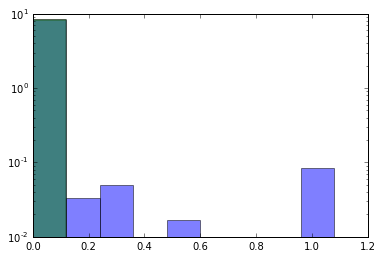

In [304]:
plt.hist(testBatch[:,2],normed=True,log=True,range=(0,1.2),alpha=0.5)
plt.hist(reward_preds,normed=True,log=True,range=(0,1.2),alpha=0.5)

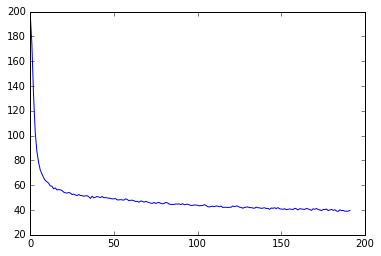

In [299]:
avg_window = 100

sqMat = np.resize(np.array(frame_err_list),[len(frame_err_list)//avg_window,avg_window])
QsqAvgs = np.average(sqMat,1)
plt.plot(QsqAvgs)

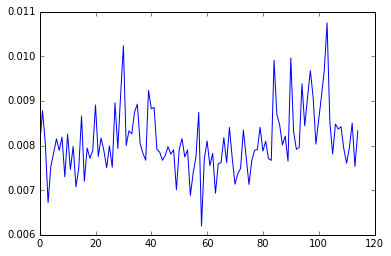

In [272]:
avg_window = 1000

sqMat = np.resize(np.array(reward_err_list),[len(reward_err_list)//avg_window,avg_window])
QsqAvgs = np.average(sqMat,1)
plt.plot(QsqAvgs)

In [2796]:
sort_inds0, sort_inds1 = np.unravel_index(np.argsort(errs,None),errs.shape)
sort_inds0 = sort_inds0[::-1]
sort_inds1 = sort_inds1[::-1]

all_disps = reduce(lambda a,b: list(a)+list(b), mover_disps)

NameError: name 'errs' is not defined

In [22]:
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars//2]):
        op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars//2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)

In [19]:
tf.reset_default_graph()

mainQN = protoQnetwork(env, h_size, mover_prototypes, \
                       mover_disps, md_equiv_classes,
                       1, 'mainQN', True,
                      lr=0.01, eps=1e-4)
targetQN = protoQnetwork(env, h_size, mover_prototypes, \
                       mover_disps, md_equiv_classes,
                         1, 'targetQN', True)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

trainables = tf.trainable_variables()

#targetOps = updateTargetGraph(trainables,tau)
targetOps = updateTargetGraph(trainables,1)

myBuffer = experience_buffer()

#Set the rate of random action decrease. 
e = startE
stepDrop = (startE - endE)/anneling_steps

#create lists to contain total rewards and steps per episode
jList = []
rList = []
total_steps = 0
n_resets = 0

#statistics on Q
Qpred_list = []
Qtarget_list = []
QrList = []

#Make a path for our model to be saved in.
if not os.path.exists(path):
    os.makedirs(path)

sess = tf.Session()
#with tf.Session() as sess:
sess.run(init)
if load_model == True:
    print('Loading Model...')
    ckpt = tf.train.get_checkpoint_state(path)
    saver.restore(sess,ckpt.model_checkpoint_path)

updateTarget(targetOps,sess) #Set the target network to be equal to the primary network.
for i in range(num_episodes):
    episodeBuffer = experience_buffer()
    #Reset environment and get first new observation(s)
    s_list, r, d, info = initial_obs(env, breakout)

    s_stack = np.dstack(s_list)
    s = processState(s_stack)

    d = False
    rAll = 0
    j = 0
    # periodically evaluate
    if i % 5 == 0 and total_steps  > pre_train_steps:
        eval_episode = True
        saved_e = e
        e = 0.1
    else:
        eval_episode = False
    #The Q-Network
    while j < max_epLength: #If the agent takes longer than 200 moves to reach either of the blocks, end the trial.
        j+=1
        
        #plt.imshow(env.render('rgb_array'))
        #plt.show()
        
        #Choose an action by greedily (with e chance of random action) from the Q-network
        if np.random.rand(1) < e or total_steps < pre_train_steps:
            a = np.random.randint(0,env.action_space.n)
        else:
            a = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:[s]})[0]
        
        if breakout and np.array_equal(s_list[0],s_list[1]):
            # breakout: requesting next ball
            a = 1
        
        s_next,r,d,info = env.step(a)
        #s_next = cv2.cvtColor(s_next, cv2.COLOR_BGR2GRAY)

        s_list.pop(0)
        s_list.append(s_next)

        s_stack = np.dstack(s_list)
        s1 = processState(s_stack)

        total_steps += 1
        if (r > 0) or d:
            buffer_repeat = 1
        else:
            buffer_repeat = 1
        for dummy in range(buffer_repeat):
            episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5]),reward_prop) #Save the experience to our episode buffer.

        if total_steps > pre_train_steps and not eval_episode:
            if e > endE:
                e -= stepDrop

            if total_steps % (update_freq) == 0:
                trainBatch = myBuffer.sample(batch_size) #Get a random batch of experiences.
                #Below we perform the Double-DQN update to the target Q-values
                Q1 = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,3])})
                Q2 = sess.run(targetQN.Qout,feed_dict={targetQN.scalarInput:np.vstack(trainBatch[:,3])})
                end_multiplier = -(trainBatch[:,4] - 1)
                doubleQ = Q2[range(batch_size),Q1]
                targetQ = trainBatch[:,2] + (y*doubleQ * end_multiplier)
                Qtarget_list.extend(targetQ)
                predQ = sess.run(mainQN.Q, \
                    feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]), mainQN.actions:trainBatch[:,1]})
                Qpred_list.extend(predQ)
                QrList.extend(trainBatch[:,2])
                #Update the network with our target values.
                _ = sess.run(mainQN.updateModel, \
                    feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]),mainQN.targetQ:targetQ, mainQN.actions:trainBatch[:,1]})
                if (total_steps//update_freq) % reset_freq == 0:
                    n_resets += 1
                    updateTarget(targetOps,sess) #Set the target network to be equal to the primary network.
#                 print('value')
#                 print(np.sum([sess.run(mainQN.streamV,\
#                  feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:1,0]), mainQN.actions:trainBatch[:1,1]})>0]))
#                 print(np.max(sess.run(mainQN.streamV,\
#                  feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:1,0]), mainQN.actions:trainBatch[:1,1]})))
#                 print('action')
#                 print(np.sum([sess.run(mainQN.streamA,\
#                  feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:1,0]), mainQN.actions:trainBatch[:1,1]})>0]))
#                 print(np.max(sess.run(mainQN.streamA,\
#                  feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:1,0]), mainQN.actions:trainBatch[:1,1]})))

        rAll += r
        s = s1

        if d == True:
            break
    #print(j)
    if not eval_episode:
        myBuffer.add(episodeBuffer.buffer,False)
        jList.append(j)
        rList.append(rAll)
    else:
        print("Evaluated model")
        print(j, rAll)
        e = saved_e
    #Periodically save the model. 
    if i % 100 == 0 and i > 0:
        saver.save(sess,path+'/model-'+str(i)+'.cptk')
        print("Saved Model")
    print_rate = 5
    if len(rList) % print_rate == 0 and total_steps > pre_train_steps:
        displayBatch = myBuffer.sample(1)
        
        print(total_steps,
              np.mean(jList[-print_rate:]),
              np.mean(rList[-print_rate:]), 
              e)
        all_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
        
        test_weights=[v for v in all_vars \
         if v.name == 'Conv/weights:0'][0]\
        .eval(session=sess)
        
        q_weights=[v for v in all_vars \
         if v.name == 'Conv_1/weights:0'][0]\
        .eval(session=sess)

#         q_weights=[v for v in all_vars \
#          if v.name == 'Conv/weights:0'][0]\
#         .eval(session=sess)

        for ch_ind in range(1) + range(h_size//2,h_size//2+3):
            i_max=1
            j_max=8
            plt.figure(figsize=(j_max, i_max))
            for ii in range(i_max):
                for jj in range(j_max):
                    cmap_max = max(np.max(q_weights[:,:,:,ch_ind]),
                                  -np.min(q_weights[:,:,:,ch_ind]))
                    plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.imshow(q_weights[:,:,jj+(ii*j_max),ch_ind],cmap='gray',
                    interpolation='nearest',
                    vmin=-cmap_max,vmax=cmap_max)
            plt.show()
            
        for ch_ind in range(8):

            i_max=1
            j_max=8
            plt.figure(figsize=((4./6)*j_max, (4./8)*i_max))
            for ii in range(i_max):
                for jj in range(j_max):
                    cmap_max = max(np.max(test_weights[:,:,:,ch_ind]),
                                  -np.min(test_weights[:,:,:,ch_ind]))
                    plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.imshow(test_weights[:,:,jj+(ii*j_max),ch_ind],cmap='gray',
                    interpolation='nearest',
                              vmin=-cmap_max,vmax=cmap_max)

            plt.show()
        
        displayBatch = myBuffer.sample(100)
        print((1./100)*np.sum([sess.run(mainQN.streamV,\
            feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]), mainQN.actions:displayBatch[:,1]})>0]))
        print((1./100)*np.sum([sess.run(mainQN.streamA,\
            feed_dict={mainQN.scalarInput:np.vstack(displayBatch[:,0]), mainQN.actions:displayBatch[:,1]})>0]))
        print('n_resets', n_resets)
saver.save(sess,path+'/model-'+str(i)+'.cptk')
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

[<tf.Tensor 'gradients/split_1_grad/concat:0' shape=(?, 1, 1, 32) dtype=float32>, None, None]
[<tf.Tensor 'gradients_1/split_1_grad/concat:0' shape=(?, 1, 1, 32) dtype=float32>, None, None]
[<tf.Tensor 'gradients_2/split_3_grad/concat:0' shape=(?, 1, 1, 32) dtype=float32>, None, None]
[<tf.Tensor 'gradients_3/split_3_grad/concat:0' shape=(?, 1, 1, 32) dtype=float32>, None, None]


NameError: name 'startE' is not defined

In [20]:
m_id_shift = 0
for m_id, m_eq in enumerate(md_equiv_classes):
    for eq in m_eq:
        print [all_disps[m_id_shift + d_id] for d_id in eq]
        print ''
    m_id_shift += len(mover_disps[m_id])

[(-5, 0), (-2, 0), (-3, 0), (-4, 0), (-1, 0)]

[(4, 0), (3, 0), (2, 0), (5, 0), (1, 0)]

[(1, 1)]

[(-1, 1)]

[(-1, -1)]

[(1, -1)]



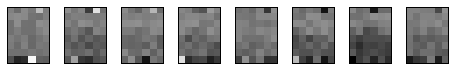

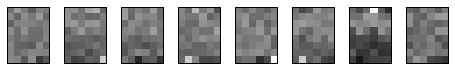

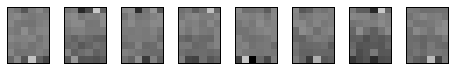

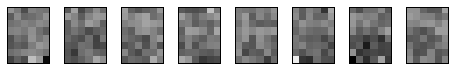

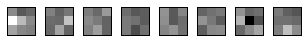

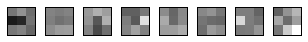

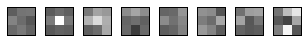

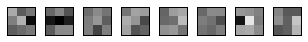

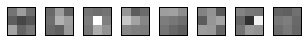

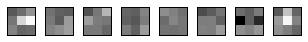

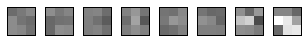

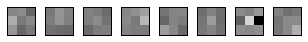

In [1545]:
for ch_ind in range(1) + range(h_size//2,h_size//2+3):
    i_max=1
    j_max=8
    plt.figure(figsize=(j_max, i_max))
    for ii in range(i_max):
        for jj in range(j_max):
            cmap_max = max(np.max(q_weights[:,:,:,ch_ind]),
                          -np.min(q_weights[:,:,:,ch_ind]))
            plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(q_weights[:,:,jj+(ii*j_max),ch_ind],cmap='gray',
            interpolation='nearest',
            vmin=-cmap_max,vmax=cmap_max)
    plt.show()

for ch_ind in range(8):

    i_max=1
    j_max=8
    plt.figure(figsize=((4./6)*j_max, (4./8)*i_max))
    for ii in range(i_max):
        for jj in range(j_max):
            cmap_max = max(np.max(test_weights[:,:,:,ch_ind]),
                          -np.min(test_weights[:,:,:,ch_ind]))
            plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(test_weights[:,:,jj+(ii*j_max),ch_ind],cmap='gray',
            interpolation='nearest',
                      vmin=-cmap_max,vmax=cmap_max)



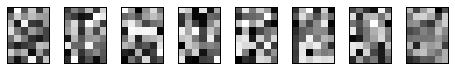

In [1338]:
q_weights=[v for v in all_vars \
 if v.name == 'Conv/weights:0'][0]\
.eval(session=sess)

for ch_ind in range(1):
    i_max=1
    j_max=8
    plt.figure(figsize=(j_max, i_max))
    for ii in range(i_max):
        for jj in range(j_max):
            cmap_max = max(np.max(q_weights[:,:,jj+(ii*j_max),ch_ind]),
                          -np.min(q_weights[:,:,jj+(ii*j_max),ch_ind]))
            plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(q_weights[:,:,jj+(ii*j_max),ch_ind],cmap='gray',
            interpolation='nearest',
            vmin=-cmap_max,vmax=cmap_max)
    plt.show()

In [1219]:
equiv_ch = []
m_id_shift = 0
for m_id, m_eq in enumerate(md_equiv_classes):
    for eq in m_eq:
        equiv_ch.append([all_disps[m_id_shift + d_id] for d_id in eq])
    m_id_shift += len(mover_disps[m_id])

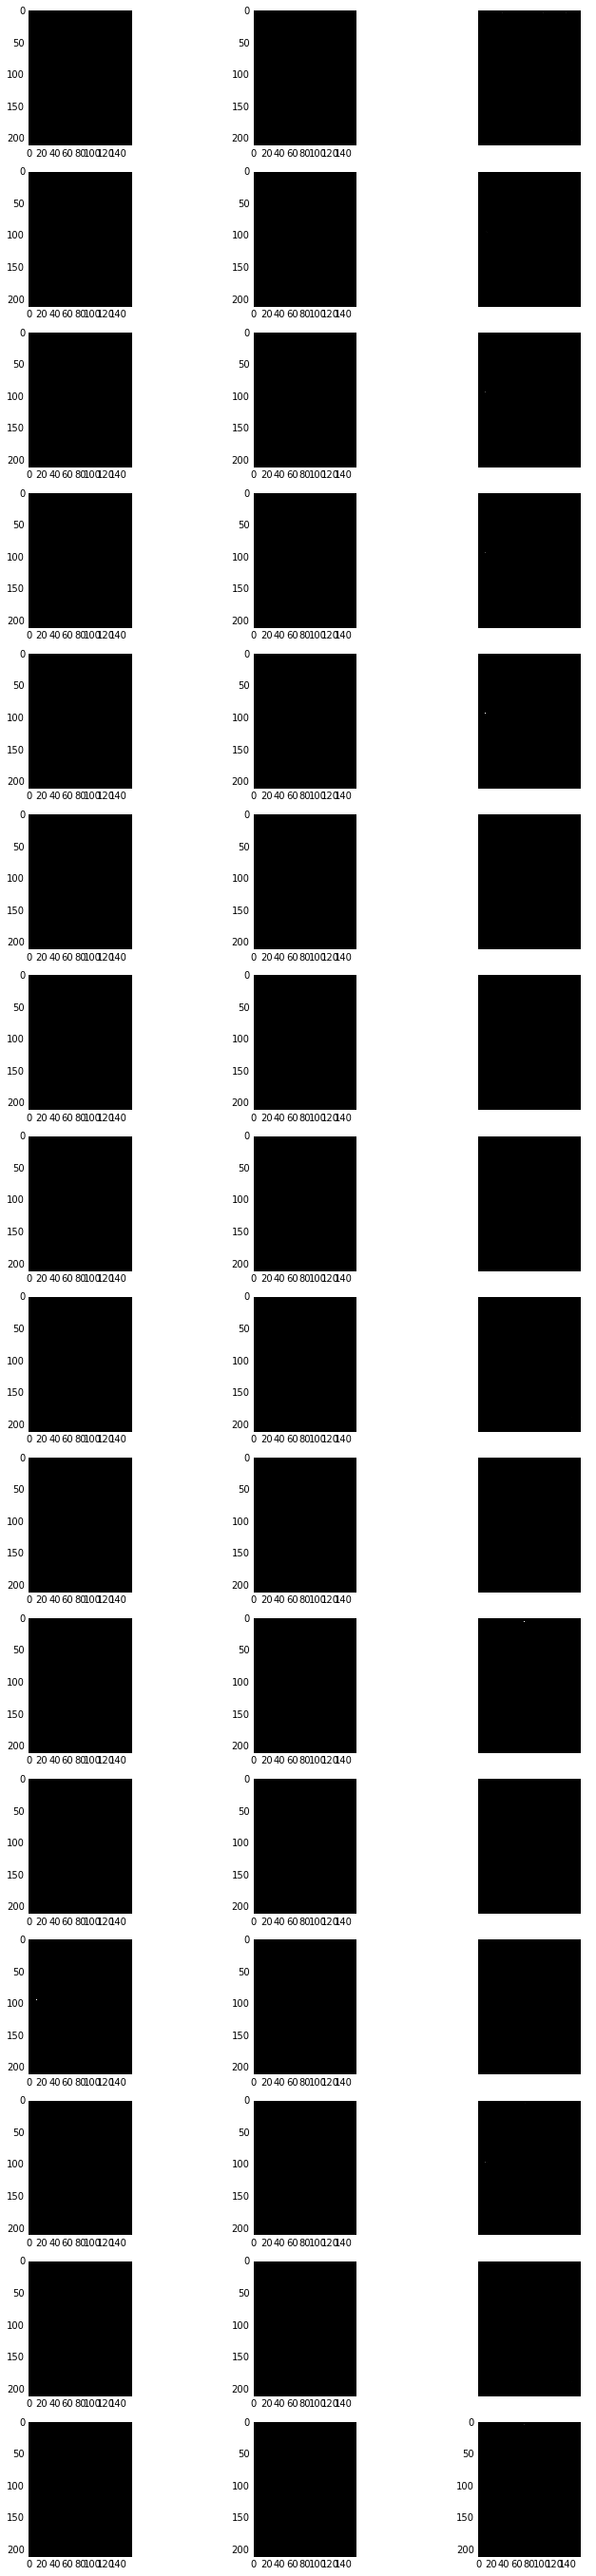

In [1221]:
plt.figure(figsize=(12,48))
i_max = 16
j_max = 3
for ii in range(i_max):
    for jj in range(j_max//3):
        #plt.subplot(i_max,2*j_max,jj+(ii*j_max)+1)
        plt.xticks([])
        plt.yticks([])
        target_img = target_pool[0,:,:,ii]
        pred_img = pred_pool[0,:,:,ii]
        previous_img = previous_pool[0,:,:,ii]
        pred_img = (pred_img + np.abs(pred_img)) / 2
        diff = target_img - pred_img
        tgp = np.abs(target_img)*(target_img>0)*(pred_img<=0)#(np.abs(diff) + diff)/2
        tlp = np.abs(pred_img)*(target_img<=0)*(pred_img>0)#(np.abs(diff) - diff)/2
        agreement = ((1-np.abs(target_img-pred_img))*(target_img>0)*(pred_img>0))#(target_img+pred_img)/2.
#         vis_img = (1.*np.stack([tlp, tgp, agreement],2))
#         plt.imshow(vis_img,interpolation='nearest')
        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+1)
        vis_img = np.stack(
             [np.zeros_like(previous_img), np.zeros_like(previous_img), previous_img],2)
        plt.imshow(previous_img,cmap='gray',interpolation='nearest')
        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+2)
        vis_img = np.stack(
             [np.zeros_like(target_img), target_img, np.zeros_like(target_img)],2)
        plt.imshow(target_img,cmap='gray',interpolation='nearest')
        plt.subplot(i_max,j_max,3*jj+(ii*j_max)+3)
        vis_img = np.stack(
             [pred_img, np.zeros_like(pred_img), np.zeros_like(pred_img)],2)
        plt.imshow(pred_img,cmap='gray',interpolation='nearest')
plt.show()


In [445]:
reward_frames = [f[3] for f in myBuffer.buffer if f[2]>0.5]
reward_pools = sess.run(mainQN.conv_dm_pool,feed_dict={mainQN.scalarInput:reward_frames})

mean_reward_pool = np.mean(reward_pools,axis=0)

non_reward_frames = [f[3] for f in myBuffer.buffer if f[2]<0.6][115:125]
non_reward_pools = sess.run(mainQN.conv_dm_pool,feed_dict={mainQN.scalarInput:non_reward_frames})

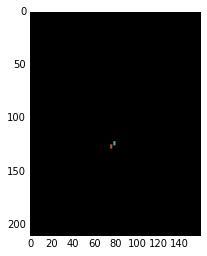

(-5, 0)


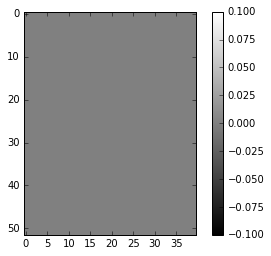

(9, 0)


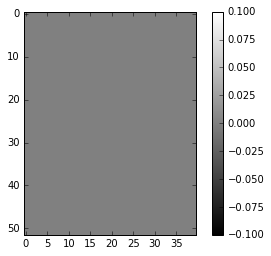

(0, 0)


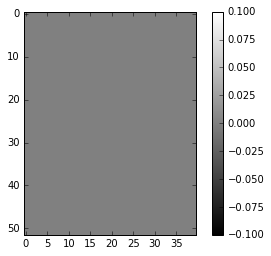

(7, 0)


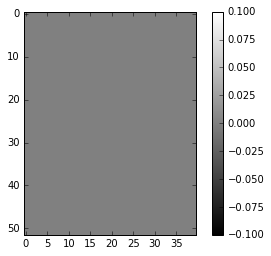

(-2, 0)


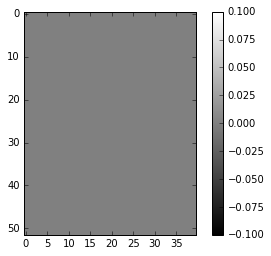

(-11, 0)


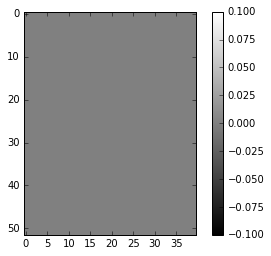

(12, 0)


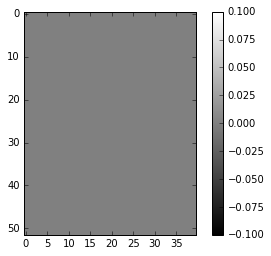

(-6, 0)


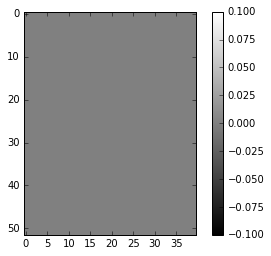

(1, 0)


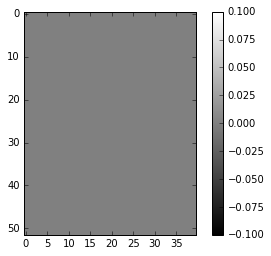

(-3, 3)


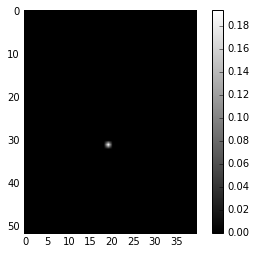

(-4, 4)


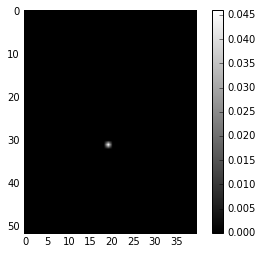

(2, 2)


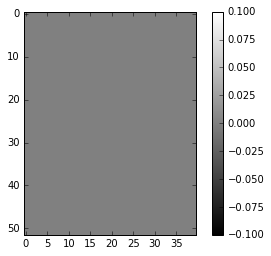

In [453]:
f = non_reward_frames[1]
plt.imshow(np.reshape(f,(210,160,6))[:,:,3:]-np.reshape(f,(210,160,6))[:,:,:3])
plt.show()
for ch_ind in range(12):
    print all_disps[ch_ind]
    plt.imshow(non_reward_pools[1][:,:,ch_ind],cmap='gray')
    plt.colorbar()
    plt.show()

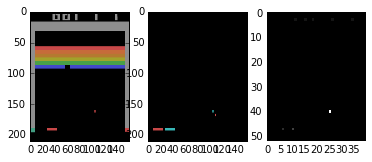

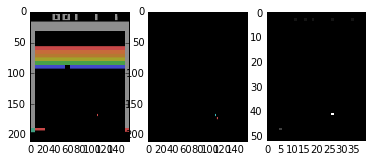

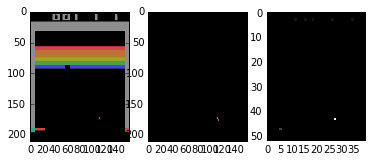

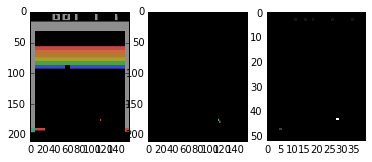

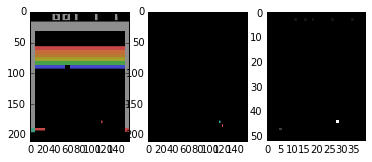

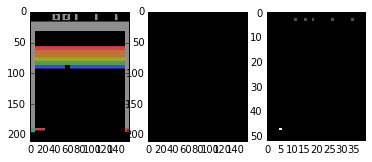

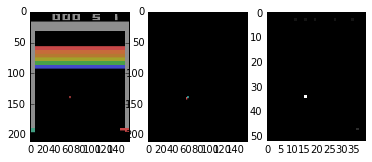

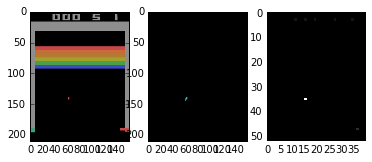

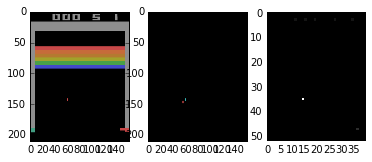

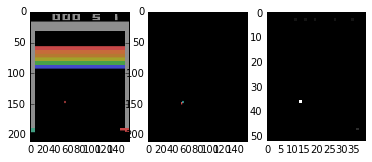

In [433]:
for f, pool in zip(non_reward_frames, non_reward_pools):
    plt.subplot(131)
    plt.imshow(np.reshape(f,(210,160,6))[:,:,:3])
    plt.subplot(132)
    plt.imshow(np.reshape(f,(210,160,6))[:,:,3:]-np.reshape(f,(210,160,6))[:,:,:3])
    plt.subplot(133)
    plt.imshow(pool[:,:,-2],cmap='gray', interpolation='nearest')
    plt.show()

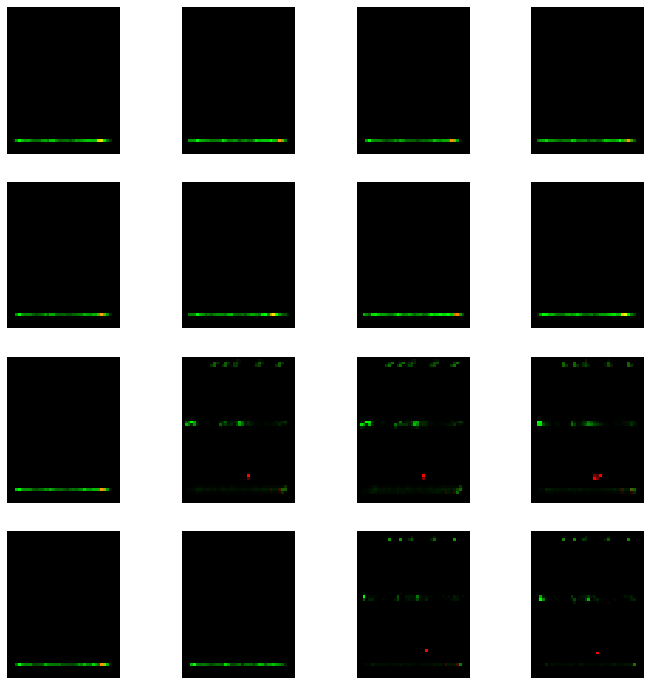

In [1158]:
plt.figure(figsize=(12,12))
i_max = 4
j_max = 4
for ii in range(i_max):
    for jj in range(j_max):
        plt.subplot(i_max,j_max,jj+(ii*j_max)+1)
        plt.xticks([])
        plt.yticks([])
        ch0 = non_reward_pools[0][:,:,jj+(ii*j_max)]
        ch1 = mean_reward_pool[:,:,jj+(ii*j_max)]
        
        if np.max(ch0) > 0:
            ch0 = ch0 / np.max(ch0)
        if np.max(ch1) > 0:
            ch1 = ch1 / np.max(ch1)
            
        vis_img = np.stack([ch0, ch1,
                  np.zeros_like(ch0)],2)

        #vis_img = (vis_img > 0).astype('float32')
        plt.imshow(vis_img, interpolation='nearest')
plt.show()

In [1152]:
x_coords = np.array([[j for j in range(40)] for i in range(52)])
y_coords = np.array([[i for j in range(40)] for i in range(52)])

x_flat = np.reshape(x_coords,(52*40,))
y_flat = np.reshape(y_coords,(52*40,))
coords_flat = [[x,y] for x, y in zip(x_flat, y_flat)]

dists = distance_matrix(coords_flat,coords_flat)
dists = np.asarray(dists, order='C')

In [44]:
test=np.zeros((5,5,5,5))
test[:,...,0].shape

(5, 5, 5)

In [1211]:
ch_dists = np.zeros((10,16))
start_index = 0

for f_ind in range(10):
    for ii in range(start_index,16):
        demand = np.asarray(np.reshape(mean_reward_pool[:,:,ii], (52*40,)).astype('float64'), order='C')

        supply = np.asarray(np.reshape(non_reward_pools[f_ind][:,:,ii], (52*40,)).astype('float64'), order='C')
        
        if min(np.sum(demand), np.sum(supply)) > 0:
            demand = demand / np.sum(demand)
            supply = supply / np.sum(supply)

            ch_dists[f_ind, ii-start_index] = pyemd.emd(supply, demand, dists)

In [1212]:
for jj in range(ch_dists.shape[1]):
    for ii in range(ch_dists.shape[0]):
        if ch_dists[ii,jj] == 0:
            ch_dists[ii,jj] = np.mean(ch_dists[:,jj][ch_dists[:,jj] > 0])

In [1213]:
ch_dists

array([[ 12.87229567,  12.78212569,  12.93780308,  12.85030202,
         12.84565956,  12.88327515,  12.56757058,  13.02539156,
         12.96242313,  14.85618359,  15.26092944,  15.88967421,
         13.07956944,  13.09409468,  15.59735507,  15.10561764],
       [ 12.87229567,  12.78212569,  12.93780308,  12.85030202,
         12.84565956,  12.88327515,  12.56757058,  13.02539156,
         12.96242313,  14.18070138,  13.81898886,  16.42902207,
         13.07956944,  13.09409468,  14.89366705,  14.75136397],
       [ 15.85949685,  14.3335012 ,  15.28453767,  14.51945408,
         15.40867098,  16.41293647,  13.91338464,  16.04920297,
         15.24111011,  14.00055791,  13.55668937,  14.39545793,
         13.07956944,  15.59017417,  14.60190981,  15.16689896],
       [ 15.01483974,  14.95707408,  15.07734739,  15.106797  ,
         14.95399149,  14.88170679,  15.02429008,  15.20439452,
         15.09787999,  15.15238115,  14.14919074,  15.50813298,
         15.05122402,  15.20973847,  

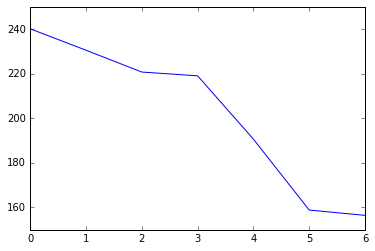

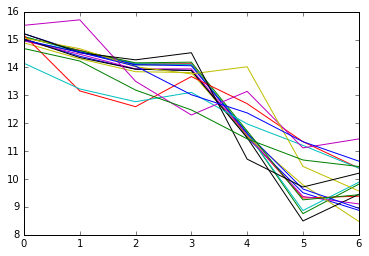

In [1214]:
plt.plot(np.sum(ch_dists[3:],axis=1))
plt.show()
plt.plot(ch_dists[3:])

In [1507]:
all_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

test_weights=[v for v in all_vars \
 if v.name == 'Conv/weights:0'][0]\
.eval(session=sess)

np.std(test_weights[:,:,:,:16])

0.34266943

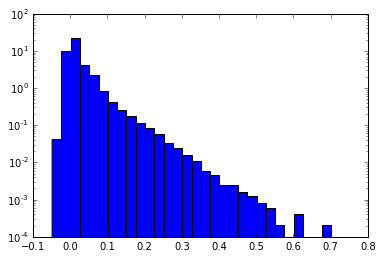

In [1526]:
plt.hist(Qpred_list,log=True,normed=True,bins=30);

In [1527]:
avg_reward = np.mean([e[2] for e in myBuffer.buffer])
avg_stable_q = avg_reward / (1-y)
print avg_stable_q

0.0150826235961


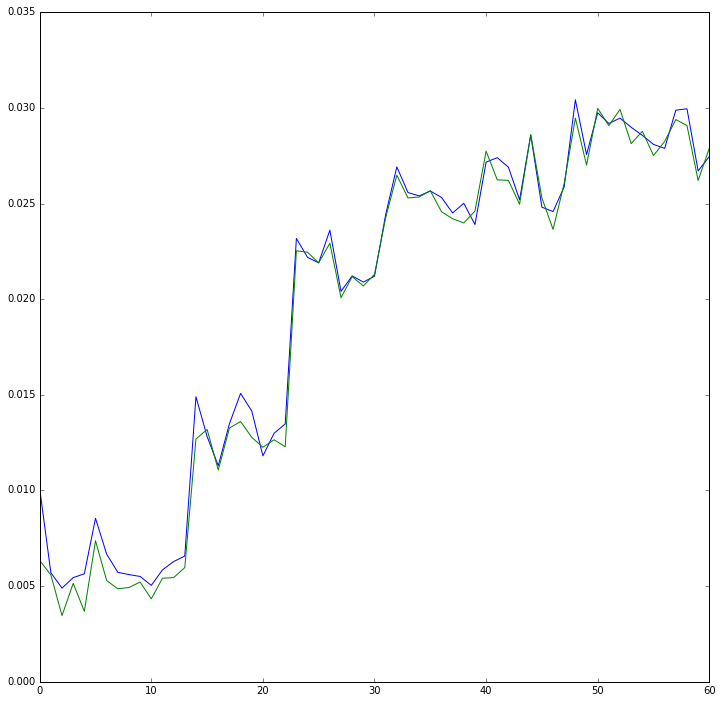

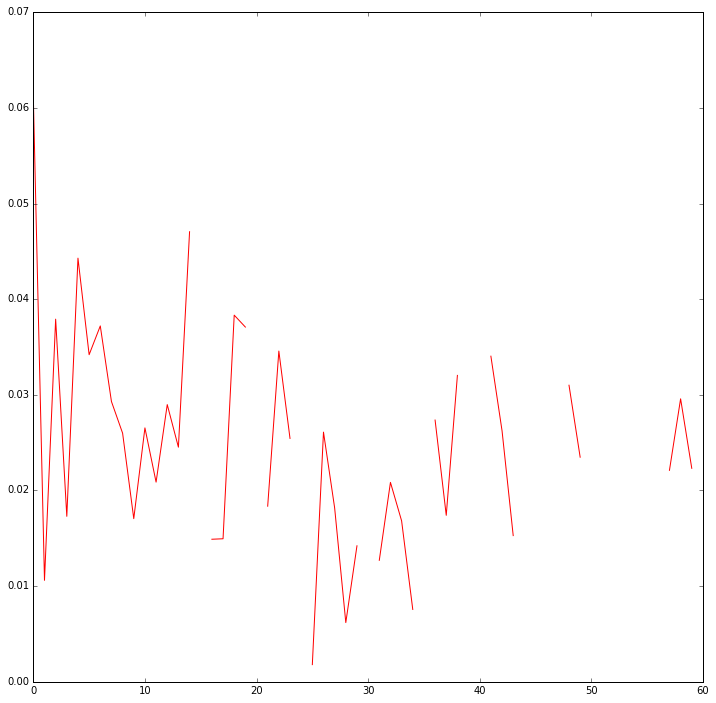

In [1529]:
sync_length = min(len(Qpred_list), len(Qtarget_list))
Qpred_list = Qpred_list[:sync_length]
Qtarget_list = Qtarget_list[:sync_length]

avg_window = 32*100

plt.figure(figsize=(12,12))
QtMat = np.resize(np.array(Qtarget_list),[len(Qtarget_list)//avg_window,avg_window])
QtAvgs = np.average(QtMat,1)
plt.plot(QtAvgs)

QpMat = np.resize(np.array(Qpred_list),[len(Qpred_list)//avg_window,avg_window])
QpAvgs = np.average(QpMat,1)
plt.plot(QpAvgs)

plt.figure(figsize=(12,12))
losses = np.array(Qtarget_list)-np.array(Qpred_list)
lossMat = np.resize(losses,[len(losses)//avg_window,avg_window])
lossAvgs = np.sqrt(np.average(lossMat,1))
plt.plot(lossAvgs,'r')

In [1530]:
len(Qtarget_list)

196704

[[ 1.          0.52966405]
 [ 0.52966405  1.        ]]


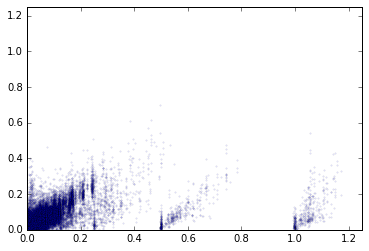

In [1531]:
plt.plot(Qtarget_list,Qpred_list,'o',markersize=1.5,alpha=0.1)
plt.axis([0,1.25,0,1.25])
print np.corrcoef(Qtarget_list,Qpred_list)

In [1532]:
cols = []
Qpred_list = np.array(Qpred_list)
rOptions = np.unique(QrList)
for r in rOptions:
    cols.append(Qpred_list[QrList==r])

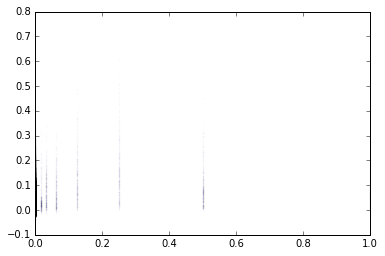

In [1533]:
plt.plot(QrList,Qpred_list,'o',markersize=1,alpha=0.01)

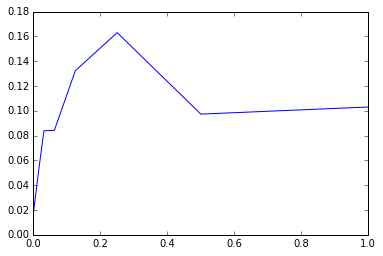

In [1539]:
plt.plot(rOptions, [np.mean(col) for col in cols])

In [845]:
buffer_all = np.array(myBuffer.buffer)
(buffer_all[:,2]>0).mean()

0.0058999999999999999

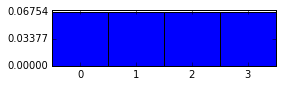

In [112]:
plt.figure(figsize=(4,1))
plt.bar(np.arange(4)-0.5,Qout,width=1)
plt.xticks(range(4));
plt.yticks(np.linspace(0,max(Qout),3));

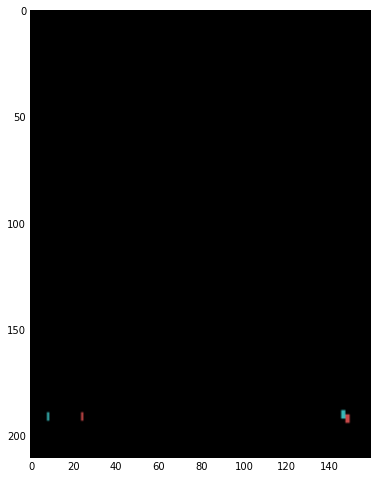

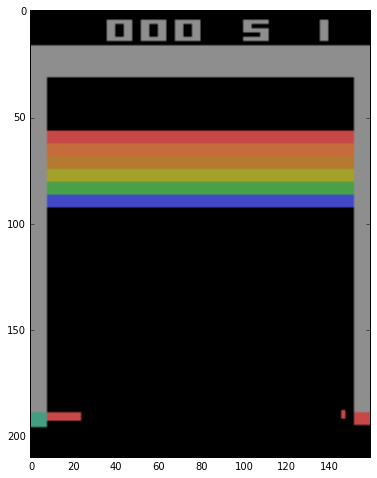

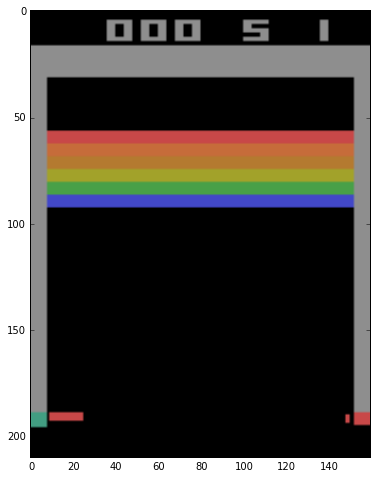

In [901]:
plt.figure(figsize=(12,8))
plt.imshow(s_stack[:,:,3:]-s_stack[:,:,:3])
plt.figure(figsize=(12,8))
plt.imshow(s_stack[:,:,:3])
plt.figure(figsize=(12,8))

plt.imshow(s_stack[:,:,3:])

In [902]:
sess.run(mainQN.conv2,feed_dict={mainQN.scalarInput:[s]})

array([[[[-0.00875617, -0.01546426, -0.00618444, -0.00656676, -0.00902274,
          -0.02128692, -0.01523175,  0.11306629]]]], dtype=float32)

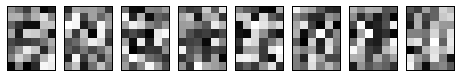

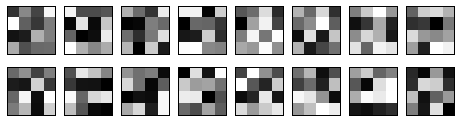

In [147]:
all_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

#test_kernel=[v for v in all_vars \
# if v.name == 'mainQN/piaget/mover_disps/mover0/disp2/kernel:0'][0]\
#.eval(session=sess)

test_weights=[v for v in all_vars \
 if v.name == 'Conv/weights:0'][0]\
.eval(session=sess)

q_weights=[v for v in all_vars \
 if v.name == 'Conv_1/weights:0'][0]\
.eval(session=sess)

i_max=1
j_max=8
plt.figure(figsize=(8,2))
for i in range(i_max):
    for j in range(j_max):
        cmap_max = max(np.max(q_weights[:,:,i,j]),
                      -np.min(q_weights[:,:,i,j]))
        plt.subplot(i_max,j_max,j+(i*j_max)+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(q_weights[:,:,i,j],cmap='gray',
        interpolation='nearest',
        vmin=-cmap_max,vmax=cmap_max)
plt.show()

i_max=2
j_max=8
plt.figure(figsize=(8,2))
for i in range(i_max):
    for j in range(j_max):
        cmap_max = max(np.max(test_weights[:,:,j+(i*j_max),0]),
                      -np.min(test_weights[:,:,j+(i*j_max),0]))
        plt.subplot(i_max,j_max,j+(i*j_max)+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_weights[:,:,j+(i*j_max),0],cmap='gray',
        interpolation='nearest',
                  vmin=-cmap_max,vmax=cmap_max)
plt.show()

In [144]:
plt.axis?

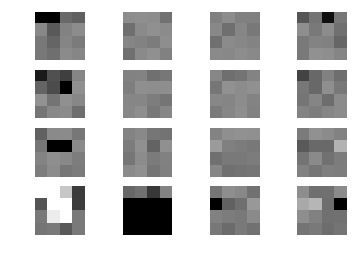

In [904]:
test_weights.shape
i_max=4
j_max=4
for i in range(i_max):
    for j in range(j_max):
        plt.subplot(i_max,j_max,j+(i*j_max)+1)
        plt.axis('off')
        plt.imshow(test_weights[:,:,j+(i*j_max),0],cmap='gray',
        interpolation='nearest',
                  vmin=-1,vmax=1)

In [905]:
#c0=sess.run(mainQN.conv_movers,feed_dict={mainQN.scalarInput:[s]})
c1=sess.run(mainQN.conv_dm_pool,feed_dict={mainQN.scalarInput:[s]})
c2=sess.run(mainQN.conv1_pool,feed_dict={mainQN.scalarInput:[s]})
c3=sess.run(mainQN.conv2,feed_dict={mainQN.scalarInput:[s]})

In [906]:
print c1.shape
print c2.shape
print c3.shape

(1, 52, 40, 16)
(1, 8, 6, 4)
(1, 1, 1, 8)


In [907]:
[[mover_disps[0][j],np.max(c1[0,:,:,j])] for j in range(10)]

IndexError: list index out of range

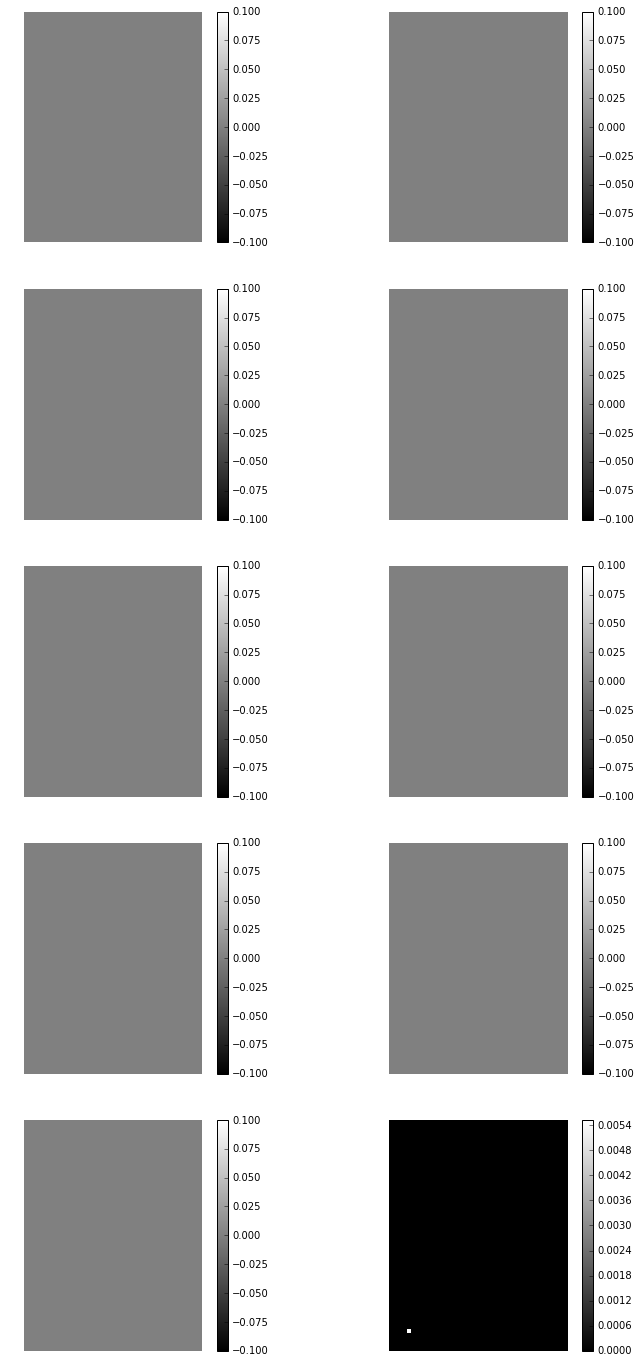

In [908]:
plt.figure(figsize=(12,24))
i_max=5
j_max=2
for i in range(i_max):
    for j in range(j_max):
        plt.subplot(i_max,j_max,j+(i*j_max)+1)
        plt.axis('off')
        im = c1[0,:,:,j+(i*j_max)]
        plt.imshow(im,cmap='gray',
        interpolation='nearest')
        plt.colorbar()

In [ ]:
[(i, np.max(c3[0,:,:,i])) for i in range(16)]

In [602]:
test = reduce(lambda a,b: a+b, mover_disps)
test[8]

(-2, 2)

In [603]:
for index in range(16):
    #print(test[index])
    plt.figure(figsize=(12,8))
    plt.imshow(c1[0,:,:,3]-c0[0,:,:,2],interpolation='nearest')
    plt.colorbar()
    plt.figure(figsize=(6,4))
    plt.imshow(c3[0,:,:,index],interpolation='nearest')
    plt.colorbar()

NameError: name 'c0' is not defined

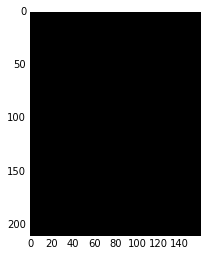

In [971]:
plt.imshow(s_stack[:,:,3:]-s_stack[:,:,:3])

### Checking network learning

Mean reward over time

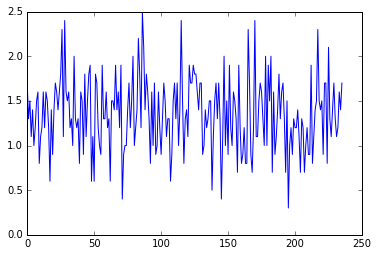

In [205]:
rMat = np.resize(np.array(rList),[len(rList)//10,10])
rMean = np.average(rMat,1)
plt.plot(rMean)